# CANCER PREDICTION

In [2]:
##import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sb
%matplotlib inline

In [3]:
#importing the dataset
data = pd.read_csv("C:\\Users\\kishore\\Desktop\\kaggale\\breast-cancer-wisconsin-data\\data.csv")

In [4]:
#dimension of data
data.shape

(569, 33)

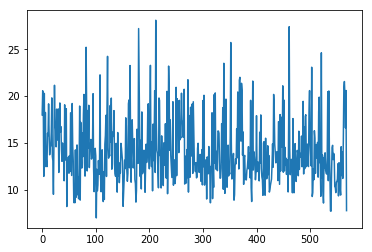

In [5]:
data.radius_mean.plot()
py.show()

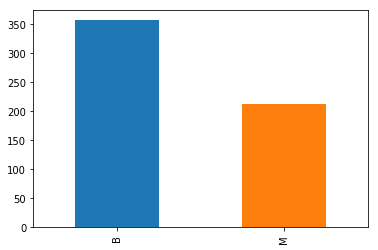

In [6]:
###frequency distribution of target variable
data.diagnosis.value_counts().plot(kind='bar')

In [7]:
#frequeny of unique values of target variable
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
###boxplot
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [9]:
#dropping unwanted variables
data=data.drop(['id'],axis=1)

In [10]:
data=data.iloc[0:,0:31]

In [11]:
#structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [12]:
#checking for na values
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC50CB47B8>,
      dtype=object)

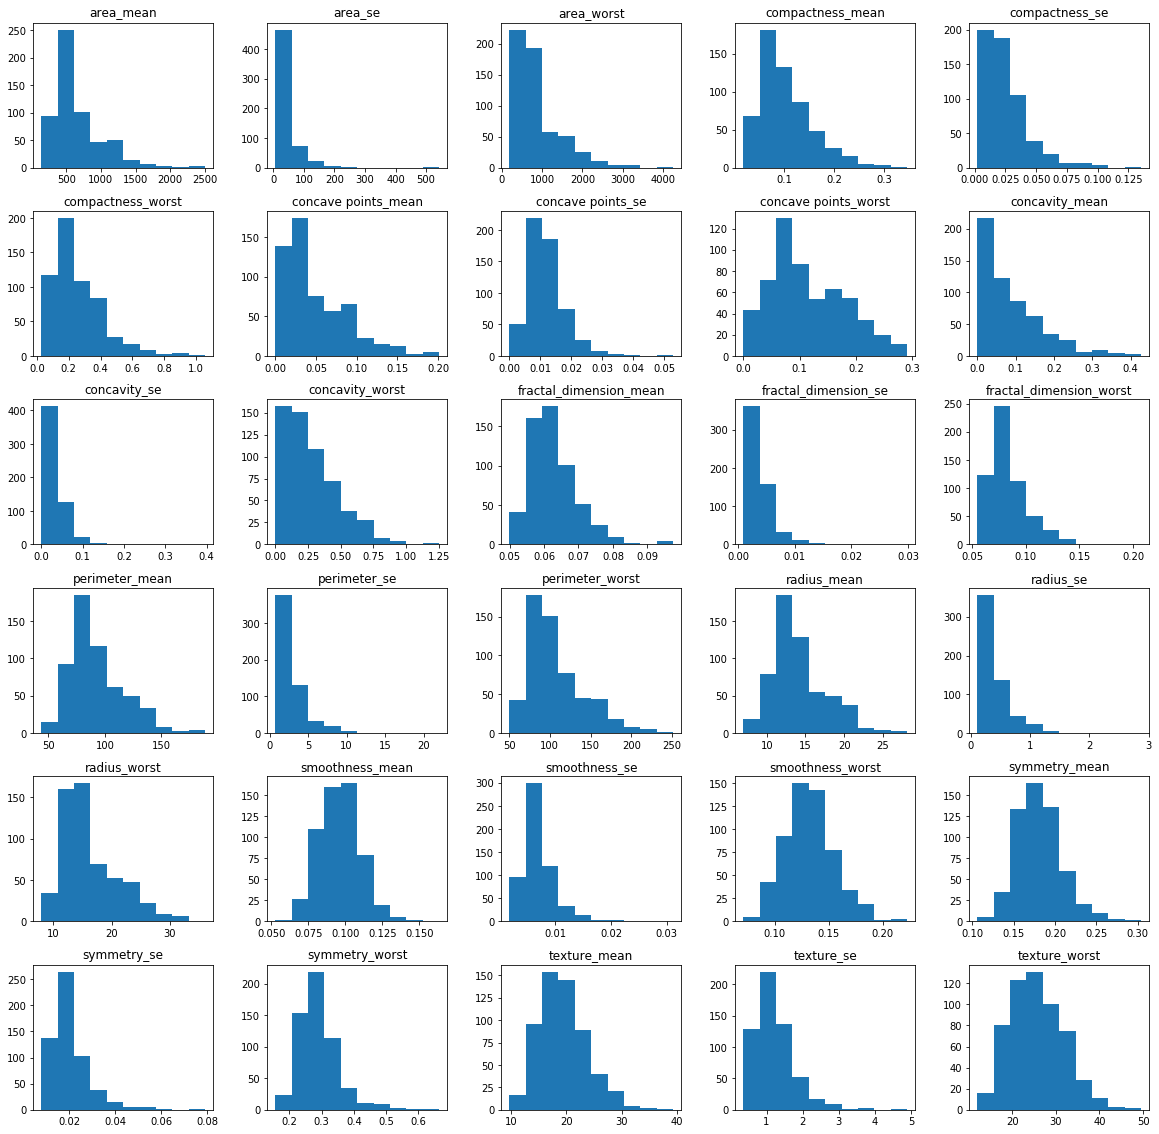

In [14]:
####frequency distribution for each features
data.hist(bins=10,figsize=(20,20),grid=False)

In [15]:
##pair plotdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIcAAARuCAYAAABJOlfRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XucLFV97/3Pl4tgVARkw+HqVkSj5oKEKHnUSCReQJOtjxIxKqgk6BETjeZEMJ5IckKCiUo0eFQMHiAxIvHKiRhFFIhRRDCIICpbRNmws0HkZrw8AX/PH7WG3czumemZ6Znumf68X696TdWq6qpf1dSqql691qpUFZIkSZIkSZpMW406AEmSJEmSJI2OhUOSJEmSJEkTzMIhSZIkSZKkCWbhkCRJkiRJ0gSzcEiSJEmSJGmCWTgkSZIkSZI0wSwckiRJkiRJmmAWDkmSJEkaa0kuSPI7o45D0uKZn8eThUNjKMk2o45B0nCYnyUNS5JK8rBRxyFJklYfC4eWUZLjknwryZ1Jvpbk2S39xUn+LcnJSb4PnNDSX5rk6iS3Jvlkkgf3rOttSa5PckeSy5I8cYDtn5Dkn5L8Q4vhq0kenuT4JDe19T21Z/kHJjktycYkNyT58yRbt3n7JvlMkluSfC/J+5Ls2PPZ65L8YZIrktye5ANJth/e0ZRGawzy82OTXNo+synJW3vmHZTk80luS/KVJAcP/QBIK8RKKqBdSbFq5Uqyd5IPJ7m5PcedkmSrJG9I8p32THhmkge25de2gsmXtHvVrUlenuSX23PebUlO6Vn/1H3wb9sz4NeTHNIz/yXtfnhnkmuTvGxafOuSXN7ub99K8vQkJwJPBE5J8oOp7bW4Xp7kmhbXO5KkZ119773pnNz29fa2Hz/X5h3W7ut3tuffP5zjeB6cZEOSP2rr25jkWW0930zy/SSv71l+q55niFuSnJ1k5575/5TkP1pcFyV5dM+809s+frzF98Uk+873HNDqYX4een7eJck/t+Pw/ST/mmSrNm+PJB9qx/rbSX5/sf+/sVNVDss0AIcDe9AVyj0P+E9gd+DFwF3A7wHbAPcFngWsBx7Z0t4AfL5nXS8EHtTmvRb4D2D7ObZ/AvBj4Gntc2cC3wb+GNgW+F3g2z3LfxR4N3A/YFfgEuBlbd7DgKcA2wFrgIuAv+n57HVt+T2AnYGrgZeP+n/g4DCsYQzy8xeAF7Xx+wMHtfE9gVuAw1psT2nTa0Z9zBwchjkAxwHfAu4EvgY8u6W/GPg34GTg+8Cft/SXtnvRrcAngQf3rOttwPXAHcBlwBPn2Pb2wI+AXdr0G1q+36FN//nUPRF4YLvf3gx8py271UyxtvvrhcDtwPeAD7RlLwKqXWt+ADxv1P8Dh5U3AFsDX2nn3P3aufyElj/WAw9t95QPA3/fPrO2nXvvass/le558qN0z4d7AjcBT2rLT90H/4Du+fJ57Xzeuc1/BrAvEOBJwA+BA9q8x7Zln9LuYXsCP9vmXQD8zrT9KeCfgR2BfVo+e3qbN+O9l+5Z+LL2ubRldm/zNk5dA4CdpmKb5Zge3Pb3T9j8PH0z8I/AA4BHt+P10Lb8q4GLgb3onqPfDby/Z30vbZ/bDvgb4PKeeae3a8Vj2z69Dzhr1OeVw2gG8/OS5Oe/bMdm2zY8sa1zq7aNPwHu047ttcDTRn0eDPWcGnUAkzwAlwPrWqb77rR5nwCO7pneqmW2B8+wrluBX5xjeycA5/VM/wbdA+bWbfoBLVPuCOwG/AS4b8/yzwc+O8O6nwX8e8/0dcALe6b/CnjXqI+5g8NSDSPIzxcBf0r7ctqT/jraA0BP2ieBo0Z9jBwchjkw+gLai4DntPFP0RVUHdozb6qw6kzgY+0euxb45tT1YIZY30/3o81WtAf9nm0W8LBRH3uHlTsAv0L3hWubaennA6/omX4E8F/tvFzbzr09e+bfQk8BJfAh4NVt/MXAjUB65l9C+0GjT0wfBV7Vxt8NnDzDchfQ/8tkbx45Gziujc947wWe3PLiQbTC2p7lvgu8jFbYO8AxPZiusHj68/Tjepa5DHhWG78aOKRn3u5Tx7rPunds63pgmz4d+Lue+YcBXx/1eeUwmsH8vCT5+c/o7tkPm5b+OLZ8vj8e+D+jPg+GOdisbBklObJVq7styW3AzwG7tNnXT1v8wcDbepb9Pl2p5Z5tXa9t1epub/Mf2LOu2WzqGf8R8L2qurtnGroS5gfTlZZu7Inh3XQlyiTZNclZrXreHcA/9Nn+f/SM/7CtV1oVxiA/Hw08HPh6ki8leWbPtg6f2lZb3xPoHj6lVaOq/qmqbqyqn1bVB4Br6H6lBLixqv62qu6qqh/RPRj+ZVVdXVV3AX8B7D9VJb2q/qGqbmnLv4XuF/tHzBHChcCT0jUF+wXg7W16e+CXgX9N1xT7ecDxVXVnVV0HvAV4Uc96psf6X3T5eI+q+nFVfW6Rh0rqtTfwnZYPeu1BV7Ntynfovkju1pM2/Rly+nTvc94N1b499axvD4Akhya5uDXZuI2ugGPqnrc3XUHrfMz0vDnjvbeqPgOcArwD2JTk1CQ7tM89p8X0nSQXJvmVAWK4pc/z9EzH58HAR3riuhq4G9gtydZJTmrNb+6g+7EV7v1M4PO1ppifh5+f/5rux6RPtWZyx/Vsf49pz9ev597HdMWzcGiZtAfQ9wCvBB5UVTsCV9Kd1NCVlPa6nq4J1449w32r6vPp+iN5HfBbwE5tXbf3rGsYrqerObRLz/Z3qKqpds9/2WL+harage5X12FuXxpb45Cfq+qaqno+XYHtm4APJrlf29bfT9vW/arqpOHsvTQexqCA9kK6GgMHAF8FzqOrUn8QsL6qvtfWcR+2fEjfs2d6eqx/1GK7JMlVSV46RxzSfFwP7JMt+7e6kS6fTNmHrlbbJhZmz96+Qtr6bkyyHV2thDcDu7V73rlsvuddT9dEpZ/p99a5zHjvBaiqt1fVL9E1+3o48D9a+peqah3d/fWjdLUXhul6ulqGvXFtX1U3AL9NVwv51+muQ2vbZ3zGVj/m5yHn5/ZDzmur6qF0rWxek66Ppevpul/p3f4Dquqwee7HWLNwaPncjy4T3Axd5110D7IzeRdwfFondOk6hz68zXsAXQa/GdgmyZ8AO/RfzcJU1Ua6avJvSbJDuo7N9k3ypJ4YfgDclmRPWgaUJsTI83OSFyZZU1U/BW5ryXfT1eL7jSRPa79Abp+us8y95r+b0ngahwJa4PN0tYueDVxYVV+je2B+Bl3BEXR9Bk3VBJqyD3BDz/S9Yq2q/6iq362qPehqPP3v+IYyDc8ldH1wnJTkfu0e8Xi65ox/kOQhSe5PV7vuA31qJAxqV+D3k2zb7nePpPvSeB+6mnk3A3clOZSuz5MppwEvSXJIe/bcM8nPtnmb6Pr5GNSM9950ne8+Lsm2dE1SfwzcneQ+SV6Q5IFV9V90/ZDdPdMGFuhdwInZ3JnumiTr2rwH0P04ewvwM3T/B2km5meGm5+TPDPJw1ph2NTyd9Md6zuSvC7Jfdsz9s8l+eV57MPYs3BombSHxrfQdSK7Cfh5uk4oZ1r+I3S1Ac5q1UqvBA5tsz9J1+7ym3S/QP6YLX95HIYj6TL91+j6QPkgm5um/Cndr6W3Ax+n6+hMmghjkp+fDlyV5Ad0neke0ZqgXE/3q+Pr6W7W19MV3nq912oy8gLaqvohXT8ix7K5MOjzdAU6F7Zl7qb7lfLEJA9oXwZfQ1eI21eSw3sKc29t+zn1MDvfh2npXto5+Rt0HZ9/F9hA1/TxvcDf0/WX9W26e9HvLWJTXwT2oysgPRF4bmu6eSfw+3T54la6mjLn9MR3CfASug52b6fLS1OFq28DnpvuTUVvH2BfZ7v37kBXwHwr3b33FrraD9A1+7yufebldLXjh+ltdPv8qSR30nVO/bg278wWzw10z98XD3nbWkXMz0uSn/cDPk1XCeILwP+uqgt6jvX+dMf0e8Df0dXwWzVy7+aDkiRJ4y/dq3D/O/BTui9Uv0T3MHwXXSeXT5i2/Ivommw9mO4h9byqemm6foFOpevg+j/pHmJf0dbx6Tli+Eu6Nw/tWFU/SfJK4G+B/1ZVm9oyO7W0p9E9oL+H7g1qP03y4umxJvkr4AV0D5ybgDdV1alt3suBN9J1XH1MVQ27uYu0aP3Oa0krk/l5slg4JEmSJGko/DIprR7m58liM4NVJsknkvygz/D6UccmaX7Mz5IkjV6S189wP/7EqGOTND/m55lZc0iSJKmP9qD4xD6z/qKq7ChWkiStGhYOSZIkSZIkTTCblUmSJEmSJE2wbUYdAMAuu+xSa9euHXUY0lBcdtll36uqNaOOY9jMp1pNzKfS+DOfSuPPfCqNv0Hz6VgUDq1du5ZLL7101GFIQ5HkO6OOYSmYT7WamE+l8Wc+lcaf+VQaf4PmU5uVSZIkSZIkTTALhyRJkiRJK0KSvZN8NsnVSa5K8qqWvnOS85Jc0/7u1NKT5O1J1ie5IskBo90DaTzNWTg0S+Y7IckNSS5vw2E9nzm+Zb5vJHnaUu6AJEmSJGli3AW8tqoeCRwEHJvkUcBxwPlVtR9wfpsGOBTYrw3HAO9c/pCl8TdIn0NTme/LSR4AXJbkvDbv5Kp6c+/CLWMeATwa2AP4dJKHV9XdwwxckiRJkjRZqmojsLGN35nkamBPYB1wcFvsDOAC4HUt/cyqKuDiJDsm2b2tR1IzZ82hqtpYVV9u43cCU5lvJuuAs6rqJ1X1bWA98NhhBCtJkiRJEkCStcBjgC8Cu00V+LS/u7bF9gSu7/nYBmb/PitNpHm9rWxa5ns88MokRwKX0tUuupUuo13c87G+mS/JMXTV+thnn30WEPr8rD3u44v6/HUnPWNIkUir02LzGJjPpKVmPpUmg8+9mgRJ7g98CHh1Vd2RZMZF+6RVn/UN/P3U+6lWo4E7pJ6e+ejaau4L7E9Xre8tU4v2+fgWma+qTq2qA6vqwDVr1sw7cEmSJEnS5EmyLd130/dV1Ydb8qYku7f5uwM3tfQNwN49H98LuHH6Ov1+qkk3UOFQv8xXVZuq6u6q+inwHjY3HRso80mSJEmSNB/pqgidBlxdVW/tmXUOcFQbPwr4WE/6ke2tZQcBt9vfkLSlQd5W1jfzTZXKNs8Grmzj5wBHJNkuyUPoeoW/ZHghS5IkSZIm1OOBFwFPnvbm7JOApyS5BnhKmwY4F7iWri/c9wCvGEHM0tgbpM+hqcz31SSXt7TXA89Psj9dk7HrgJcBVNVVSc4Gvkb3prNjfVOZJEmSJGmxqupz9O/KBOCQPssXcOySBiWtAnMWDs2S+c6d5TMnAicuIi5JkiRJkiQtg4E7pJYkSZIkSdLqY+GQJEmSJEnSBBukzyFJkiRJkjQka4/7+KI+f91JzxhSJFLHmkOSJEmSJEkTzMIhSZKWQZK9k3w2ydVJrkryqpa+c5LzklzT/u7U0pPk7UnWJ7kiyQGj3QNJkiStVhYOSZK0PO4CXltVjwQOAo5N8ijgOOD8qtoPOL9NAxwK7NeGY4B3Ln/IkiRJmgQWDkmStAyqamNVfbmN3wlcDewJrAPOaIudATyrja8DzqzOxcCOSXZf5rAlSZI0ASwckiRpmSVZCzwG+CKwW1VthK4ACdi1LbYncH3Pxza0NEmSJGmoLBySJGkZJbk/8CHg1VV1x2yL9kmrPus7JsmlSS69+eabhxWmJEmSJoiFQ5IkLZMk29IVDL2vqj7ckjdNNRdrf29q6RuAvXs+vhdw4/R1VtWpVXVgVR24Zs2apQtekiRJq5aFQ9IqkmTrJP+e5J/b9EOSfLG9BekDSe7T0rdr0+vb/LWjjFuaBEkCnAZcXVVv7Zl1DnBUGz8K+FhP+pHtrWUHAbdPNT+TJEmShsnCIWl1eRVdJ7dT3gSc3N6CdCtwdEs/Gri1qh4GnNyWk7S0Hg+8CHhyksvbcBhwEvCUJNcAT2nTAOcC1wLrgfcArxhBzJIkSZoA24w6AEnDkWQv4BnAicBrWi2FJwO/3RY5AziB7nXY69o4wAeBU5Kkqrboz0TScFTV5+jfjxDAIX2WL+DYJQ1qAdYe9/FFff66k54xpEgkSZI0LNYcklaPvwH+CPhpm34QcFtV3dWme990dM9bkNr829vy92JHt5IkSZK0+lk4JK0CSZ4J3FRVl/Um91m0Bpi3OcGObiVJEyTJe5PclOTKnrQTktwwrTno1LzjW/9930jytNFELUnS4tmsTFodHg/8Zntg3R7Yga4m0Y5Jtmm1g3rfdDT1FqQNSbYBHgh8f/nDliRprJwOnAKcOS395Kp6c29CkkcBRwCPBvYAPp3k4VV193IEKknSMFlzSFoFqur4qtqrqtbSPah+pqpeAHwWeG5bbPpbkKbejvTctrz9DUmSJlpVXcTgP5asA86qqp9U1bfpOo9/7JIFJ0nSErJwSFrdXkfXOfV6uj6FTmvppwEPaumvAY4bUXySJK0Er0xyRWt2tlNLu6f/vqa3bz9JklaUOQuHkuyd5LNJrk5yVZJXtfSdk5yX5Jr2d6eWniRvb+2vr0hywFLvhKTNquqCqnpmG7+2qh5bVQ+rqsOr6ict/cdt+mFt/rWjjVqSpLH1TmBfYH9gI/CWlj5Q/33gCx4kSeNvkJpDdwGvrapHAgcBx7Y21scB51fVfsD5bK55cCiwXxuOobuhSpIkSStOVW2qqrur6qfAe9jcdGyq/74pvX37TV+HL3iQJI21OQuHqmpjVX25jd8JXE1XZXYdcEZb7AzgWW18HXBmdS6m6xB396FHLkmSJC2xac+xzwam3mR2DnBEku2SPITuh9FLljs+SZKGYV5vK0uyFngM8EVgt6raCF0BUpJd22Iztb/euNhgJUmSpKWS5P3AwcAuSTYAbwQOTrI/XZOx64CXAVTVVUnOBr5GV9P+WN9UJklaqQYuHEpyf+BDwKur6o6kXzPrbtE+aVu0v05yDF2zM/bZZ59Bw5AkSZKWRFU9v0/yaX3SppY/EThx6SKSJGl5DPS2siTb0hUMva+qPtySN01Vs21/b2rpA7W/tu21JEmSJEnS6A3ytrLQ/WJydVW9tWfWOcBRbfwo4GM96Ue2t5YdBNw+1fxMkiRJkiRJ42WQmkOPB14EPDnJ5W04DDgJeEqSa4CntGmAc4FrgfV0b3R4xfDDliRJkiRNmiTvTXJTkit70k5IcsO076tT845Psj7JN5I8bTRRS+Nvzj6Hqupz9O9HCOCQPssXcOwi45IkSZIkabrTgVOAM6eln1xVb+5NSPIo4Ajg0cAewKeTPNzO46UtDdTnkCRJkiRJo1ZVFwHfH3DxdcBZVfWTqvo2XeuWxy5ZcNIKZuGQJEmSJGmle2WSK1qzs51a2p7A9T3LbGhpW0hyTJJLk1x68803L3Ws0tixcEiSJEmStJK9E9gX2B/YCLylpffrHqX6rcC3aWvSWTgkSZIkSVqxqmpTVd1dVT+leynSVNOxDcDePYvuBdy43PFJK8GcHVJLkiRJmhxrj/v4oj5/3UnPGFIk0mCS7F5VG9vks4GpN5mdA/xjkrfSdUi9H3DJCEKUxp6FQ5IkSZKkFSHJ+4GDgV2SbADeCBycZH+6JmPXAS8DqKqrkpwNfA24CzjWN5VJ/Vk4JEmSJElaEarq+X2ST5tl+ROBE5cuIml1sM8hSZIkSZKkCWbhkCRJy6C9WvemJFf2pJ2Q5IYkl7fhsJ55xydZn+QbSZ42mqglSZI0CSwckiRpeZwOPL1P+slVtX8bzgVI8ijgCODR7TP/O8nWyxapJEmSJoqFQ5IkLYOqugj4/oCLrwPOqqqfVNW3gfVsfi2vJEmSNFQWDkmSNFqvTHJFa3a2U0vbE7i+Z5kNLU2SJEkaOguHpFUgyfZJLknylSRXJfnTlv6QJF9Mck2SDyS5T0vfrk2vb/PXjjJ+aYK9E9gX2B/YCLylpafPstVvBUmOSXJpkktvvvnmpYlSkiRJq5qFQ9Lq8BPgyVX1i3RfMp+e5CDgTXT9mewH3Aoc3ZY/Gri1qh4GnNyWk7TMqmpTVd1dVT8F3sPmpmMbgL17Ft0LuHGGdZxaVQdW1YFr1qxZ2oAlSZK0Klk4JK0C1flBm9y2DQU8GfhgSz8DeFYbX9emafMPSdKvpoKkJZRk957JZwNTbzI7Bzii1fJ7CLAfcMlyxydJkqTJsM2oA5A0HO1NRpcBDwPeAXwLuK2q7mqL9PZZck9/JlV1V5LbgQcB31vWoKUJkuT9wMHALkk2AG8EDk6yP11h7nXAywCq6qokZwNfA+4Cjq2qu0cRtyRJklY/C4ekVaJ9cdw/yY7AR4BH9lus/R2oP5MkxwDHAOyzzz5DilSaTFX1/D7Jp82y/InAiUsXkSRJktSxWZm0ylTVbcAFwEHAjkmmCoF7+yy5pz+TNv+B9HnFtn2ZSJIkSdLqZ+GQtAokWdNqDJHkvsCvA1cDnwWe2xY7CvhYGz+nTdPmf6aq+r4JSZIkSZK0us1ZOJTkvUluSnJlT9oJSW5IcnkbDuuZd3x7PfY3kjxtqQKXdC+7A59NcgXwJeC8qvpn4HXAa5Ksp+tTaKoJy2nAg1r6a4DjRhCzJEmSJGkMDNLn0OnAKcCZ09JPrqo39yYkeRRwBPBoYA/g00kebiea0tKqqiuAx/RJv5bNr8buTf8xcPgyhCZJkiRJGnNz1hyqqovo0xfJDNYBZ1XVT6rq28B6+nwxlSRJkiRJ0nhYTJ9Dr0xyRWt2tlNLu+f12E3vq7PvJckxSS5NcunNN9+8iDAkSZIkSZK0UAstHHonsC+wP7AReEtLH+j12OBbkCRJkiRJksbBggqHqmpTVd1dVT8F3sPmpmP3vB676X11tiRJkiRJksbMggqHkuzeM/lsYOpNZucARyTZLslDgP2ASxYXoiRJkrT0ZnhL785JzktyTfu7U0tPkre3t/RekeSA0UUuSdLiDPIq+/cDXwAekWRDkqOBv0ry1fba7F8D/gCgqq4Czga+BvwLcKxvKpMkSdIKcTrw9GlpxwHnV9V+wPltGuBQuh9C9wOOoet2QZKkFWnOV9lX1fP7JJ82y/InAicuJihJkiRpuVXVRUnWTkteBxzcxs8ALgBe19LPrKoCLk6yY5Ldq2rj8kQrSdLwLOZtZZIkSdJqt9tUgU/7u2tLH/gtvZIkjTsLhyRJkqT5G/gtvUmOSXJpkktvvvnmJQ5LkqT5s3BIkiRJmtmmqZextL83tfSB39JbVadW1YFVdeCaNWuWNFhJkhbCwiFJkiRpZucAR7Xxo4CP9aQf2d5adhBwu/0NSZJWqjk7pJYkSZImQXtL78HALkk2AG8ETgLObm/s/S5weFv8XOAwYD3wQ+Alyx6wNIGSvBd4JnBTVf1cS9sZ+ACwFrgO+K2qujVJgLfR5dUfAi+uqi+PIu5hW3vcxxf1+etOesaQItFqYeGQJEmSxIxv6QU4pM+yBRy7tBFJ6uN04BTgzJ6044Dzq+qkJMe16dcBhwL7teFxwDvbX0nT2KxMkiRJkrQiVNVFwPenJa8DzmjjZwDP6kk/szoXAztO9SEm6d4sHJIkSZIkrWS7TfX51f7u2tL3BK7vWW5DS5M0jYVDkiRJkqTVKH3Squ+CyTFJLk1y6c0337zEYUnjx8IhSZIkSdJKtmmquVj7e1NL3wDs3bPcXsCN/VZQVadW1YFVdeCaNWuWNFhpHFk4JEmSJElayc4BjmrjRwEf60k/Mp2DgNunmp9JujffViZJ0jLw1buSJsViX7ENvmZbM0vyfuBgYJckG4A3AicBZyc5GvgucHhb/Fy6e+l6uvvpS5Y9YGmFsHBIkqTlcTq+eleSpEWpqufPMOuQPssWcOzSRiStDjYrkyRpGfjqXUmSJI0rC4ekVSDJ3kk+m+TqJFcleVVL3znJeUmuaX93aulJ8vYk65NckeSA0e6BNLF89a4kSZJGzsIhaXW4C3htVT0SOAg4Nsmj2NxkZT/g/DYN926ycgxdkxVJ48NX70qSJGnZWDgkrQJVtXGqs9qquhO4mq6WgU1WpPHmq3clSZI0chYOSatMkrXAY4AvssgmK9ZIkJacr96VJEnSyM1ZOJTkvUluSnJlT5r9mEhjKMn9gQ8Br66qO2ZbtE/aFk1WrJEgDU979e4XgEck2dBet3sS8JQk1wBPadPQvXr3WrpX774HeMUIQpYkSdKEGORV9qfjq3elsZdkW7qCofdV1Ydb8qYku1fVxoU2WZE0HL56V5IkSeNqzppDvnpXGn9JApwGXF1Vb+2ZZZMVSZIkSdKsBqk51M+9+jFJMlc/Jiv+S+fa4z6+qM9fd9IzhhSJ1NfjgRcBX01yeUt7PV0TlbNb85XvAoe3eecCh9E1Wfkh8JLlDVeSJEmSNC4WWjg0k3m9epfuFdrss88+Qw5DmixV9Tn65z+wyYokSZIkaRYLfVuZr96VJEmSJElaBRZaOGQ/JpIkSZIkSavAnM3K2qt3DwZ2SbIBeCPL3I/JYvv7kSRJklYCn3slSaMwZ+GQr96VJEmSJElavRbarEySJEmSJEmrgIVDkiRJkiRJE8zCIUmSJEmSpAlm4ZAkSZIkSdIEs3BIkiRJkiRpglk4JEmSJEmSNMEsHJIkSZIkSZpgFg5JkiRJkiRNsG1GHYAkSZI07pJcB9wJ3A3cVVUHJtkZ+ACwFrgO+K2qunVUMUqStFDWHJIkSZIG82tVtX9VHdimjwPOr6r9gPPbtCRJK46FQ5IkSdLCrAPOaONnAM8aYSySJC2YhUOSJEnS3Ar4VJLLkhzT0narqo0A7e+uI4tOkqRFsM8hSZIkaW6Pr6obk+wKnJfk64N+sBUmHQOwzz77LFV80sSzbzBp4SwckiRJkuZQVTe2vzcl+QjwWGBTkt2ramOS3YGbZvjsqcCpAAceeGAtV8wr2drjPr6oz1930jOGFIlWoF+rqu/1TE/1DXZSkuPa9OtGE5o0viwckiRJy8YvfFqJktwP2Kqq7mzjTwX+DDgHOAo4qf392OiilDSDdcDBbfwM4AIsHJK2YOGQJEkjZjV4aeztBnwkCXTPz/9YVf+S5EvA2UmOBr4LHD7CGCVt7husgHe3Wns0aa8gAAAgAElEQVT36husNQ3dgs0/NeksHJIkaTxYDV4aU1V1LfCLfdJvAQ5Z/ogkzWDBfYPZ/FOTzreVSatAkvcmuSnJlT1pOyc5L8k17e9OLT1J3p5kfZIrkhwwusglzcJXZEuSNA+9fYMB9+obDGC2vsGkSWfNIWl1OB04BTizJ22mWgeHAvu14XHAO9tfSaOz4Grwk2axfRaB/RZJ0mpk32DS4iyqcMg+EqTxUFUXJVk7LXmmzvfWAWdWVQEXJ9lx6k0ryxOtpD58RbYkSYtj32DSIgyj5pB9JEjjaaZaB3sC1/cst6GlbVE45JdOaXn4imxJkhbHvsGkxVmKPofsI0Eab+mT1vcLZVWdWlUHVtWBa9asWeKwpMmU5H5JHjA1TlcN/ko2V4MHq8FLkiRpCS225pCvClxGi+1nwT4WJs5MtQ42AHv3LLcXcOOyRydpitXgJUmSNFKLLRzyVYHS+Jqp871zgFcmOYuuI+rb7W9IGh2rwUuSpOXmCx403aIKhxbTR8KkGUbmk2aS5P10nU/vkmQD8Ea6QqF+tQ7OBQ4D1gM/BF6y7AFLkiRJksbGgguHfFWgND6q6vkzzNqi1kF7S9mxSxuRJEmSJGmlWEzNIftIkCRJkiRJWuEWXDhkHwmSJEmSJEkr32I7pJakofGNfJIkSZK0/LYadQCSJEmSJEkaHWsOSZIkSVpVfE23JM2PNYckSZIkSZImmIVDkiRJkiRJE8zCIUmSJEmSpAlmn0OSJGmi+GZESZKke7PmkCRJkiRJ0gSz5pAkSZIkSZoXa+KuLtYckiRJkiRJmmDWHJIkSZKkaawVIWmSWHNIkiRJkiRpglk4JEmSJEmSNMEsHJIkSZIkSZpg9jk0QRbbbhpsOy1JkiRJ0mpj4ZCkVcOOIyUtB39skSRJq43NyiRJkiRJkiaYNYckSZIkSdKyGkZN3MWyJu9mS1Y4lOTpwNuArYG/q6qTlmpbWj4221ldzKfS+DOfSuPPfKp+fG4eL+ZTaXZLUjiUZGvgHcBTgA3Al5KcU1VfW4rtSZo/86k0/synq9eofy31S+fwmE+1VOzfbHjMp5qJhbibLVXNoccC66vqWoAkZwHrADPfhBuHzDcOMYwJ8+k0PoRpDJlPpfFnPpXGn/lUmsNSFQ7tCVzfM70BeNwSbUsTZNS/tK4y5tMlYOHjcHgc72E+1dgyn97DfKqxZT69h/lUY2tc8ulSFQ6lT1rda4HkGOCYNvmDJN9YolgGtQvwvRHHMMVYtjQucZA3zRnLg5crlkUaVj4d5f9mVNtesu3mTaPb9gBWzPEe4Diu5nx6C2NyvZzB2FzPZzDu8cEQYhwgjyzGQPFNeD4d9XPvYq2EfDII92MO5tMtrJhnIbe9PNtegvvpyJ57l6pwaAOwd8/0XsCNvQtU1anAqUu0/XlLcmlVHTjqOMBYxjkOGK9YFmko+XSUx2NU257EfR7ltldRnluIeefTcT9exrd44x7juMe3BFbcc+9irZb/sfsxUVb0c+8kPv9N6rZHuc9bLdF6vwTsl+QhSe4DHAGcs0TbkrQw5lNp/JlPpfFnPpXGn/lUmsOS1ByqqruSvBL4JN2rAt9bVVctxbYkLYz5VBp/5lNp/JlPpfFnPpXmtlTNyqiqc4Fzl2r9S2Ccqvoay5bGJQ4Yr1gWZUj5dJTHY1TbnsR9HuW2V02eW4gF5NNxP17Gt3jjHuO4xzd0K/C5d7FWy//Y/ZggK/y5dxKf/yZ12yPb51TV3EtJkiRJkiRpVVqqPockSZIkSZK0AkxU4VCS65J8NcnlSS5taTsnOS/JNe3vTi09Sd6eZH2SK5IcsIjtvjfJTUmu7Emb93aTHNWWvybJUUOM5YQkN7TjcnmSw3rmHd9i+UaSp/WkP72lrU9y3ALi2DvJZ5NcneSqJK8a1XGZJZZlPy4rzVLv77DyzgK2O7Tzc57b3T7JJUm+0rb7py39IUm+2Lb7gXQdKZJkuza9vs1fu9B97olh6yT/nuSfl2vbGdG1ebUZ5fVnWHl1sdfzWeIbm3vODPENLe9nhvvTkOJc9PVhKePT8M11XUnyq0m+nOSuJM8dRYyDGGA/XpPkay2/n59kLF/PPsB+vLznfvq5JI8aRZwrxQDHc97XskHvxQvddpKnJLms/Z8vS/Lkns9c0NY59d1l1yFve22SH/Ws/109n/mlFtP6dv/MELf7gp5tXp7kp0n2H/I+z3gtywz3/UH2eTHbTrJ/ki+key64IsnzeuadnuTbPfu9f79tz1tVTcwAXAfsMi3tr4Dj2vhxwJva+GHAJ4AABwFfXMR2fxU4ALhyodsFdgaubX93auM7DSmWE4A/7LPso4CvANsBDwG+RdeB29Zt/KHAfdoyj5pnHLsDB7TxBwDfbNtb9uMySyzLflxW0rAc+zuMvLPA7Q7l/FzAdgPcv41vC3yxre9s4IiW/i7gv7fxVwDvauNHAB8YwjF/DfCPwD+36SXfNiO6Nq+mYdTXn2HkVYZ0n5shvrG558wQ31DyPjPcn4b4f17U9WGp43MY7jDIdQVYC/wCcCbw3FHHvIj9+DXgZ9r4f2cI99MR7ccOPeO/CfzLqOMe12HA4zmva9kg6xzCth8D7NHGfw64oeczFwAHLuF+r6XnPj/tM5cAv0J3P/sEcOiwtjttmZ8Hrl2CfV5Ln2sZs9z359rnIWz74cB+bXwPYCOwY5s+nSW45k5UzaEZrAPOaONnAM/qST+zOhcDOybZfSEbqKqLgO8vcrtPA86rqu9X1a3AecDThxTLTNYBZ1XVT6rq28B64LFtWF9V11bV/wec1ZadTxwbq+rLbfxO4GpgT0ZwXGaJZSZLdlxWmCXf3yHlnYVsd1jn53y3W1X1gza5bRsKeDLwwRm2OxXPB4FDZvrVYhBJ9gKeAfxdm85ybbuPJf8/rzIjvf6M031uhvjG5p4zQ3zDyvsz3Z8WbUjXhyWLT0tizutKVV1XVVcAPx1FgAMaZD8+W1U/bJMXA3stc4yDGGQ/7uiZvB/ddUT9DXLfnO+1bNB78YK3XVX/XlU3tvSrgO2TbLdM+91Xuz/uUFVfqKqiK+R41rTFhrXd5wPvn2sn57vtWa5lfe/7A+7zorZdVd+sqmva+I3ATcCaee77vExa4VABn2pV8I5pabtV1UboHh6BqapoewLX93x2A7MXGMzXfLe71PG8slVXe29atfrliqVVGXwM3S+lIz0u02KBER6XFWBU+7useXaR5+dCtrd1ksvpbgDn0f3acFtV3dVn3fdst82/HXjQQrbb/A3wR2y+OT1ombY9TtfmlWocj8u43eeA8brnTItrGHl/KY/hMK4P43ieamar5f813/04mq4WwLgZaD+SHJvkW3Q1I39/mWJbiQY5nvO9lg16ri1m272eA/x7Vf2kJ+3/tGZG/3OGAp3Fbvsh6ZoXX5jkiT3Lbxh0nQvc7pTnsWXh0DD2eSaz/a/n2ufFbvseSR5LV/PoWz3JJ7bvqSfPs4BwRpNWOPT4qjoAOBQ4NsmvzrJsvxNrOUrfZ9ruUsbzTmBfYH+66mpvWa5Yktwf+BDw6mm/dmyx6AhiGdlxWSHGbX+HHs8Qzs95q6q7q2p/ul8tHws8cpZ1D/P8fyZwU1Vd1pu8HNtmZVybx91KOi4ju4aO0z1ni5UMJ+8vSXxDvD6spPNUq+f/NfB+JHkhcCDw10sa0cIMtB9V9Y6q2hd4HfCGJY9q5RrkeM73WjboubaYbXczk0cDbwJe1jP/BVX188AT2/CiIW97I7BPVT2G1sw4yQ6LXOfAyyR5HPDDqrqyZ/6w9nkmy/G/nj2ArpbS3wMvqaqpH2iOB34W+GW6Jm+vm886ZzJRhUNTVfCq6ibgI3QPX5ummiS0vze1xTcAe/d8fC/gRoZnvttdsniqalN7KP0p8B42V/Fe0liSbEv3kP6+qvpwSx7JcekXy6iOywoyqv1dljw7pPNzwarqNrp21AfRNWnZps+679lum/9ABm82Ot3jgd9Mch1dldcn09UUWPJtj9m1eaUax+MyNve5FsPY3HNms8i8v1TxDev6MI7nqWa2Wv5fA+1Hkl8H/hj4zWk1McbFfP8fZ9G/mYs6gxzP+V7LBv0fLWbbU818PwIcWVX31CSpqhva3zvp+ofr12x3wdtuzehuadu4jK4Wy8Pb8r1NMWdd50L2uTmCabWGhrjPM5ntfz3XPi9227TCt48Db6iumTtwT3P5ateq/8OQmmhPTOFQkvslecDUOPBU4ErgHOCotthRwMfa+DnAkekcBNw+VfV8SOa73U8CT02yU2ve9NSWtmjT+ut4Nt1xmYrliHQ9xz8E2I+u460vAfule0vJfegy6jnz3GaA04Crq+qtPbOW/bjMFMsojssKM6r9XfI8O8Tzc77bXZNkxzZ+X+DX6fpG+Sww9faC6dudiue5wGdau+d5q6rjq2qvqlpL97/8TFW9YKm3PYbX5pVqHK8/43SfG5t7zgzxDSvvz3R/WpQhXh+WJD4tmXG8rizEnPuR5DHAu+kKhm7qs45xMMh+7Ncz+QzgmmWMb6UZ5Pye77Vs0Dyz4G23e8XHgeOr6t+mFk6yTZJd2vi2wDPZ/N1lWNtek2Trto2Htv2+tt0f70xyULvfHsnm+8Git9u2txVwOF2h51Ls80z63vcH3OdFbbst/xG6PhD/adq8qR+2QlcI3G+/569G0Dv8KAa6HsK/0oargD9u6Q8Czqe7eJ4P7Dx1DgLvoCsR/Spz9II+x7bfT1cN77/oSg+PXsh2gZfSdXi2nq5a2bBi+fu2rSvoTtbde5b/4xbLN+jpgZ3uTS7fbPP+eAFxPIGuSt0VwOVtOGwUx2WWWJb9uKy0Yan3d1h5Z5Tn5zy3+wvAv7ftXgn8SUt/KN1Dx3rgn4DtWvr2bXp9m//QIR33g9n8NqIl3TYjvDavtmGU159h5VWGcJ+bIb6xuefMEN/Q8j4z3J+GeCwXdX1Y6vgchv7/3uK6AvwZXSEKdE0aNgD/CdwCXDXqmBe4H58GNvVcH84ZdcwL3I+30d1LL6crvH30qGMe52GA4znva1m/dQ5z23RNBf+z51y9nK6/vPsBl9HdR65q50Lft0EuYtvPaev+CvBl4Dd61nkg3f3rW8ApQIZ8vA8GLp62vmHu84zXMma47w+yz4vZNvBCuueq3v/1/m3eZ+ieT64E/oH2xtPFDmkrlyRJkiRJ0gSamGZlkiRJkiRJ2pKFQ5IkSZIkSRPMwiFJkiRJkqQJZuGQJEmSJEnSBLNwSJIkSZIkaYJZOCRJkiRJkjTBLBySJEmSJEmaYBYOSZIkSZIkTTALhyRJkiRJkiaYhUOSJEmSJEkTzMIhSZIkSZKkCWbhkCRJkiRJ0gSzcEiSxliSJyb5xqjjkLR45mdpdMx/0ugkeUGST406Ds3OwqEVLMkFSX5n1HGMA4+FVquq+teqesQgyyY5OMmGpY5J0sKYn6XRmYT8l+T0JH8+6jik6arqfVX11KnpJJXkYaOMSVuycEgrQpJtRh2DJEmSNCo+D0taShYOAUn2TvLhJDcnuSXJKUm2SvKGJN9JclOSM5M8sC2/tpV2viTJ9UluTfLyJL+c5IoktyU5pWf9L07yb0n+NsntSb6e5JCe+S9JcnWSO5Ncm+Rl0+Jbl+TyJHck+VaSpyc5EXgicEqSH0xtr8X18iTXtLjekSQ963pp29atST6Z5MEtPUlObvt6e9uPn2vzDkvytRbfDUn+cI7jeWGS57TxJ7SYDmvTv57k8jY+yDE+Osl3gc8k2T7JP7T/0W1JvpRkt5mOhVamfvmxpQ9yvhyV5LtJvpfkj3vWuXWS17f8c2eSy5Ls3ea9reXjO1r6E1v6Hkl+lGTnnvU8pq172zbdNz/12aep+I5JcmOSjUle2zN/uyR/0+bd2Ma3a/Pu9etlkuuS/GHLo7cn+UDLG/cDPgHs0fLBD9o+PDbJpW3/NiV56xzHf17Xt7mOw0zHt807IcnZ7X95Z5Krkhw4W3xaWczPI8/Pfe+bbd4Dk5zW4r8hyZ8n2Xp+/2GNM/PfyPPfGVOxJdmzxf2KNv2wJN9Pumf0JL+bZH1LOyfJHj3rqSTHJrkGuCadLZ7ZkxwDvAD4oxbz/53zJNGq0C+vj1s+T/d9+HMt/aK2yFfaufq8JFcm+Y2ez27bPrv/LPvtM+uwVdVED8DWwFeAk4H7AdsDTwBeCqwHHgrcH/gw8PftM2uBAt7Vln8q8GPgo8CuwJ7ATcCT2vIvBu4C/gDYFngecDuwc5v/DGBfIMCTgB8CB7R5j23LPoWuMG9P4GfbvAuA35m2PwX8M7AjsA9wM/D0Nu9ZbZ8eCWwDvAH4fJv3NOCy9rm0ZXZv8zYCT2zjO03FNssx/TPgb9v464FvAW/qmfe2Nj7IMT6z/V/uC7wM+L/Az7T/2y8BO8x0LBxW3jBTfpzH+fKedq78IvAT4JFt/v8Avgo8op3fvwg8qM17IfCglideC/wHsH2b9xngd3vi+2vgXW18xvzUZ7+m4nt/26+fb3nz19v8PwMuprt+rAE+D/yvNu9gYEPPuq4DLgH2AHYGrgZe3m/ZlvYF4EVt/P7AQXP8D6ZiHfT6NutxmOP4ntDWfVj73/8lcPGoz0MH8/Mqys+z3Tc/Cry77cOuLY6Xjfq8cTD/raL891Lg/7bx36Z7Hv5Az7yPtfEnA98DDgC2A/4WuKhnPQWc12K8L7M/s58O/Pmozz+H5RtmyutjmM9fDHyuZ14BD+uZ/qOp/NGm1wFfnWPfp/bDZ9ZhnU+jDmDUA/ArdDeVbaalnw+8omf6EcB/tZNl6kTcs2f+LcDzeqY/BLy6jb8YuBFIz/xLaDeYPjF9FHhVG383cPIMy11A/8KhJ/RMnw0c18Y/ARzdM28ruoKoB9PdmL4JHARsNW2d36V7wNxhwGN6CHBFG/8X4HemMg9wIfD/zuMYP7Rn/kvpbvK/MMixcFh5w0z5cR7ny1498y8Bjmjj3wDWDRjDrcAvtvHfAT7TxgNcD/xqm54xP/VZ51R8P9uT9lfAaW38W8BhPfOeBlzXxg9my4fZF05bz7v6LdvSLgL+FNhlwP2finXQ69vAx6HP8T0B+HTPvEcBPxr1eegwnMH8fM+8UebnvvdNYDe6LwL37Ul7PvDZUZ83DsMZzH/3zBtl/tsXuK3tz7vonqU3tHlnAK9p46cBf9Xzufu3/8faNl3Ak3vmz/bMfjoWDk3UMFNeH8N8/mJmLxzaA7iTzT9gfBD4ozm2PbUfPrMOabBZGewNfKeq7pqWvgfwnZ7p79Blpt160jb1jP+oz/T9e6ZvqHYm9axvD4Akhya5uFUlvY2uRHKXnvi+Nb9d4j96xn/YE8eDgbe1Kna3Ad+ny7h7VtVngFOAdwCbkpyaZIf2uee0mL6TrsnYr8yx/S8AD09XdX1/uto/eyfZha4m1FRVwkGO8fU9438PfBI4K11V4b9Kq46sVWOm/AiDnS8znfsz5qMkr23VS29v+eKBbM5/HwR+pVXv/lW6G9C/tnkz5qdZ9q/3fL7nGjDDvu3BzGbaz36OBh4OfD1dk5JnzrJsr0Gvb7MehzmOb7992T72qbBamJ+3nNfPUubnme6bD6arybyxZ5/fTfdLq1YH89+W8/pZsvxXVd8CfkD3LPxEupr9NyZ5BF1LgQv7xVxVP6D7gtu7/9f3zJ/tmV2TZzHfZZczn8+qqm4E/g14TpIdgUOB9w3yWXxmHRoLh7qL7T59/rE30p1AU/ahaxq2iYXZM9nc909b343p2kF/CHgzsFtV7QicS3eiTsW37wzrrBnSZ3I9XZXxHXuG+1bV5wGq6u1V9UvAo+lufv+jpX+pqtbRPTR+lK420oyq6od01V1fBVxZVf8f3S+XrwG+VVXfa4sOcozv2ceq+q+q+tOqehTw/wDPBI5c4LHQeJopP8Li8mTffNTaEr8O+C1gp5b/bqflv6q6DfhUm//bwPt7CnlnzU8z2Hta/DfOsm83Mn9b5IOquqaqnk+Xf98EfDBdfwrDMuNxmOv4atUzP285bz4WnZ9nuW9eT1dzaJee/d2hqh69gDg1nsx/W86bj2HdTy8Engvcp6puaNNH0nXTcHm/mNs6HwTcMFM8Mz2z94tbq95SfJddinw+iDPomnYdDnyh5Zlh8pl1DhYOdVXoNgInJblfuo7oHk/XlvkPkjwkyf2Bv6BrB9nvF5hB7Ar8futc63C6to7nAveha198M3BXkkPp2ktOOQ14SZJD0nUstmeSn23zNtG1Ix3Uu4Djkzwa7umM8vA2/stJHtd+UfxPujaVdye5T5IXJHlgVf0XcAdw9wDbuhB4JZt/Fblg2jTM8xgn+bUkP5+uw8w76KpGTsUy32Oh8TRTfoTF5cm/A/5Xkv3S+YUkDwIeQHejvBnYJsmfANN/fftHuge557TxKTPmp1n8zyQ/0z7zEuADPfv2hiRrWg27PwH+YYD9mm4T8KC0DgdbXC9MsqaqfkpXvR0Gy8ODmu04DHJ8tXqZn0ecn2e6b1bVRroH+Lck2aE9X+yb5EkLiFPjyfw3HvfTqefhqVrzFwC/R9e8Zuqz/0j3rL9/uh+N/wL4YlVd12+FMz2z98Tt8/BkWYrvskuRz6frd65+lK7vrVfRtTwZNp9Z5zDxhUPtwvwbwMPo+tbZQNdh9HvpqmNfBHyb7sL7e4vY1BeB/eg6nDsReG5V3VJVdwK/T1cb51a6UtZzeuK7hO6mdzJd6eWFbC4Ffhvw3HS9rb99gH39CN0vHWcluQO4kq7KHnQn/3taDN+hq8765jbvRcB17TMvpyvRncuFdJnsohmmYf7H+L/RVVe8g67TwAvZfMOf17HQeJolP8Li8uRb6fLYp+jOn9PoOuD7JF3742/Snfc/5t5V1aHLj/sBm6rqKz2xzpafZnIhXUd45wNvrqpPtfQ/By4FrqDrAPDLLW1equrrdA8D16arMrsH8HTgqiQ/oMsnR1TVj+e77lm2OdtxGOT4apUyP49Ffp7tvnkk3Q9UX6O7938Q2H2+cWo8mf/GIv9Nxdn7/Ps5ug7i73kerqrzgf9J15JgI12NjSNmWedsz+ynAY9qMX90wN3VCrZE32WHns/7OAE4o52rv9X25Ud0+eAhdB1oD5XPrHPL/Gp6aSGSvJius+QnjDoWScsvyVq6G/O2i6h9KGkMmJ+l0TH/Satbq7Hz8KoapDKChmxVdaAkSZIkSZJWliQ703X8/qJRxzKpJr5ZmRYmyeuT/KDP8IlRxyZpdun6EeuXf68adWyS5sf8LI2O+U8ajiS/S9eM6xNVdVFPunlsGdmsTJIkSZIkaYJZc0iSJEmSJGmCjUWfQ7vsskutXbt21GFIQ3HZZZd9r6rWjDqOYTOfajUxn0rjz3wqjT/zqTT+Bs2nY1E4tHbtWi699NJRhyENRZLvjDqGpWA+1WpiPpXGn/lUGn/mU2n8DZpPbVYmSZIkSZI0wSwckiRJkiRJmmBzFg4l2TvJZ5NcneSqJK9q6TsnOS/JNe3vTi09Sd6eZH2SK5IcsNQ7IUmSJEmSpIUZpObQXcBrq+qRwEHAsUkeBRwHnF9V+wHnt2mAQ4H92nAM8M6hRy1JkiRJkqShmLNwqKo2VtWX2/idwNXAnsA64Iy22BnAs9r4OuDM6lwM7Jhk96FHLkmSJEmSpEWb19vKkqwFHgN8EditqjZCV4CUZNe22J7A9T0f29DSNk5b1zF0NYvYZ599FhD6/Kw97uOL+vx1Jz1jSJFImon5VBp/5lNp9TOfS7NbbB4B84nGz8AdUie5P/Ah4NVVdcdsi/ZJqy0Sqk6tqgOr6sA1a9YMGoYkSZIkSZKGaKDCoSTb0hUMva+qPtySN001F2t/b2rpG4C9ez6+F3DjcMKVJEmSJEnSMA3ytrIApwFXV9Vbe2adAxzVxo8CPtaTfmR7a9lBwO1Tzc8kSZIkSZI0Xgbpc+jxwIuArya5vKW9HjgJODvJ0cB3gcPbvHOBw4D1wA+Blww1YkmSJEmSJA3NnIVDVfU5+vcjBHBIn+ULOHaRcUmSJEmSJGkZDNwhtSRJkiRJklYfC4ckSZIkIMl7k9yU5MqetL9O8vUkVyT5SJIde+Ydn2R9km8kedpoopYmS5K9k3w2ydVJrkryqpa+c5LzklzT/u7U0pPk7S2vXpHkgNHugTSeLBySJEmSOqfD/8/evYdLVtV3/n9/AojxCkhruNqorSMwBrSDZEwMEY0Imsafl8AYRSVBR5jE0fwiGn8jMTKDmSjqo5JBYWgmyiVoIqM4kaBIdARsFJFLCC10oKWH7shNohLB7++PvU4oTld3n+46dTmn3q/n2c/Ze+1dtb67Tq2qXd+99tocNqvsYmD/qnoW8A/AOwGS7AscBezXHvPxJNuNLlRpaj0AvL2qngkcDBzf2uOJwCVVtQy4pC0DvARY1qbjgNNGH7I0+UwOSZI0Ap7plCZfVV0G3Dmr7EtV9UBbvBzYs82vAM6tqvur6ha6m7EcNLJgpSlVVeuq6ltt/ofADcAedG1yZdtsJXBkm18BnF2dy4Gdkuw24rCliWdySJKk0fBMp7TwvRH4YpvfA7itZ93aViZpRJIsBQ4ErgCeVFXroEsgAU9sm9lWpTkwOSRJ0gh4plNa2JL8EV2S91MzRX02q0089rgkq5Ks2rBhw7BClKZKkscAnwHeWlX3bm7TPmUbtVXbqaadySFJkkZsPs90ejArDV+SY4CXAq+pqpkflWuBvXo22xO4vd/jq+r0qlpeVcuXLFky3GClKZBkB7rE0Keq6rOt+I6Zkyjt7/pWPqe2ajvVtDM5JEnSCM33mU4PZqXhSnIY8A7gN6vqRz2rLgSOSrJjkn3oLgG9chwxStMkSYAzgBuq6oM9qy4EjmnzxwCf6yl/XRvL72DgnpmTMpIesv24A5AkaVps7kxnVa3bljOdkuZPknOAQ4Bdk6wF3mV6Y6QAACAASURBVEN3d7IdgYu736RcXlVvrqrrkpwPXE93udnxVfXgeCKXpsrzgNcC301ydSt7F3AKcH6SY4FbgVe1dRcBh9MNGv8j4A2jDVdaGEwOSZI0AnM403kKG5/pPCHJucBz8UynNHRVdXSf4jM2s/3JwMnDi0jSbFX1Nfr3rgU4tM/2BRw/1KCkRcDLyqRFIMmZSdYnuban7KQk309ydZsO71n3znZ77BuTvHg8UUtTZ+ZM5wtmtctTgBcluQl4UVuG7kznzXRnOj8BvGUMMUuSJGkK2HNIWhzOAj4KnD2r/NSq+rPegnbr7KOA/YDdgb9N8nS7wkvD5ZlOSZIkTSp7DkmLQFVdBtw5x81XAOdW1f1VdQtdr4SDhhacJEmSJGmimRySFrcTklzTLjvbuZXN6fbY4C2yJUmSJGkamBySFq/TgKcCBwDrgA+08jndHhu8RbYkSZIkTQPHHJIWqaq6Y2Y+ySeAz7dFb48taWyWnviFgR6/5pQj5ikSSZIkzbDnkLRIJdmtZ/HlwMydzC4EjkqyY5J9gGXAlaOOT5IkSZI0Gew5JC0CSc4BDgF2TbIWeA9wSJID6C4ZWwO8CaCqrktyPnA98ABwvHcqkyRJkqTpZXJIWgSq6ug+xWdsZvuTgZOHF5EkSZIkaaHwsjJJkiRJkqQpZnJIkiRJkiRpipkckiRJkiRJmmKOOSRpXgx6e2pJksYtyZnAS4H1VbV/K9sFOA9YSneDh1dX1V1JAnwYOBz4EfD6qvrWOOKWJGlQ9hySJEmSOmcBh80qOxG4pKqWAZe0ZYCXAMvadBxw2ohilCRp3pkckiRJkoCqugy4c1bxCmBlm18JHNlTfnZ1Lgd2SrLbaCKVJGl+bTE5lOTMJOuTXNtTdlKS7ye5uk2H96x7Z5LVSW5M8uJhBS5JkiSNwJOqah1A+/vEVr4HcFvPdmtbmSRJC85ceg6dxcbdawFOraoD2nQRQJJ9gaOA/dpjPp5ku/kKVpIkSZoQ6VNWfTdMjkuyKsmqDRs2DDksSZK23haTQ5voXrspK4Bzq+r+qroFWA0cNEB8kiRJ0jjdMXO5WPu7vpWvBfbq2W5P4PZ+T1BVp1fV8qpavmTJkqEGK0nSthhkzKETklzTLjvbuZXNuXutZ1AkSZK0AFwIHNPmjwE+11P+unQOBu6ZufxMkqSFZluTQ6cBTwUOANYBH2jlc+5e6xkUSZIkTZIk5wDfAJ6RZG2SY4FTgBcluQl4UVsGuAi4ma6n/CeAt4whZEmS5sX22/KgqrpjZj7JJ4DPt8U5d6+VJEmSJklVHb2JVYf22baA44cbkSRJo7FNPYdm3abz5cDMncwuBI5KsmOSfYBlwJWDhShJkiRJkqRh2WLPoda99hBg1yRrgfcAhyQ5gO6SsTXAmwCq6rok5wPXAw8Ax1fVg8MJXZIkSZIkSYPaYnJoE91rz9jM9icDJw8SlCRJkiRJsyU5E3gpsL6q9m9lJwG/C8zc6ehdVXVRW/dO4FjgQeD3qupvRh60tAAMcrcySZI0R+3unuuTXNtTdlKS7ye5uk2H96x7Z5LVSW5M8uLxRC1J0sQ5CzisT/mpVXVAm2YSQ/sCRwH7tcd8PMl2I4tUWkBMDkmSNBpn4cGsJEkDqarLgDvnuPkK4Nyqur+qbqG7u+BBQwtOWsBMDkmSNAIezEqSNFQnJLmm9dTduZXtAdzWs83aViZpFpNDkiSN10AHs0mOS7IqyaoNGzb020SSpMXuNOCpwAHAOuADrTx9tq1+T+D3qaadySFJksZn4IPZqjq9qpZX1fIlS5YMJ0pJkiZYVd1RVQ9W1c+AT/BQb9u1wF49m+4J3L6J5/D7VFPN5JAkSWMyHwezkiRNuyS79Sy+HJi5+cOFwFFJdkyyD7AMuHLU8UkLwRZvZS9JkoYjyW5Vta4tzj6Y/XSSDwK748GspAVk6YlfGPg51pxyxDxEosUoyTnAIcCuSdYC7wEOSXIAXS/bNcCbAKrquiTnA9cDDwDHV9WD44hbmnQmhyRJGgEPZiVJGlxVHd2n+IzNbH8ycPLwIpIWB5NDkiSNgAezkiRJmlSOOSRJkiRJkjTFTA5JkiRJW5DkPyW5Lsm1Sc5J8sgk+yS5IslNSc5L8ohxxylJ0rYwOSRJkiRtRpI9gN8DllfV/sB2wFHA+4FTq2oZcBdw7PiilCRp25kckiRJkrZse+Dnk2wPPApYB7wAuKCtXwkcOabYJEkaiMkhSZIkaTOq6vvAnwG30iWF7gGuAu6uqgfaZmuBPfo9PslxSVYlWbVhw4ZRhCxJ0lYxOSRJkiRtRpKdgRXAPsDuwKOBl/TZtPo9vqpOr6rlVbV8yZIlwwtUkqRtZHJIWgSSnJlkfZJre8p2SXJxGyTz4nZgSzofSbI6yTVJnj2+yCVJWhBeCNxSVRuq6qfAZ4F/B+zULjMD2BO4fVwBSpI0CJND0uJwFnDYrLITgUvaIJmXtGXoznQua9NxwGkjilGSpIXqVuDgJI9KEuBQ4HrgK8Ar2zbHAJ8bU3ySJA1k+y1vMn5LT/zCuEOQJlpVXZZk6aziFcAhbX4lcCnwjlZ+dlUVcHmSnZLsVlXrRhOtJEkLS1VdkeQC4FvAA8C3gdOBLwDnJnlfKztjfFFKkrTtFkRySNI2edJMwqeq1iV5YivfA7itZ7uZATRNDkmStAlV9R7gPbOKbwYOGkM4kiTNKy8rk6ZP+pT1HUDTu6tIkiRJ0uJnzyFp8bpj5nKxJLsB61v5WmCvnu02OYBmVZ1O122e5cuX900gSZIkSdo6gw6dsuaUI+YpEqljzyFp8bqQbnBMePggmRcCr2t3LTsYuMfxhiRJkiRpetlzSFoEkpxDN/j0rknW0o2JcApwfpJj6e6y8qq2+UXA4cBq4EfAG0YesCRJGhpv5iJJ2lomh+bIbn+aZFV19CZWHdpn2wKOH25EkiRJkqSFwsvKJEmSJEmSppjJIUmSJEmSpCm2xeRQkjOTrE9ybU/ZLkkuTnJT+7tzK0+SjyRZneSaJM8eZvCSJEmSJEkazFx6Dp0FHDar7ETgkqpaBlzSlgFeAixr03HAafMTpiRJkiRJkoZhi8mhqroMuHNW8QpgZZtfCRzZU352dS4Hdkqy23wFK0mSJEmSpPm1rWMOPamq1gG0v09s5XsAt/Vst7aVbSTJcUlWJVm1YcOGbQxDkiRJkiRJg5jvAanTp6z6bVhVp1fV8qpavmTJknkOQ5IkSZIkSXOx/TY+7o4ku1XVunbZ2PpWvhbYq2e7PYHbBwlQkiRJGrckOwGfBPanO/n5RuBG4DxgKbAGeHVV3TWmENVj6YlfGPg51pxyxDxEovmW5EzgpcD6qtq/le1Cn7aYJMCHgcOBHwGvr6pvjSNuadJta8+hC4Fj2vwxwOd6yl/X7lp2MHDPzOVnkiRNM+/+KS14Hwb+d1X9G+AXgRvY9E1aJA3PWXjDJGnezeVW9ucA3wCekWRtkmOBU4AXJbkJeFFbBrgIuBlYDXwCeMtQopYkaeE5Cw9mpQUpyeOA5wNnAFTVv1TV3Wz6Ji2ShsQbJknDscXLyqrq6E2sOrTPtgUcP2hQkiQtNlV1WZKls4pXAIe0+ZXApcA76DmYBS5PstPM5dyjiVbSLE8BNgD/I8kvAlcBv8+sm7QkeWK/Byc5ji7Ry9577z2aiKXpsqm2uKkbJm30fWo71bSb7wGpJUnS3Hn3T2lh2B54NnBaVR0I/DNbcQmZN2KRxsYbJklzZHJIkqTJ48GsNFnWAmur6oq2fAFdsuiOmUtUZt2kRdJobaotesMkaY5MDkmSND4ezEoLQFX9X+C2JM9oRYcC17Ppm7RIGi1vmCQNaFtvZS9JE2fQ29Z6y1qNwczB7ClsfDB7QpJzgefiwaw0Cf4j8Kkkj6C7Acsb6E60nt9u2HIr8KoxxidNhXbDpEOAXZOsBd5D9z3ary1eRHcb+9V0t7J/w8gDlhYIk0OSJI2AB7PSwlZVVwPL+6za6CYtkobHGyZJw2FyaEQG7dEA9mqQpIXMg1lJWljskSxpmpgckiRJkjRR5uPEqiRp7hyQWpIkSZIkaYrZc0iSJEmSpAXEyx413+w5JEmSJEmSNMVMDkmSJEmSJE0xLyuTpHlkF19JkiRJC409hyRJkiRJkqaYySFJkiRJkqQpZnJIkiRJkiRpipkckiRJkiRJmmIOSC1JkhaMQQd9Bwd+lyRJms3kkCRJkjQHSbYDVgHfr6qXJtkHOBfYBfgW8Nqq+pdB6piPBKgkSVvL5JAkNR6QS5K24PeBG4DHteX3A6dW1blJ/hw4FjhtXMFJkrStHHNIkiRJ2oIkewJHAJ9sywFeAFzQNlkJHDme6CRJGow9h6RFLska4IfAg8ADVbU8yS7AecBSYA3w6qq6a1wxSpK0AHwI+EPgsW35CcDdVfVAW14L7DGOwCRJGpQ9h6Tp8OtVdUBVLW/LJwKXVNUy4JK2LEmS+kjyUmB9VV3VW9xn09rE449LsirJqg0bNgwlRkmSBmFySJpOK+i6v4Pd4CVJ2pLnAb/ZeuOeS3c52YeAnZLM9MTfE7i934Or6vSqWl5Vy5csWTKKeCVJ2ipeViYtfgV8KUkB/72qTgeeVFXrAKpqXZIn9ntgkuOA4wD23nvvUcUrSdJEqap3Au8ESHII8AdV9Zokfwm8ki5hdAzwubEFKUlbYT5uxLLmlCPmIRJNCnsOSYvf86rq2cBLgOOTPH+uD/RMpyRJm/UO4G1JVtONQXTGmOORJGmbDNRzyIFupclXVbe3v+uT/BVwEHBHkt1ar6HdgPVjDVKSpAWiqi4FLm3zN9N9r0qStKDNR88hB7qVJlSSRyd57Mw88BvAtcCFdN3fwW7wkiRJkjTVhjHm0ArgkDa/ku7MyjuGUI+kLXsS8FdJoGvvn66q/53km8D5SY4FbgVeNcYYJUmSFp1Bx3RxPBdJozRocsiBbqUJ1rq7/2Kf8h8Ah44+Ikn9eJm2JEmD8/tU2naDXlbmQLeSJM0PL9OWJGlwfp9K22Cg5FDvQLfAwwa6BXCgW0mSttkKusuzaX+PHGMskiQtVH6fSnOwzZeVtcFtf66qftgz0O17eWig21NwoFtJkuZiJJdpDzr+hSRJE85hT6RtNMiYQw50K0nS/HheVd3eDlgvTvL3c31gO/A9HWD58uU1rAAlSVoA/D6VttE2J4cc6FaSpPnRe5l2koddpt3OcnqZtiRJW+D3qbTtBh2QWpIkDSDJo5M8dmae7jLta3noMm3wMm1JkjbL71NpMIPeyl6SJA3Gy7QlSRqc36fSAEwOSZI0Rl6mLUnS4Pw+lQbjZWWSJEmSJElTzOSQJEmStBlJ9krylSQ3JLkuye+38l2SXJzkpvZ353HHKknStjA5JEmSJG3eA8Dbq+qZwMHA8Un2BU4ELqmqZcAlbVmSpAXH5JAkSZK0GVW1rqq+1eZ/CNwA7AGsAFa2zVYCR44nQkmSBuOA1JIkSdIcJVkKHAhcATypqtZBl0BK8sQxhiZJI7X0xC8M9Pg1pxwxT5FoPpgckiRJkuYgyWOAzwBvrap72y2z5/K444DjAPbee+/hBahFZdAf3uCPb0lz52VlkiRJ0hYk2YEuMfSpqvpsK74jyW5t/W7A+n6PrarTq2p5VS1fsmTJaAKWJGkr2HNoAbHbniRJ0uil6yJ0BnBDVX2wZ9WFwDHAKe3v58YQniRJAzM5JEkTxC7kkjSRnge8Fvhukqtb2bvokkLnJzkWuBV41ZjikyRpICaHJEmSpM2oqq8Bmxpg6NBRxiJJ0jCYHJIkSVPFy7QlSRo/e8xPFgekliRJkiRJmmImhyRJkiRJkqaYySFJkiRJkqQp5phDU8RrOqXp4HgqkiQJPCaQNHf2HJIkSZIkSZpi9hySJD2MZxklSZKk6WLPIUmSJEmSpClmckiSJEmSJGmKmRySJEmSJEmaYo45pK3iWCSSJEmSpMXA37cPMTkkSZK0FQY9kITFdTApSZIWPpNDkqSJ41kcSZIkbcl8nLBRZ2jJoSSHAR8GtgM+WVWnDKsuTQ/P1s4v26k0+Wyn0uSznUqTz3aqYVhMv0+HkhxKsh3wMeBFwFrgm0kurKrrh1GfFg4zu5PDdqphsZ3PH9vp4mXvuMXDdipNPtupJtmkHBMMq+fQQcDqqroZIMm5wArAxqexm5TGNwFsp9Lks52qr0n4LpuEGCaE7VSafLZTaQuGlRzaA7itZ3kt8NzeDZIcBxzXFu9LcmPP6l2BfxpSbHMxzfVP877Pqf68f4vP8eT5CmbIBm2ns437fzcXxji4SY8PYNe8f4sx2k5Hz7onqO45fJcNre6tiMF2ungt9n1cNPu3iXbau3+208kzqbEZ19abU2zz9X06rORQ+pTVwxaqTgdO7/vgZFVVLR9GYHMxzfVP875PQv0jNlA73ejJFsBrZ4yDm/T4YGHEuBUWTTu1butexBZNOx2Vxb6P7t9Empp2OqmxGdfWG3VsPzek510L7NWzvCdw+5DqkrRtbKfS5LOdSpPPdipNPtuptAXDSg59E1iWZJ8kjwCOAi4cUl2Sto3tVJp8tlNp8tlOpclnO5W2YCiXlVXVA0lOAP6G7laBZ1bVdVvxFHPqzjdE01z/NO/7JNQ/MvPQTmdbCK+dMQ5u0uODhRHjnCyydmrd1r0oLbJ2OiqLfR/dvwkzZe10UmMzrq030thSVVveSpIkSZIkSYvSsC4rkyRJkiRJ0gJgckiSJEmSJGmKjTU5lOSwJDcmWZ3kxD7rd0xyXlt/RZKlI6z7bUmuT3JNkkuSPHm+6p5L/T3bvTJJJZnXW9jNpf4kr26vwXVJPj3K+pPsneQrSb7d/geHz2PdZyZZn+TaTaxPko+02K5J8uz5qnuhGqStJnlnK78xyYsnLcYkS5P8OMnVbfrzMcX3/CTfSvJAklfOWndMkpvadMww4puHGB/seQ2HNsDjIJ/do3odx2Wc7XSA9veE9ll/X5KPbm29A9b9oiRXJflu+/uCEdZ9UE97+U6Sl4+q7p71e7fX/Q9GVfeoPm8XikH/h5NukO+UhWKQ76SFYA779+b2GXp1kq8l2XcccQ7TpLbTSW5fk9ouJvX9vKW4erYbSl7gYapqLBPdQGDfA54CPAL4DrDvrG3eAvx5mz8KOG+Edf868Kg2/x/mq+651t+2eyxwGXA5sHzEr/0y4NvAzm35iSOu/3TgP7T5fYE181j/84FnA9duYv3hwBeBAAcDV8xX3QtxGqSttv/dd4AdgX3a82w3YTEu3dR7YcTxLQWeBZwNvLKnfBfg5vZ35za/8yTF2NbdNyHvxb6f3aN6Hcc1jbOdDlj3o4FfAd4MfHTE+30gsHub3x/4/gjrfhSwfZvfDVg/szzsunvWfwb4S+APRrjfSxny5+1CmebjfzjJ0xz3bymb+E5ZCNMc93FovycmZP8e1zP/m8D/HnfcY3gNRt5OJ7l9TWq7mNT381ziatsNJS8wexpnz6GDgNVVdXNV/QtwLrBi1jYrgJVt/gLg0CQZRd1V9ZWq+lFbvBzYcx7qnXP9zZ8Afwr8ZB7rnmv9vwt8rKruAqiq9SOuv4DHtfnHA7fPV+VVdRlw52Y2WQGcXZ3LgZ2S7DZf9S9Ag7TVFcC5VXV/Vd0CrG7PN0kxjsJcPnPWVNU1wM9mPfbFwMVVdWdrjxcDh01YjKMyyGf3qF7HcRlnO93muqvqn6vqa2z799wgdX+7qma+W64DHplkxxHV/aOqeqCVP5LuO29rDPSZl+RIugTpttypZ9I/bxeKxf46LoTvlEGN+/fEsM1l/+7tWXw0W/9ZNukmtZ1Ocvua1HYxqe/ncecFHmacyaE9gNt6lte2sr7btIOoe4AnjKjuXsfS9SSZL1usP8mBwF5V9fl5rHfO9QNPB56e5OtJLk8ynz+i5lL/ScBvJ1kLXAT8x3msf0u29v2x2A3SVkf1Wg76ebJPuksYv5rkV8cU3zAeuzUGreeRSVa1z4sj5ze0fzXIZ/dib9fjbKeT/n0+l7pfAXy7qu4fVd1JnpvkOuC7wJt7kkVDrTvJo4F3AH+8FfXNS91t3bA/bxeKcbabUVjsn7kw/t8Twzan/UtyfJLv0f1w/b0RxTYqk9pOJ7l9TWq7mNT387jzAg+z/bAr2Ix+GdXZ2bm5bDOsursNk98GlgO/Ng/1zqn+JD8HnAq8fh7rnHP9zfZ0l5YdQpfN/bsk+1fV3SOq/2jgrKr6QJJfBv5nq38U2e9hve8WqkHa6qhey0FiXAfsXVU/SPIc4K+T7Dfr7MEo4hvGY7fGoPXsXVW3J3kK8OUk362q781TbDMG+exe7O16nO100r/Pt/Sdux/wfuA3Rll3VV0B7JfkmcDKJF+sqrmeERyk7j8GTq2q+7bx5Pakf94uFONsN6OwkGOfq3H/nhi2Oe1fVX0M+FiSfw+8Gzhm2IGN0KS200luX5PaLib1/TzuvMDDjLPn0Fpgr57lPdn40qF/3SbJ9nSXF23ucqD5rJskLwT+CPjNrTybOGj9j6Ub/+DSJGvoxr25cB4Hn5rra/+5qvppu8zgRrpk0ajqPxY4H6CqvkHX7X7Xeap/S+b0/pgig7TVUb2W2xxju5TmBwBVdRXddb9PH0N8w3js1hionpnLc6rqZuBSuvFc5tsgn92LvV2Ps51O+vf5JutOsifwV8DrtiGZOS/7XVU3AP9M970/irqfC/xpO754K/CuJCeMou4Rfd4uFONsN6Ow2D9zYfy/J4Zta/+H5wLD6jk8LpPaTie5fU1qu5jU9/O48wIPVyManGr2RNcz5Wa6wS9nBl/ab9Y2x/PwAb7OH2HdB9IdtCwbx77P2v5S5ndA6rns/2HAyja/K113tyeMsP4vAq9v88+kaySZx9dgKZsekPoIHj4g9ZXz/R5YSNMgbRXYj4cPdHszwxmQepAYl8zERDcY3PeBXUYdX8+2Z7HxgNS30A2ivHObn9f45iHGnYEd2/yuwE30GUxvRP/nvp/do3odxzWNs50OUnfP+tezbQNSD7LfO7XtXzGG13wfHhqQ+sl033G7jvI1b+UnsfUDUk/05+1Cmebrfzip01z2r2fbs1iYA1KP9ffEhOzfsp75lwGrxh33GF6DkbfTSW5fk9ouJvX9vDX/y7b9pQxxQOqR/DM2s3OHA//Q3hx/1MreS5dBhK63yF/SDY55JfCUEdb9t8AdwNVtunCU+z7sN8Ec9j/AB4Hr6cZDOGrE9e8LfL01kKuB35jHus+h69r+U7ps7bF0d8p5c8++f6zF9t1hNsCFMg3SVunOCnyPrvfZSyYtRrqxRq5r77VvAS8bU3y/1N6P/wz8ALiu57FvbHGvBt4wxtewb4zAv2tt5Tvt77FjjHGTn92jeh3HNY2znQ5Y9xq6s6z3tffXViUWB2j7727v5at7pq26M+cAdb+W7nPnarrPnSNH+Zr3PMdJbGVyaMD9Hsnn7UKZ5uN/OMnTHPZvk997C2Wawz4O9ffEBOzfh3s+y77CZn7ULtRpUtvpJLevSW0Xk/p+3lJcs7a9lCH+Nk2rRJIkSZIkSVNonGMOSZIkSZIkacxMDkmSJEmSJE0xk0OSJEmSJElTzOSQJEmSJEnSFDM5JEmSJEmSNMVMDkmSJEmSJE0xk0OSJEmSJElTzOSQJEmSJEnSFDM5JEmSJEmSNMVMDkmSJEmSJE0xk0OSJEmSJElTzOTQFEvymiRfGncc0jSy/UmSJEmaFCaHplhVfaqqfmNmOUkledo4Y5KmxWJpf0nOSvK+cceh+ZXkGUm+neSHSX5vjHG8PsnXtuFxlyb5nTY/cYnYJNclOWTccWg62J6Hy/aszbH9DZftb35tP+4AJEmTK8n2VfXAuOPQyP0hcGlVHTifT5rkLGBtVb17Pp93c6rqU8CnRlXfXFTVfuOOQVPF9jxEtmdtge1viBZb+0uyFLgF2GEcx9/2HBqSJHsl+WySDUl+kOSjSX4uybuT/GOS9UnOTvL4tv3S1nPgmCS3JvmnJH/U83zbJXlXku+1zPNVSfZq6z6c5LYk97byX23luyf5cZJdep7nwPbcO/RmkJNc1jb5TpL7kvxWkmuTvKznsTu0xx6wmf1+ZJK/aPt8d5JvJnlSW/f4JGckWZfk+0nel2S7eXzZJWCq29/KJG9v83u0fXpLW35akjuTpC3/bpLVrezCJLv3PE8lOT7JTcBN6ZzaXrd7klyTZP8kxwGvAf6wxf2/BvvPaYI8Gbiu3wo/t6UFx/YsjY/tTw+TZGI76JgcGoLW0D8P/COwFNgDOBd4fZt+HXgK8Bjgo7Me/ivAM4BDgf+c5Jmt/G3A0cDhwOOANwI/auu+CRwA7AJ8GvjLJI+sqtuBbwCv6Hn+fw9cUFU/7a20qp7fZn+xqh5TVecBZwO/3bPZ4cC6qrp6M7t/DPB4YC/gCcCbgR+3dSuBB4CnAQcCvwH8zmaeS9pqU97+vgoc0uZ/Dbi5/QV4PvB3VVVJXgD8V+DVwG50r9W5s57rSOC5wL50bfX5wNOBnYDfAn5QVafTnUH60xb3y9CCl+TLdO3koy3p9+kkpyW5KMk/A7+e5Ih03eTvbcnRk2Y9x68k+T/tJMFtLRnaN5mY5MSexOv1SV6+DTG/KMnft+TlR4H0rHtYV/qZpGmSm1qdf5LkqUm+0fbn/CSP6Nn+pUmubvvyf5I8q2fdmiR/0BKm9yQ5L8kj27pdk3y+Pe7OJH+X5Od6HvfCNr9jkg8lub1NH0qyY1t3SJK1Sd7ekrPrkrxhDq/HWUk+nuSL7bX+epJfaM99V3utDuzZfvckn0mXUL8lPZc+JDmovTZ3t/o/Ouv1qSRvbq/nXUk+liSzY9J42J4XRXs+vL2WP0x3cvUP5rI/Gj/b38Juf0n2aXXO1PXJJOt71v9Fkre2+d3TnWy9M93J19/t2e6kJBe07e8FXp/uu3VVe53uSPLBtvnMj9njwQAAIABJREFUCeO72//2l7fm/zewqnKa5wn4ZWADsP2s8kuAt/QsPwP4Kd3lfUuBAvbsWX8lcFSbvxFYMcf676L7kQld8uXLbT7AbcDz2/Lrga/1PK6Ap/Us7w78EHhcW74A+MMt1P1G4P8Az5pV/iTgfuDne8qOBr4y7v+X0+Kaprz9PRW4my7x/+fAm+i6HEOXnH1bmz+DLqEz87jHtNdiaU8sL+hZ/wLgH4CDgZ+bVedZwPvG/X93mt8JuBT4nZ7/8T3A89p765F0Sch/25afBdwBHNm237u9d48GdqA7UXDApt4vwKva+/3n6BKP/wzs1tY9rJ1sItZdgXuBV7b6/hPdiYjf6fcc7f19IV2idz+676ZL6JLGjweuB45p2z4bWE+XKN2O7gTIGmDHtn4N3WfF7nQJ4huAN7d1/7W1wx3a9KtAeh73wjb/XuBy4InAErrv0D9p6w5p+/Le9hyH0yWmd97Ca3IW8E/Ac9r/68t03dRf1/bjfbTv3/a6XwX8Z+AR7XW4GXhxW/8curY/81l5A/DWWa/n5+kSx3vTff4eNu73sJPtmcXTntcBv9rmdwaePZf9cZqMyfa34NvfrcBz2vyNdN+Pz+xZd2Cb/yrw8fY/PYDuu/DQtu4kuuPsI9v/5ufpTiC/tq1/DHBwm1/aXtftNxfXsCZ7Dg3HXsA/1sbXCe5Od4Z+xj/SHWw9qafs//bM/4juzTLznN/rV1nLgN7Qsqx30zXGXdvqC4BfTnfJyPPp3mx/N5edqK7nw9eBVyTZCXgJW77O9H8CfwOc2zK2f5pkB7oulTsA61oG9m7gv9M1Xmk+TW37q6rvAffRfSn9Kt0PttuTPIOuB9FX26YPey2q6j7gB3S9rGbc1rP+y3S9rD4G3JHk9CSPm8t+aNH4XFV9vap+VlU/qapLq+q7bfka4Bwe6qX2GuBvq+qcqvppVf2gNtPjrar+sqpub891HnATcNBWxHY4cH1VzfTK+xAPb8v9vL+q7q2q64BrgS9V1c1VdQ/wRbrerQC/C/z3qrqiqh6sqpV0B78H9zzXR1r8dwL/i679QXcguBvw5PY6/F21I79ZXgO8t6rWV9UG4I+B1/as/2lb/9OquoiujT9jDq/LX1XVVVX1E+CvgJ9U1dlV9SBwXs8+/hKwpKreW1X/UlU3A58AjgJoz3F5VT1QVWvovrt/bVZdp1TV3VV1K/CVntdAk8n2vLDa80+BfZM8rqruqqpvbcX+aPLY/hZW+/sq8GtJfqEtX9CW96FLin0n3VATvwK8o/1PrwY+Oavub1TVX7f/zY9bLE9LsmtV3VdVl28hjpEwOTQctwF7Z+PrCW+nS5LM2Jsug3nHHJ/zqbML041v8g66y0N2rqqd6DLSAaiqu4EvtfX/HjhnE41pU1bSXdryKro39fc3t3FrbH9cVfsC/w54Kd2ZytvoPgB2raqd2vS4WmSDiGkiTG37a75Kd8bnEW37r9K1wZ2BmQOKh70WSR5Ndzaq9/kfFmdVfaSqnkN3ZujpwP/bbzstWrf1LiR5bpKvpLsM6R66S4hnkqKbTKb2k+R1Pd3M7wb273muudidhycza3a8ffS2+x/3WZ5JDD8ZePtMbC2+vVqdMzaVVP5vwGrgS0luTnLiZuKfnbjuff4f1MOT3b11bM7W7OPus/bxXbTEeZKnt+78/7d1h/8vbPz/2dRroMlke15Y7fkVdD/a/zHJV3suM5nL/mjy2P4WVvubGbLh+XSXfF1Kl7z7NbrhGn7W6rizqn44q+6+J12bY+mOp/8+3Ri9L91CHCNhcmg4rqTrAnpKkkenG6T5eXSZ4P/Url98DN0B1nk1t5HIPwn8SZJl6TwryROAx9L9wN0AbJ/kP9NlMXt9mu7H4Sva/KbcQdcNsNdf03UD/H26MVA2K8mvJ/m36cZ9uZcuK/pgVa2j+5H8gSSPSzc48FOTzD77KA1qattf81XgBB66ZvlS4D/SdQN+sCemNyQ5IN212P8FuKL1CthIkl9qBy870HVR/gkw81z94tbiMzsJ+Gm6ruR7VdXj6bp7z4xL0DeZ2u95kjyZrpfKCcATWoL12p7nmot1dAeYM8+Z3uUB3Qac3HNSY6eqelRVnbOlB1bVD6vq7VX1FOBlwNuSHNpn036J69vnJfq5uQ24ZdY+PraqDm/rTwP+HlhWVY+jSxw5ptDCZnteQO25qr5ZVSvoetv/NXD+oPujsbL9LaD2R3dc/at0CaKvAl+juyywt0f+7cAuSR47q+7NnXS9qaqOpmvX7wcuaCdrx3rS1eTQELQfYC+jG3j5VmAt3XWfZ9JddnUZ3bX/P6H70TYXH6T7MvgSXdLlDLrrFf+GrsveP9BlKH/CxpnJC4FlwB1V9Z3N1HESsLJlc1/d9uXHwGeAfYDPziHOX6Drbncv3bWiXwX+oq17Hd14BtfTjctyAV0XQWneTHn7g67NPZaHkkNfAx7Vs0xVXQL8f+2519EdeBy1med8HN0Bx110+/kD4M/aujPourvfneSv5xijFr7H0p0l+0mSg+h6xs34FPDCJK9Osn2SJ+Shu+zNTibOHAhtAEg3OOT+WxnLF4D9kvw/6XoM/h7dd9F8+ATw5pYcTUs4HzHrALCvdANvPq0dXN9Ll1B9sM+m5wDvTrIkya50Y//8RZ/thuVK4N4k70jy8+nuzrh/kl9q6x9LF/99Sf4N8B9GGJtGw/a8BeNqz0kekeQ1SR7fLvOZqXug/dFEsf1twTi/T6vqJroeUL8NXFZV99K99q+gJYeq6ja68Y3+azsp/Sy6nkGbHA4iyW8nWdJ6Ht3dih+k+//9jDGdeJ3Y26gtdNVdd39kn1XvbdPs7dcwK7NbVYf0zD9IN4Dk+/o857FtmvGns57nx3QfPLPrPItuMLOZ5T+ny1bPdivd2AX39Vk3+znPoWuY/dbdQ3dQ6YGlhmpa2197nhvp2ZfW7jb6rN9MfVTV7NfiErpBEvttexOOLzKN3kLXE/SjdAdH59MNSExV3ZrkcLoE4ifpLrV8N91ljWfQ3dHvbuDSqjoyyQfoBmb8GV0Pua9vTSBV9U9JXgV8BPgfdEngrXqOzTz3qnR3HPkoXZL3x3QJ18s2+8DOsva4JXSJ1Y9X1aV9tnsfXQL2mrb8l/T/rBmKqnowycuAD9AlznekG3Tz3W2TPwBOB/4Q+DbdeEUvGFV8Ggnb85aNsz2/lu5uV9vRtc3fhoH3R5PD9rdl4/4+/SrdgNG39iz/G7rvxBlH0x1X395ifE9VXbyZ5zwM+GCSR9GdeD2qujECSXIy8PV0PfYPqxGORzQzyrfUV5Jd6N74r60qv2ykEbL9SZIkSRoFLyvTJrXs7m3AF3t/mLburff1ma4bX7TS4mL7kyRJkjQq9hySJEkTLd2dAb/Yb11VTeWdsVpC+Ml9Vr2pqjY5zoE0brbnjdmeNSq2v43Z/h5ickiSJEmSJGmKTcSA1LvuumstXbp03GFI8+Kqq676p6paMu445pvtVIuJ7VSafLZTafLZTqXJN9d2OhHJoaVLl7Jq1apxhyHNiyT/OO4YhsF2qsXEdipNPtupNPnG0U6T7EV3N65foLsz1+lV9eEkJwG/S7udO/CuqrqoPeaddHeXfRD4var6m83VYTvVYjLXdjoRySFJkiRJkubgAeDtVfWtJI8Frkoyc9vwU6vqz3o3TrIvcBSwH7A78LdJnl5VD440amnCebcySZIkSdKCUFXrqupbbf6HwA3AHpt5yArg3Kq6v6puAVYDBw0/UmlhMTkkSZIkSVpwkiwFDgSuaEUnJLkmyZlJdm5lewC39TxsLZtPJklTyeSQJEmSJGlBSfIY4DPAW6vqXuA04KnAAcA64AMzm/Z5+Ea37E5yXJJVSVZt2LChz0Okxc3kkCRJkiRpwUiyA11i6FNV9VmAqrqjqh6sqp8Bn+ChS8fWAnv1PHxP4PbZz1lVp1fV8qpavmTJorsBm7RFC2JA6qUnfmHg51hzyhHzEImkTbGdSpqLQT8r/JzQYuf3qbR5SQKcAdxQVR/sKd+tqta1xZcD17b5C4FPJ/kg3YDUy4ArRxhyX34fatLMOTmUZDtgFfD9qnppkn2Ac4FdgG8Br62qf0myI92tBZ8D/AD4rapaM++RS5IkSZKmzfOA1wLfTXJ1K3sXcHSSA+guGVsDvAmgqq5Lcj5wPd2dzo73TmXSxram59Dv040E/7i2/H66WwWem+TPgWPprvM8Frirqp6W5Ki23W/NY8ySJEmSpClUVV+j/zhCF23mMScDJw8tKGkRmNOYQ0n2BI4APtmWA7wAuKBtshI4ss2vaMu09Ye27SUNSbsjw/ok1/aUnZTk+0mubtPhPevemWR1khuTvHg8UUuSJEmSJsFcB6T+EPCHwM/a8hOAu6vqgbbcezvAf71VYFt/T9v+YRwNXppXZwGH9Sk/taoOaNNFAEn2BY4C9muP+Xi7bFSSJEmSNIW2mBxK8lJgfVVd1VvcZ9Oaw7qHChwNXpo3VXUZcOccN18BnFtV91fVLcBqHrqbgyRJkiRpysxlzKHnAb/ZLkl5JN2YQx8Cdkqyfesd1Hs7wJlbBa5Nsj3weOb+o1XS/DohyevoBpN/e1XdRde77/KebXp7/o2Vd22QJEmSpNHbYs+hqnpnVe1ZVUvpLkX5clW9BvgK8Mq22THA59r8hW2Ztv7LVbVRzyFJQ3ca8FTgAGAd8IFWPqfefeDln5IkSZI0DeY65lA/7wDelmQ13ZhCZ7TyM4AntPK3AScOFqKkbVFVd1TVg1X1M+ATPHTp2Ezvvhm9Pf9mP4eXf0qSJEnSIrc1t7Knqi4FLm3zN9NnnJKq+gnwqnmITdIAkuxWVeva4suBmTuZXQh8OskHgd2BZcCVYwhRkiRJkjQBtio5JGkyJTkHOATYNcla4D3AIUkOoLtkbA3wJoCqui7J+cD1wAPA8VX14DjiliRJkiSNn8khaRGoqqP7FJ/Rp2xm+5OBk4cXkSRJkiRpoTA5JEmS5mzQuwpKkiRp8gwyILUkSZIkSZIWOJNDkiRJkiRJU8zkkCRJkiRJ0hQzOSRJkiRJkjTFTA5JkjQCSc5Msj7JtT1lJyX5fpKr23R4z7p3Jlmd5MYkLx5P1JIkSZoGJockSRqNs4DD+pSfWlUHtOkigCT7AkcB+7XHfDzJdiOLVJIkSVPF5JAkSSNQVZcBd85x8xXAuVV1f1XdAqwGDhpacJIkSZpqJockSRqvE5Jc0y4727mV7QHc1rPN2la2kSTHJVmVZNWGDRuGHau0qCV5ZJIrk3wnyXVJ/riV75PkiiQ3JTkvySNa+Y5teXVbv3Sc8UuStK1MDkmSND6nAU8FDgDWAR9o5emzbfV7gqo6vaqWV9XyJUuWDCdKaXrcD7ygqn6Rrl0eluRg4P10l4AuA+4Cjm3bHwvcVVVPA05t20mStOCYHJIkaUyq6o6qerCqfgZ8gocuHVsL7NWz6Z7A7aOOT5o21bmvLe7QpgJeAFzQylcCR7b5FW2Ztv7QJP2Su5LmSZK9knwlyQ2th9/vt/JdklzcevhdPNMbN52PtB5+1yR59nj3QJpMJockSRqTJLv1LL4cmLmT2YXAUe2SlX2AZcCVo45PmkZJtktyNbAeuBj4HnB3VT3QNum9zPNfLwFt6+8BnjDaiKWp8wDw9qp6JnAwcHy7kcOJwCWth98lbRngJXTfo8uA4+h67UqaZftxByBJ0jRIcg5wCLBrkrXAe4BDkhxA1zNhDfAmgKq6Lsn5wPV0B8HHV9WD44hbmjatrR2QZCfgr4Bn9tus/Z3TJaBJjqP7Ucree+89T5FK06mq1tFdik1V/TDJDXSJ2hV037PQ9ei7FHhHKz+7qgq4PMlOSXZrzyOpMTkkLQJJzgReCqyvqv1b2X8DXgb8C91ZzzdU1d1tsMwbgBvbwy+vqjePPGhpylTV0X2Kz9jM9icDJw8vIkmb074zL6XrmbBTku1b76DeyzxnLgFdm2R74PH0uSthVZ0OnA6wfPnyvuOHSdp67bj2QOAK4EkzCZ+qWpfkiW2zTd3kweSQ1MPLyqTF4SzgsFllFwP7V9WzgH8A3tmz7ntVdUCbTAxJkgQkWdJ6DJHk54EX0p1Q+QrwyrbZMcDn2vyFbZm2/sutd4KkIUvyGOAzwFur6t7NbdqnrG8PP+/+qWlmckhaBKrqMmadqayqL/WMj3A53ZlOSZK0absBX0lyDfBN4OKq+jzdpSlvS7KabkyhmV5/ZwBPaOVv46ExTiQNUZId6BJDn6qqz7biO2bG8mt/17fyOd3kwbt/atp5WZk0Hd4InNezvE+SbwP3Au+uqr8bT1iSJE2OqrqG7hKV2eU389DdBHvLfwK8agShSWraHQHPAG6oqg/2rJrpyXcKG/fwOyHJucBzgXscb0jamMkhaZFL8kd0A9p+qhWtA/auqh8keQ7w10n269cd1wE0JUmSNGGeB7wW+G67syDAu+iSQucnORa4lYcStxcBhwOrgR8BbxhtuNLCYHJIWsSSHEM3UPWhM2MgVNX9wP1t/qok3wOeDqya/XgH0JQkSdIkqaqv0X8cIYBD+2xfwPFDDUpaBBxzSFqkkhxGN0bCb1bVj3rKlyTZrs0/BVgG3DyeKCVJkiRJ42bPIWkRSHIOcAiwa5K1wHvo7k62I3Bxd2n2v96y/vnAe5M8ADwIvLmqNrrtriRJkiRpOpgckhaBqjq6T/EZfcqoqs/Q3d1BkiRJkiQvK5MkSZIkSZpmW0wOJXlkkiuTfCfJdUn+uJXvk+SKJDclOS/JI1r5jm15dVu/dLi7IEmSJEmSpG01l55D9wMvqKpfBA4ADktyMPB+4NSqWgbcBRzbtj8WuKuqngac2raTJEmSJEnSBNpicqg697XFHdpUwAuAC1r5SuDINr+iLdPWH5o2Gq4kSZIkSZImy5zGHEqyXZKrgfXAxcD3gLur6oG2yVpgjza/B3AbQFt/D/CEPs95XJJVSVZt2LBhsL2QJEmSJEnSNplTcqiqHqyqA4A9gYOAZ/bbrP3t10uoNiqoOr2qllfV8iVLlsw1XkmSJEmSJM2jrbpbWVXdDVwKHAzslGT7tmpP4PY2vxbYC6Ctfzxw53wEK0mSJEmSpPk1l7uVLUmyU5v/eeCFwA3AV4BXts2OAT7X5i9sy7T1X66qjXoOSZIkSZIkafy23/Im7AasTLIdXTLp/Kr6fJLrgXOTvA/4NnBG2/4M4H8mWU3XY+ioIcQtSZIkSZKkebDF5FBVXQMc2Kf8Zrrxh2aX/wR41bxEJ0lbYemJXxjo8WtOOWKeIpEkSZKkhWOrxhySJEmSJEnS4mJySJIkSZIkaYqZHJIkSZIkSZpiJoekRSDJmUnWJ7m2p2yXJBcnuan93bmVJ8lHkqxOck2SZ48vckmSJEnSuJkckhaHs4DDZpWdCFxSVcuAS9oywEuAZW06DjhtRDFKkiRJkiaQySFpEaiqy4A7ZxWvAFa2+ZXAkT3lZ1fncmCnJLuNJlJJkiRJ0qQxOSQtXk+qqnUA7e8TW/kewG09261tZZIkSZKkKWRySJo+6VNWfTdMjkuyKsmqDRs2DDksSZIkafM2MdbmSUm+n+TqNh3es+6dbazNG5O8eDxRS5PP5JC0eN0xc7lY+7u+la8F9urZbk/g9n5PUFWnV9Xyqlq+ZMmSoQYrSZIkzcFZbDzWJsCpVXVAmy4CSLIvcBSwX3vMx5NsN7JIpQXE5JC0eF0IHNPmjwE+11P+unbXsoOBe2YuP5MkSZIm2SbG2tyUFcC5VXV/Vd0CrAYOGlpw0gJmckhaBJKcA3wDeEaStUmOBU4BXpTkJuBFbRngIuBmui/HTwBvGUPIkiRJ0nw6Ick17bKznVvZnMfadDgFTbvtxx2ApMFV1dGbWHVon20LOH64EUmSJEkjcxrwJ3TjaP4J8AHgjWzFWJtVdTpwOsDy5cv7biMtZvYckiRpBDYxgOYuSS5OclP7u3MrT5KPtAE0r0ny7PFFLknSZKuqO6rqwar6GV3P+JlLx+Y81qY07UwOSZI0Gmex8QCaJwKXVNUy4JK2DPASYFmbjqM7IypJkvqYuQlL83Jg5kTMhcBRSXZMsg/d9+qVo45PWgi8rEySpBGoqsuSLJ1VvAI4pM2vBC4F3tHKz26XgV6eZKckuzl4vCRp2rWxNg8Bdk2yFngPcEiSA+guGVsDvAmgqq5Lcj5wPfAAcHxVPTiOuKVJZ3JIkqTxedJMwqeq1iV5Yivf1ACaU58cWnriFwZ+jjWnHDEPkWgxSrIXcDbwC8DPgNOr6sNJdgHOA5bS/fB8dVXdlSTAh4HDgR8Br6+qb40jdmlabGKszTM2s/3JwMnDi0j/P3v3Hi5LVd/5//0RVBQZATkSrh4v6HgZRXNEJmYMxhtCEnQSE51E0WiII05i4vwiap7EXJzBTNTER6ODioAmImociaKRENAYRT0YrqLhiEc5QgDxAmhiBL+/P2ptaTZ7n7PP7lt19/v1PP109arqrm9V9+pV/e1VqzQfPK1MkqT+WfMAml5dRRqpW4CXVtWDgcOB45M8BE8BlSTNOZNDkiRNz7VL4yS0++ta+ZoH0Kyqk6pqU1Vt2rBhw1iDleZdVV2z1POnqm4CLqfrtXcM3amftPuntekfnQJaVecDey4b+0SSpJlgckiSpOk5Ezi2TR8LfHCg/DntqmWHA99xvCFpstoYYY8EPsOyU0CBHZ0Cuvy17OEnSeo1k0OSJE1AG0Dz08CDkmxL8nzgROBJSa4AntQeA5wFXAlsobsk74umELK0sJLcA3g/8JKqunF7i65QdodTQO3hJ0nqOwekliRpAlYZQBPgCSssW8Dx441I0kqS3JkuMfSXVfXXrfjapSsGrvcUUEmS+syeQ5IkSRLQrj72duDyqnrdwCxPAZUkzTV7DkmSJEmdxwLPBi5JcmErewXdKZ9ntNNBvwY8o807i+4y9lvoLmX/vMmGK0nSaJgckiRJkoCq+iQrjyMEngIqSZpjOzytLMlBSc5NcnmSy5L8ZivfO8nZSa5o93u18iR5Q5ItSS5O8qhxb4QkSZIkSZLWZy09h24BXlpVn0+yB3BBkrOB5wLnVNWJSU4ATgBeBjwVOKTdHgO8ud1LmrAkDwLeM1B0P+D3gD2BXwOWrqf7iqo6a8LhSZIkSTNn4wkfnnYI0sjtsOdQVV1TVZ9v0zcBlwMHAMcAp7bFTgWe1qaPAU6rzvnAnu2qDpImrKq+VFWHVtWhwI/TjYfwgTb79UvzTAxJkiRJ0uLaqauVJdkIPBL4DLDv0tUY2v2922IHAFcNPG1bK1v+Wscl2Zxk8/XXX798tqTRewLw5ar66rQDkSRJkiT1x5qTQ0nuAbwfeElV3bi9RVcoqzsUVJ1UVZuqatOGDRvWGoak9Xsm8O6Bxy9u44KdvDRmmCRJkiRp8awpOZTkznSJob+sqr9uxdcunS7W7q9r5duAgwaefiBw9WjClbQeSe4C/Bzw3lb0ZuD+wKHANcBrV3mePfwkSZIkac6t5WplAd4OXF5VrxuYdSZwbJs+FvjgQPlz2lXLDge+s3T6maSpeSrw+aq6FqCqrq2qW6vqh8BbgcNWepI9/CRJkiRp/q3lamWPBZ4NXJLkwlb2CuBE4Iwkzwe+BjyjzTsLOArYQjf47fNGGrGk9XgWA6eUJdlvIGn7dODSqUTVM6O48sTWE48eQSSSJEnS6oY9bvWYVcvtMDlUVZ9k5XGEoBvgdvnyBRw/ZFySRiTJ3YEnAb8+UPwnSQ6lGw9s67J5kiRJkqQFspaeQ5JmWFV9D7jXsrJnTykcSZIkSVLPmBySJEmS5oinm0iSdtaaL2UvSZIkSdI0JTk5yXVJLh0o2zvJ2UmuaPd7tfIkeUOSLUkuTvKo6UUu9ZvJIUmSJEnSrDgFOHJZ2QnAOVV1CHBOewzdFXsPabfjgDdPKEZp5pgckiRJkiTNhKr6BPDNZcXHAKe26VOBpw2Un1ad84E9k+w3mUil2WJySJIkSZI0y/atqmsA2v29W/kBwFUDy21rZXeQ5Lgkm5Nsvv7668carNRHJockSZIkSfMoK5TVSgtW1UlVtamqNm3YsGHMYUn9Y3JIkiRJkjTLrl06XazdX9fKtwEHDSx3IHD1hGOTZoLJIUmSJEnSLDsTOLZNHwt8cKD8Oe2qZYcD31k6/UzS7e067QAkSZIkSVqLJO8GjgD2SbIN+H3gROCMJM8HvgY8oy1+FnAUsAX4HvC8iQcszQiTQ5IkSZKkmVBVz1pl1hNWWLaA48cbkTQfPK1MkiRJkiRpgZkckiRJkiRJWmAmhyRJkiRJkhaYYw5Jcy7JVuAm4FbglqralGRv4D3ARmAr8ItV9a1pxShJkiRJmh57DkmL4fFVdWhVbWqPTwDOqapDgHPaY0mSJEnSAjI5JC2mY4BT2/SpwNOmGIskSZIkaYpMDknzr4CPJbkgyXGtbN+qugag3d97pScmOS7J5iSbr7/++gmFK0mSJEmaJMcckubfY6vq6iT3Bs5O8sW1PrGqTgJOAti0aVONK0BJkiRJ0vQsTHJo4wkfHur5W088ekSRSJNVVVe3++uSfAA4DLg2yX5VdU2S/YDrphqktOAcOF6SJEnT5Gll0hxLsnuSPZamgScDlwJnAse2xY4FPjidCCUNcOB4acqSnJzkuiSXDpTtneTsJFe0+71aeZK8IcmWJBcnedT0IpckaTgL03NIWlD7Ah9IAl19/6uq+miSzwFnJHk+8DXgGVOMUdLKjgGOaNOnAucBL5tWMPPE3sTajlOANwKnDZQtJWpPTHJCe/wy4KnAIe32GODN7V6SpJljckiaY1V1JfCIFcpvAJ4w+YgkrWJp4PgC/m8b7+t2A8e3ccPuoA00fxzAwQcfPKl4pblUVZ9IsnFZ8WqJ2mOA06qqgPOT7Ll0yvZkopUkaXQ8rUySpOl7bFU9iq4nwvE/6HBJAAAgAElEQVRJHrfWJ1bVSVW1qao2bdiwYXwRSotrtSt8HgBcNbDctlZ2B179U5LUdyaHJEmassGB44HbDRwP4MDxUi9lhbIVr+xpEleS1Hc7TA45MJ8kSePjwPFS762WqN0GHDSw3IHA1ROOTZKkkVhLz6FTgCOXla12BZXBgfmOoxuYT5IkrW5f4JNJLgI+C3y4qj4KnAg8KckVwJPaY0mTt1qi9kzgOe3P0cOB7zjekCRpVu1wQGoH5pMkaXwcOF7qjyTvpjvG3SfJNuD36RKzK13h8yzgKGAL8D3geRMPWJKkEVnv1cpWu4LKagPz3SE55NVVJM0jL5EtSbOrqp61yqw7JGrbn6HHjzciSZImY9SXst+pgfmAkwA2bdq04jKSJGl0hk1eSpIkaT6t92plDswnSZIkSeqNJFuTXJLkwiSbW9mKF1OSdHvrTQ45MJ8kSZIkqW8eX1WHVtWm9ni1iylJGrCWS9m/G/g08KAk29pgfKtdQeUs4Eq6gfneCrxoLFFLkiRJkrRjx9BdRIl2/7QpxiL11lquVubAfJIkSZKkvivgY0kK+L9tnNvVLqZ0O4t2waRRjEPohVTmy6gHpJYkSZIkaRoeW1VXtwTQ2Um+uNYnesEkLbr1jjkkSZIkSVJvVNXV7f464APAYax+MSVJA0wOSXMsyUFJzk1yeZLLkvxmK39Vkq+3KzlcmOSoaccqSZIkrVeS3ZPssTQNPBm4lNUvpiRpgKeVSfPtFuClVfX51lhekOTsNu/1VfWnU4xNK/D8b0mSpHXZF/hAEuh+5/5VVX00yeeAM9qFlb4GPGOKMUq9ZXJImmNt8L2lAfhuSnI5cMB0o5IkSZJGq6quBB6xQvkNrHAxJUm352ll0oJIshF4JPCZVvTiJBcnOTnJXqs857gkm5Nsvv766ycUqSRJkiRpkkwOSQsgyT2A9wMvqaobgTcD9wcOpetZ9NqVnldVJ1XVpqratGHDhonFK0mSJEmaHJND0pxLcme6xNBfVtVfA1TVtVV1a1X9EHgr3ZUcJEmSJEkLyDGHpDmWbkS+twOXV9XrBsr3a+MRATyd7koOkqQ1cOB4SZI0b0wOSfPtscCzgUuSXNjKXgE8K8mhQAFbgV+fTniSJEmSpGkzOSTNsar6JJAVZp016VgkSZIkSf3kmEOSJEmSJEkLzOSQJEmSJEnSAvO0MkmSJEmStFOGvUCDF2foF3sOSZIkSZIkLTB7DkmSJEn6EXsDSNLiseeQJEmSJEnSAjM5JEmSJEmStMBMDkmSJEmSJC0wk0OSJEmSJEkLzAGp18iB+SRJ0qh4XCFJkvrE5JAkzRl/dEqSJEnaGSaHJEmSJEnSRA37hyb4p+YomRySJEmSNDL+4JOk2TO25FCSI4E/B3YB3lZVJ45rXZLWx3qqlXhaWr9YT9VXflfcxnoq9Z/1VNq+sVytLMkuwJuApwIPAZ6V5CHjWJek9bGeSv1nPZX6z3oq9Z/1VNqxcfUcOgzYUlVXAiQ5HTgG+MKY1td7dq9VD1lP1Vv2SPgR66lWZB3pFevpGPgZ14hZT6UdGFdy6ADgqoHH24DHDC6Q5DjguPbw5iRf2s7r7QN8Y6QRjsdY48xrRvIys7AvZyFGWD3O+0w6kHWax3pqDNNfP3nNTMSwqPUUevAZaYzjjiYWyw6OKSYSxxqOaxahnvbp8zcuU9nGER03r8Wiv4fW09k1F9u1rK7PxTatYNjtWlM9HVdyKCuU1e0eVJ0EnLSmF0s2V9WmUQQ2TrMQpzGOzqzEuR1zV0+NYfrrN4aRG2k9hf7sG+O4o77E0pc4Zsi66+ki7Ot538Z53z6Ym220ni4zj9s1j9sEk9uusYw5RJeJPWjg8YHA1WNal6T1sZ5K/Wc9lfrPeir1n/VU2oFxJYc+BxyS5L5J7gI8EzhzTOuStD7WU6n/rKdS/1lPpf6znko7MJbTyqrqliQvBv6W7lKBJ1fVZUO85Jq7y0/ZLMRpjKMzK3GuaE7rqTFMf/1gDCMzhnoK/dk3xnFHfYmlL3HMhCHr6SLs63nfxnnfPpiDbbSermget2setwkmtF2pqh0vJUmSJEmSpLk0rtPKJEmSJEmSNANMDkmSJEmSJC2wXiWHkhyZ5EtJtiQ5YYX5d03ynjb/M0k29jDGxyX5fJJbkvzCpOMbiGNHcf52ki8kuTjJOUnu08MYX5jkkiQXJvlkkof0LcaB5X4hSSWZu0snwnB1M8nLW/mXkjxljDGs+plOcmv7HF2YZF2DD65h/c9Ncv3Ael4wMO/YJFe027HrWf8aY3j9wPr/Ocm3B+aNYh+cnOS6JJeuMj9J3tDiuzjJowbmjWof7CiGX27rvjjJp5I8YmDe1oHvlM3rjaGv1ltPk2xM8q8Dn4+3TCuWNu/hST6d5LL2fu026Tja5+jCgdsPkxy63jiGjOXOSU5t++LyJC+fUhx3SfKOFsdFSY4YJo5FMGQ9GEnbOU5DfJbuleTcJDcneeOk494ZQ2zjk5Jc0OrLBUl+etKxr9UQ23jYwHfkRUmePunYR6FPbeeorGGbVv29mhEdr43DkNs19HHwuKxhu7b3G2e071dV9eJGNzDYl4H7AXcBLgIesmyZFwFvadPPBN7Twxg3Ag8HTgN+ocf78vHA3dv0f+/pvvwPA9M/B3y0bzG25fYAPgGcD2yaxns+7f2wWt0EHtKWvytw3/Y6u4wphlU/08DNE9gHzwXeuMJz9waubPd7tem9xvV5HFj+f9ANtjiSfdBe43HAo4BLV5l/FPARIMDhwGdGuQ/WGMNPLL028NSlGNrjrcA+o64jfbgNWU83rrY/pxDLrsDFwCPa43ut5ztj2DiWLfOfgCunuE/+G3B6m757+xxvnEIcxwPvaNP3Bi4A7jTtz35fb0Pu65G0nT3evt2BnwReyArtZl9uQ27jI4H92/TDgK9Pe3vGsI13B3Zt0/sB1y09npXbkNu/kRG2nRPepo2s8HuVER6v9Wm72ryhj4OnuF0r/sYZx/vVp55DhwFbqurKqvp34HTgmGXLHAOc2qbfBzwhSfoUY1VtraqLgR9OMK7l1hLnuVX1vfbwfODAHsZ448DD3YFJj56+ls8kwB8BfwL82ySDm6Bh6uYxdD9qvl9VXwG2tNcbeQxj/kyv9bOwkqcAZ1fVN6vqW8DZwJETiOFZwLvXsZ5VVdUngG9uZ5FjgNOqcz6wZ5L9GN0+2GEMVfWptg6YznfbtPSpDR0mlicDF1fVRQBVdUNV3TqFOAaNoi4NE0sBuyfZFbgb8O/AjazPMHE8BDgHoKquA74NzGVv2RHpQ9s5Tuvevqr6blV9kv4fNw2zjf9UVVe38suA3ZLcdSJR75xhtvF7VXVLK9+NyR+nj0Kf2s5RGeb36siO18ZgVn6H76xhfuOM/P3qU3LoAOCqgcfbWtmKy7Qvo+/Q/as4KWuJsQ92Ns7n0/3bP0lrijHJ8Um+TJd8+Y0JxbZkhzEmeSRwUFV9aJKBTdgwdXNUdWbYz/RuSTYnOT/J08a4/p9vXT7fl+SgdcY+bAy07qb3Bf5+oHjYfTBMjNP67lz+OSjgY62L/3ETWP8kDduG3jfJPyX5eJL/MsVYHghUkr9tXcN/Z0pxDPolhk8ODRPL+4DvAtcAXwP+tKq2l6QdVxwXAcck2TXJfYEfBw5Cq+lD2zlOs3DcPqxRbePPA/9UVd8fU5zDGGobkzwmyWXAJcALB5JFs6JPbeeoDPP90efvnmFjm8Rx8HoM8xtn5O/XrsM8ecRWysAuz0CvZZlxmvb612rNcSb5Fbp//n5qrBGtsOoVyu4QY1W9CXhTkv8G/C4wyXNftxtjkjsBr6c7nWieDVM3R1Vnhv1MH1xVVye5H/D3SS6pqi+PeP1/A7y7qr6f5IV0/zL99M7EPoIYljwTeN+yHhfD7oNhYpz4d2eSx9M1oD85UPzYtg/uDZyd5IutJ9I8GKaeXkP3+bghyY8D/y/JQ5f13pxULLvSvWePBr4HnJPkgqo6Z8JxdDOTxwDfq6oVx7iaUCyHAbcC+9N1G/+HJH9XVVdOOI6TgQcDm4GvAp8CZu2H4CT1oe0cp1k4bh/WKL5DHgq8hq5XZB8NtY1V9RngoUkeDJya5CNV1fceYYP61HaOyjD1rs91dtjYJnEcvB7D/MYZ+fvVp55D27j9P1AHAlevtkzrXn1Ptn+Kw6itJcY+WFOcSZ4IvBL4uSn8m7Gz+/J0YNJZ3h3FuAfdeeTnJdlKN8bKmZm/QamHqZujqjNDfaaXuna3H1Pn0Y0FMNL1t9Nfltb5Vrp/1dcc+yhiGPBMlvV0GME+WIvVYpzod2eShwNvA46pqhuWygf2wXXAB+jfaRrDWHc9baeu3ABQVRfQnfv+wGnE0so/XlXfaF2oz6IbY2rScSy5Q12aQiz/jW7MvR+0z+4/sv7TuYb5nNxSVb9VVYdW1THAnsAV64xjEfSh7RynWThuH9ZQ25jkQLq25jk9+RG6kpG8j1V1OV0Px4eNLdLx6FPbOSrDfH/0+btnqNgmdBy8HsP8xhn9+1U9GIip6keDUF5JdyrE0mBMD122zPHcfkCwM/oW48CypzC9AanXsi8fSfcldkiPYzxkYPpngc19i3HZ8ucxnwNSr7tuAg/l9oNqXsn6BqRe92ea7p/2u7bpfeh+zKw6kPMQ699vYPrpwPltem/gKy2Ovdr03uP6PAIPohuwNqPcBwOvtZHVB4M+mtsPSP3ZUe6DNcZwMN34HD+xrHx3YI+B6U8BR06qHo37NmQ93bBUL+kGRPz6kO/PMLHsBXyeNtAp8HfA0ZOOoz2+E92B1/2m/P68DHhHq1e7A18AHj6FOO4O7N6mnwR8Ytqf+z7fhtzXI2k7+7p9A/OfS78HpB7mPdyzLf/z096OMW7jfbltQOr70P0onamLPgy5/SNtOye5TQPLnsIdB6Qe2fFaj7ZrZMfBU/oMrvYbZ+Tv19R3yLINPAr457bxr2xlf0iXIYNusLP30h34f5YRHLCNIcZH0x1Mfhe4Abisp/vy74BrgQvb7cwexvjndIP4XQicu9oXwDRjXLbsecxhcmiN79WqdZMuy/1l4EvAU8cYw4qfabqrV13SvmwvAZ4/pvX/7/Z5vah9Xv/jwHN/te2bLcDzxvl5BF4FnLjseaPaB++m60b9g/Y993y6q828sM0P8KYW3yWD9WGE+2BHMbwN+NbA52BzK79f2/6L2vv0ymnXq1Hf1ltP6cbDWPrsfh742WnF0ub9SovnUuBPphjHEbQk75Tfn3u08svoEkP/35Ti2Ej3PX453fftfab9me/7bcjP30jazh5v31a63ic3032X9+KH2qi2kW4ohO9yW1t0IXDvaW/PiLfx2dx2nP554GnT3pYJb//I284JbtOqv1cZ0fFan7aLER0HT3G7Vv3dPur3K+1FJUmSJEmStID6NOaQJEmSJEmSJszkkCRJkiRJ0gIzOSRJkiRJkrTATA5JkiRJkiQtMJNDkiRJkiRJC8zkkCRJkiRJ0gIzOSRJkiRJkrTATA5JkiRJkiQtMJNDkiRJkiRJC8zkkCRJkiRJ0gIzOSRJkiRJkrTATA5JkiRJkiQtMJNDU5DksiRHTDsOSaNhnZamx/onSZI0PJNDU1BVD62q80b9ukmem+STo35dSdtnnZamx/q3NknOS/KCacchDUqyMUkl2bU9/kiSY6cdl6T1sU7Ptl2nHcAiSbJrVd0y7ThW0/f4pL7pe53pe3zSMPr++Z50fH3fH9JaVNVTpx2DpNGxTs8Wew6tUZKtSV6e5AtJvpXkHUl2a/N+JsmFSb6d5FNJHr7seS9LcjHw3SS7trIntvmvSvLeJO9KclOSS5I8sK3ruiRXJXnywOvdM8nbk1yT5OtJ/jjJLkkeDLwF+M9Jbk7y7bb8XZP8aZKvJbk2yVuS3K3NOyLJthbfvwDv2M72Ly37Oy2ua5I8LclRSf45yTeTvGJg+TslOSHJl5PckOSMJHsPzH9vkn9J8p0kn0jy0IF5pyR5U5IPt33ymST3H/5dlG5jnc4+ST7UtvGbSf4hyZ3avP2TvD/J9Um+kuQ3Rv8OaJFZ//LxJD/fpn8y3b+sR7XHT0xyYZu+U5LfTfLVFv9pSe7Z5i39O/v8JF8D/j7Jbm3bb2j773NJ9k3yauC/AG9s2/PGkb2Z0oC03gKS5oN1erGYHNo5vww8Bbg/8EDgd5M8CjgZ+HXgXsD/Bc5McteB5z0LOBrYc5V/9X4WeCewF/BPwN/SvTcHAH/YXnPJqcAtwAOARwJPBl5QVZcDLwQ+XVX3qKo92/KvabEe2p5zAPB7A6/3Y8DewH2A43aw/T8G7DbwGm8FfgX4cbqDzt9Lcr+27G8ATwN+Ctgf+BbwpoHX+ghwCHBv4PPAXy5b17OAP2j7ZAvw6h3EJq3HItfplwLbgA3AvsArgGoJor8BLmqv/QTgJUmesp3XktZjkevfx4Ej2vTjgCvp2sulxx9v089tt8cD9wPuASxP7PwU8GC6fXkscE/gILr990LgX6vqlcA/AC9u2/Pi7cQm7ZQVkra/m+7PwZtaAvjpA8vu0hKs30hyJV1dHnytH53+2JK97xqYt/x0lecmubKt5ytJfnkHcT43yT8meX1Lnl6Z5Cda+VUtAXvswPLbSwbvle4PlutbgvtDSQ5cth1/1NZ3U5KPJdlnuD0tTcYM1ekHtD9bvtPW/56Bef8xydnp/gD9UpJfHM3emXNV5W0NN2Ar8MKBx0cBXwbeDPzRsmW/BPzUwPN+dYXXemKbfhVw9sC8nwVuBnZpj/cACtiT7gfc94G7DSz/LODcNv1c4JMD8wJ8F7j/QNl/Br7Spo8A/h3YbQ3bfwTwryvE9ZiBZS4AntamLweeMDBvP+AHwK4rvPae7bXu2R6fArxt2b7+4rQ/A97m62ad5g+BDwIPWFb+GOBry8peDrxj2u+Zt/m5Wf94AnBxm/4o8ALg/Pb448B/bdPnAC8aeN6DaG0psLFty/0G5v8q8Cng4Sus8zy6xNfU339v83VrdfBCuqTk3YBn0P0xeCfgl1q92a8t+0Lgi23ZvYFz2+d41zb/R5/TVp/fNbCepc/8rsDuwI3Ag9q8/YCH7iDO59Ilg58H7AL8MfA1uj8v70qXHL4JuEdb/s+AM1uce9D9cfK/27x7AT8P3L3Ney/w/wbWdR7dd9oD2z45Dzhx2u+VN29ruc1QnX438MoW127AT7by3YGrWl3fFXgU8I0dvZ63csyhnXTVwPRX6SrJfYBjk/yPgXl3afNWet5Krh2Y/lfgG1V168Bj6P4t3B+4M3BNkqXl77Sd199A12hdMLB86BrEJddX1b/tIL4lN6wQ1/LY79Gm7wN8IMkPB+bfCuybrrv9q+m+aDYAS8vsA3ynTf/LwPO+N/C60igtcp3+P3SN9Mfaa51UVSfSbf/+aafRNLvQ9TqQRmmR69+ngQcm2ZeuF9LPAX/QehYcBnyiLbc/3b5Z8lW6A919B8oG430n3QH66Un2BN4FvLKqfrCGmKRhvKGqlj6L7x0of0+Sl9N9rj8I/CLwZ0vLJvnf3NaLbmf9EHhYkq9V1TXANWt4zleq6h1t3e+h+2H5h1X1fbr28N+BByS5CPg1ukTrN9vy/wv4K+DlVXUD8P6lF22nbp67bF3vqKp/bvPPoKvn0qyYhTr9A9pxa1VtA5YuIvEzwNalug58Psn7gV8ALltnbAvB5NDOOWhg+mDgarqDsldX1fZOe6oRrf8qun8596mVu9IvX8836A6EH1pVXx9zbMtdRffv7j8un5Hk2cAxwBPpMtP3pDvtLMuXlcZsYet0Vd1Ed2rZS9ON+XVuks+1mL5SVYes5XWkISxy/ftekguA3wQurap/T/Ip4LeBL1fVN9qiV9Md+C45mK7nw7XA0iksP1pnSwL9AV2iaSNwFl3Pq7evNTZpnX6UpEzyHLrP8sZWdA+6PwChS3guTwzvtKr6bpJfAv4n8PYk/wi8tKq+uIOnLk8eU1Ur/dG53WRwkrsDrweOpDuFFWCPJLsMJKP9o1OzbBbq9O8AfwR8Nsm3gNdW1cl07eZjlv3RuSvdHyjaDscc2jnHJzkw3cDKrwDeQzfuzguTPCad3ZMcnWSPUa+8ZVA/Brw2yX9IN1Dl/ZMsjVNwLXBgkru05X/Y4nt9knsDJDkgkxk75C3Aq5Pcp613Q5Jj2rw96A7Ib6BreP/XBOKRVrKwdTrdoL8PSHfUeyNdz75bgc8CN7Zzze/WziV/WJJHD73B0u0tbP1rPg68mNvGFzpv2WPousz/VpL7JrkHXXv5nlWSWSR5fJL/lGQXunr9A7p6vbQ991vpedIIdOdedsd9b6X7LN+ruvG6LuW2PwCv4Y6J4dV8l+44ccmP3W6FVX9bVU+iO/3ki229ozKYDN6z3e5ZVUsJnpfSneb5mKr6D3RjhYF/dGp+9L5OV9W/VNWvVdX+dGMV/kWSB9Alqz4+UHf3rG68vf++/U2WyaGd81d0B5JXttsfV9Vmum6nb6Tr/bKF7pzmcXkOXRf7L7T1vY+uAgH8PV1XuX9JsvSv48taTOcnuRH4O7rGbNz+nO487Y8luQk4n24sE4DT6LLKX2/bcf4E4pFWssh1+pD23JvpTnH5i6o6r/3j+bN0p7p8he4A+W10PfykUVrk+gddEmgPbjuFbPlj6Abnfmcr+wrwb8DgKXfL/Vjbhhvpxv77ON2pZdC1y7+QbvDcN6wzZmlHdqf7UXk9QJLnAQ8bmH8G8BstMbwXcMJ2XutC4HFJDk53lb6XL81IdxW+n0uyO90fjjdzWyJ0aGtIBu9Blzz6dktw//6o1i31TG/rdJJn5LaB4L/V4rwV+BDdqdvPTnLndnt0uiuRajtSZS/jtUiylW4wrb+bdiyShmedlqbH+ifNj+X1Od34O/+dbvyQ0+iuavvOqnpbuqsS/R+6xOyNwJ/SJYPvXFW3JDmPbsDat7XXehPdlQ2/QXe1wJPoxgrbAJxO90dG0f3ofFFVfWE7cT63xfmT7fEDgCuqKgPLbAOeWVWfTLIb3dUIn0l3Cs3XgTdX1RuS7E+X4N5Ed/rna+l6za+2Hbdbt9RnM1Sn/6S91j3pese+pqpOavMeBLyObmykO9Fdhfe3q+rCEeyiuWVyaI08kJXmi3Vamh7rnyRJUr94Wpl+JMkrkty8wu0j045N0s6zTkvTY/2TJEmzxJ5DkiRJkmZekrcAv7LCrHdV1QsnHY+k4VinJ8vkkCRJkiRJ0gLbddoBAOyzzz61cePGaYchjcQFF1zwjaraMO04Rs16qnliPZX6z3oq9Z/1VOq/tdbTXiSHNm7cyObNm6cdhjQSSb467RjGwXqqeWI9lfrPeir1n/VU6r+11lMHpJYkSZIkSVpgJockSZIkSZIWmMkhSZIkSZKkBWZySJIkSZIkaYGZHJIkSZIkSVpgvbha2SzYeMKHh3r+1hOPHlEkUj8NW0fAeiLNAttDaf5Zz6Xt87hX88ieQ5IkSZIkSQvM5JAkSZIkSdICMzkkSZIkSZK0wEwOSZIkSZIkLTCTQ5IkSZIkSQvM5JAkSZIkSdICMzkkSZIkSZK0wEwOSZIkSZIkLTCTQ5IkSZIkSQvM5JAkSZIkSdICMzkkSZIkSZK0wEwOSZIkSZIkLTCTQ5IkSZIkSQvM5JAkSZIkSdICMzkkSZIkSZK0wEwOSZIkSZIkLTCTQ5IkSZIkSQvM5JAkSROQ5OQk1yW5dKDsVUm+nuTCdjtqYN7Lk2xJ8qUkT5lO1JIk9UuS3ZJ8NslFSS5L8get/L5JPpPkiiTvSXKXVn7X9nhLm79xmvFLfWVySJKkyTgFOHKF8tdX1aHtdhZAkocAzwQe2p7zF0l2mVikkiT11/eBn66qRwCHAkcmORx4DV2begjwLeD5bfnnA9+qqgcAr2/LSVrG5JAkSRNQVZ8AvrnGxY8BTq+q71fVV4AtwGFjC06SpBlRnZvbwzu3WwE/DbyvlZ8KPK1NH9Me0+Y/IUkmFK40M3addgCSJC24Fyd5DrAZeGlVfQs4ADh/YJltrWzmbTzhw0M9f+uJR48oEknSrGq9aS8AHgC8Cfgy8O2quqUtMthuHgBcBVBVtyT5DnAv4BsTDVrqOXsOSZI0PW8G7k/XLf4a4LWtfKV/NGulF0hyXJLNSTZff/3144lSkqQeqapbq+pQ4EC6nrUPXmmxdr+mNtX2VItuh8khB9CUJGk8quradoD7Q+Ct3Hbq2DbgoIFFDwSuXuU1TqqqTVW1acOGDeMNWJpzHvdKs6Wqvg2cBxwO7Jlk6cyYwXbzR21qm39PVjjN2/ZUi24tPYdOwQE0JUkauST7DTx8OrD0g/RM4JntCiv3BQ4BPjvp+KQFdAoe90q9lmRDkj3b9N2AJwKXA+cCv9AWOxb4YJs+sz2mzf/7qlqxN660yHaYHHIATan/vKSn1H9J3g18GnhQkm1Jng/8SZJLklwMPB74LYCqugw4A/gC8FHg+Kq6dUqhSwvD415pJuwHnNvazs8BZ1fVh4CXAb+dZAvdmEJvb8u/HbhXK/9t4IQpxCz13jADUg81gGaS44DjAA4++OAhwpDEbZf0vDnJnYFPJvkIXQP4+qo6Pclb6C7l+WYGLumZ5Jl0l/T8pWkFLy2CqnrWCsVvX6FsaflXA68eX0SSdoLHvVJPVNXFwCNXKL+SFRK0VfVvwDMmEJo009Y7IPXQA2h6Tqc0Ol7SU5KksfG4V5I099aVHBrFAJqSRivJLkkuBK4DzmYnLukJLF3Sc/lretUGSdJC87hXkrQI1pUccgBNqX/GcUlP/+mUJC06j3slSYtgh2MOtQE0jwD2SbIN+H3giCSH0v2Y3Ar8OnQDaCZZGkDzFhxAU5q4qvp2kvMYuKRn6x200iU9t23vkp6SJC0Sj3slSYtqh8khB9CU+i/JBuAHLTG0dEnP13DbJT1PZ+VLeuuzQ6kAACAASURBVH4aL+kpSRLgca8kaXENc7UySf2xH3Bqkl3oThc9o6o+lOQLwOlJ/hj4J25/Sc93tkt6fhN45jSCliRJkiRNn8khaQ54SU9JkiRJ0nqt91L2kiRJkiRJmgMmhyRJkiRJkhaYySFJkiRJkqQFZnJIkiRJkiRpgZkckiRJkiRJWmAmhyRJkiRJkhaYySFJkiRJkqQFZnJIkiRJkiRpge067QAkSZIkzY+NJ3x46NfYeuLRI4hEkrRW9hySJEmSJElaYCaHJEmSJEmSFpjJIUmSJEmSpAVmckiSJEmSJGmBmRySJEmSJElaYCaHJEmSJEmSFpjJIUmSJEmSpAVmckiSJEmSJGmB7TrtABbFxhM+PPRrbD3x6BFEIkmSJEmSdBt7DkmSJEmSJC0wk0OSJEmSJEkLzOSQJEmSJEnSAjM5JEmSJEmStMBMDkmSJEmSJC0wk0OSJE1AkpOTXJfk0oGyvZOcneSKdr9XK0+SNyTZkuTiJI+aXuSSJPVHkoOSnJvk8iSXJfnNVm6bKg3B5JAkSZNxCnDksrITgHOq6hDgnPYY4KnAIe12HPDmCcUoSVLf3QK8tKoeDBwOHJ/kIdimSkMxOSRJ0gRU1SeAby4rPgY4tU2fCjxtoPy06pwP7Jlkv8lEKklSf1XVNVX1+TZ9E3A5cAC2qdJQdpgcshu8JEljs29VXQPdwS5w71Z+AHDVwHLbWtkdJDkuyeYkm6+//vqxBivNO497pdmSZCPwSOAzjKBNlRbZWnoOnYLd4KVe89xrae5khbJaacGqOqmqNlXVpg0bNow5LGnunYLHvdJMSHIP4P3AS6rqxu0tukLZHdpU/2zRotthcshu8NJM8NxraTZdu9ROtvvrWvk24KCB5Q4Erp5wbNLC8bhXmg1J7kyXGPrLqvrrVjxUm+qfLVp06x1zyG7wUo947rU0s84Ejm3TxwIfHCh/TuvldzjwnaV2V9LEedwr9UiSAG8HLq+q1w3Msk2VhjDqAantBi9NmedeS/2U5N3Ap4EHJdmW5PnAicCTklwBPKk9BjgLuBLYArwVeNEUQpa0fR73StPxWODZwE8nubDdjsI2VRrKrut83rVJ9quqa+wGL/XH8nOvuz9WVl50hbIVz72mO+2Mgw8+eFRhSgupqp61yqwnrLBsAcePNyJJa+Rxr9QjVfVJVj6WBdtUad3W23PILntSz3jutSRJY+FxryRp7q3lUvZ2g5d6znOvJUkanse9kqRFtcPTyuwGL82EpXOvL0lyYSt7Bd0B7Bnt4PZrwDPavLOAo+gOaL8HPG+y4UqS1D8e90qSFtV6xxyaORtP+PC0Q5DGxnOvJUmSJEnrNeqrlUmSJEmSJGmGmBySJEmSJElaYCaHJEmSJEmSFpjJIUmSJEmSpAVmckiSJEmSJGmBmRySJEmSJElaYCaHJEmSJEmSFpjJIUmSJEmSpAW267QDkCRJWquNJ3x46NfYeuLRI4hEkiRpfpgckiRJkubIKJKokqTF4mllkiRJkiRJC8zkkCRJkiRJ0gIzOSRJkiRJkrTATA5JkiRJkiQtMJNDkiRJkiRJC8yrlUmSJEmSNEHDXlVw64lHjygSqWPPIUmSJEmSpAVmckiSJEmSJGmBmRySJEmSJElaYCaHJEmSJEmSFpgDUkvqDQfmkyRJkqTJs+eQJEmSJEnSArPn0AyxV4UkSZIkSRo1ew5JkiRJkiQtMJNDkiRJkiRJC8zkkCRJkiRJ0gIzOSRJ0pQl2ZrkkiQXJtncyvZOcnaSK9r9XtOOU5KkaUtycpLrklw6ULZim5nOG5JsSXJxkkdNL3Kp34YakDrJVuAm4FbglqralGRv4D3ARmAr8ItV9a3hwpQkae49vqq+MfD4BOCcqjoxyQnt8cumE5okj3snywuxaDtOAd4InDZQtlqb+VTgkHZ7DPDmdi9pmVH0HHp8VR1aVZva46WKeQhwTnssaYz8B0WaS8cAp7bpU4GnTTEWSR2Pe6Upq6pPAN9cVrxam3kMcFp1zgf2TLLfZCKVZss4TivzYFaavFOAI5eVrXbAOvgPynF0/6BImq4CPpbkgiTHtbJ9q+oagHZ/75WemOS4JJuTbL7++usnFK6kxuNeqR9WazMPAK4aWG5bK7sD21MtumGTQ+s+mJU0Ov6DIs28x1bVo+iSt8cnedxan1hVJ1XVpqratGHDhvFFKMnjXmn2ZIWyWmlB21MtuqHGHKI7mL06yb2Bs5N8ca1PbI3qcQAHH3zwkGFoLYY9dxs8f3vG3O6AtdVTWP0flGuWv4D1VJqMqrq63V+X5APAYcC1SfZr9Xc/4LqpBinJ494Z4nHvwlmtzdwGHDSw3IHA1ROPTpoBQ/UcGjyYBW53MAuwvYNZM7PS1PgPitQjSXZPssfSNPBk4FLgTODYttixwAenE6Ek8LhX6rnV2swzgee0MTcPB76z9OeppNtbd8+hdgB7p6q6aeBg9g+5rWKeiAez0jT5D4o0G/YFPpAEunb5r6rqo0k+B5yR5PnA14BnTDHGueJVkLSzPO6V+iPJu4EjgH2SbAN+n64OrtRmngUcBWwBvgc8b+IBSzNimNPKPJiV+m21A9YzgRcnOZ3uUp7+gyJNUVVdCTxihfIbgCdMPiLtiKerLCSPe6WeqKpnrTLrDm1mVRVw/HgjkubDupNDHsxK/eE/KJLWYhRJDWkRedwrSZp3ww5ILakH/AdFkiRJkrRew17KXpIkSZIkSTPM5JAkSZIkSdICMzkkSZIkSZK0wBxzSJIkSZKWGXYQf69KKGmW2HNIkiRJkiRpgZkckiRJkiRJWmCeVqadYvdaSZIkSZLmiz2HJEmSJEmSFpjJIUmSJEmSpAVmckiSJEmSJGmBmRySJEmSJElaYCaHJEmSJEmSFpjJIUmSJEmSpAVmckiSJEmSJGmB7TrtACRJkiRJ0tptPOHDQz1/64lHjygSzQt7DkmSJEmSJC0wk0OSJEmSJEkLzNPKJEmSJszTAbSaYT8bkiSthz2HJEmSJEmSFpg9hyTNDf+JlyRJkqSdNxPJIbvXSpIkSZIkjYenlUmSJEmSJC2wmeg5JEmSJEmSRmMUZ+c4JMN8seeQJEmSJEnSArPnkCQ1/oMiSZIkaRGZHNJEeTUpSZKGZ3sqSZJGyeSQJEmSJI2YSVxJs8TkkCRJ0oLxNFpJkjRobMmhJEcCfw7sArytqk4c17qkneG/OLexnkr9Zz2V+s96qnEwiTta1lNp+8aSHEqyC/Am4EnANuBzSc6sqi+MY31aHKNoJNWxno6HyUeNkvVU6j/rqfrM45KO9XQ8/HzNl3H1HDoM2FJVVwIkOR04BrDySf1hPZX6z3qq3vJHwY9YT6X+s55KOzCu5NABwFUDj7cBjxlcIMlxwHHt4c1JvrTOde0DfGOdz50V876NM7V9ec0OF7nPBMIYhWHqaV/fs77GBWuMbQ2fr1Gb+X22TotQT1fS5/d7iTEOr+/xAeyT1+wwxkWtp+PW189HX+OCBY7N495ev/ejNvFtncJx75JFel8BHrSWhcaVHMoKZXW7B1UnAScNvaJkc1VtGvZ1+mzet3Het6/H1l1P+/qe9TUu6G9sfY0L+h3bBI20PZ2FfWqMw+t7fDAbMe6EiR33jkJf931f4wJjmxPrqqeLtH/d1vmVZPNalrvTmNa/DTho4PGBwNVjWpek9bGeSv1nPZX6z3oq9Z/1VNqBcSWHPgcckuS+Se4CPBM4c0zrkrQ+1lOp/6ynUv9ZT6X+s55KOzCW08qq6pYkLwb+lu5SgSdX1WXjWBc96aI7ZvO+jfO+fb00ZD3t63vW17igv7H1NS7od2wTMYb2dBb2qTEOr+/xwWzEuCYTPu4dhb7u+77GBcY284aop4u0f93W+bW24QeqasdLSZIkSZIkaS6N67QySZIkSZIkzQCTQ5IkSZIkSQts5pJDSbYmuSTJhUuXZEuyd5Kzk1zR7veadpw7I8nJSa5LculA2YrblM4bkmxJcnGSR00v8rVZZfteleTr7X28MMlRA/Ne3rbvS0meMp2otZIkR7b3ZUuSE6Ydz6CVvhumFMea63NPYlu1Lk4wroOSnJvk8iSXJfnNVt6L/TbL+tZmzkJ7Nwtt1s7WmUnvy+3E16v9uAj62ib1tT1qcfSyTVpPvdL6pcfHvKO2Un2cV6vVo3mUZLckn01yUdvWP9jRc2YuOdQ8vqoOrapN7fEJwDlVdQhwTns8S04BjlxWtto2PRU4pN2OA948oRiHcQp33D6A17f38dCqOgsgyUPorh7w0Pacv0iyy8Qi1ara+/Amus/gQ4BntferT5Z/N0zDKay9Pk/aKayxLk7YLcBLq+rBwOHA8e2z1Zf9Nuv61GaeQv/bu5VihH61WTtbZya9L1eLD/q1HxfBKfSzTTqFfrZH0N82aafqldZvRo55R+kUVq6P82h79WjefB/46ap6BHAocGSSw7f3hFlNDi13DHBqmz4VeNoUY9lpVfUJ4JvLilfbpmOA06pzPrBnkv0mE+n6rLJ9qzkGOL2qvl9VXwG2AIeNLTjtjMOALVV1ZVX9O3A63fulATtZnydqJ+vixFTVNVX1+TZ9E3A5cAA92W9zaGr7dRbau1los9ZRZya6L7cT32ps+8ekr21SX9sj6G+btI56pfVbqGPePtfHUVuketTa/Jvbwzu323avRjaLyaECPpbkgiTHtbJ9q+oa6N5w4N5Ti250VtumA4CrBpbbxux+oF/curefPNA1d562b970/b1Z6buhL/r+HbVSXZyKJBuBRwKfof/7bRbMQps5K+1dL9usNdaZqcW5LD7o6X5cMH37DhjUm/YI+tsmrbFeaf38TloAK9SjuZNklyQXAtcBZ1fVdrd1FpNDj62qR9F18zs+yeOmHdCEZYWy7WYAe+rNwP3purhdA7y2lc/L9s2jvr83i/7dsF6r1cWJS3IP4P3AS6rqxmnFMWdmuV706Tunl23WTtSZqcS5Qny93I/qjd60R9DfNmkn6pXWz++kOdfX+j1qVXVrVR0KHAgcluRh21t+5pJDVXV1u78O+ABdt79rl7pHt/vrphfhyKy2TduAgwaWOxC4esKxDa2qrm0f1h8Cb+W27uNzsX1zqtfvzSrfDX3R2++o7dTFiUpyZ7pG+i+r6q9bcW/326yYkTaz9+1dH9usnawzE49zpfj6uB8XVN++A4D+tEfQ3zZpJ+uV1s/vpDm2Sv2ea1X1beA8djC21Ewlh5LsnmSPpWngycClwJnAsW2xY4EPTifCkVptm84EnpPO4cB3lrq4zpJlYx08ne59hG77npnkrknuSzd45mcnHZ9W9DngkCT3TXIXusFDz5xyTMB2vxv6orffUdupi5OMIcDbgcur6nUDs3q732bBDLWZvW/v+tZmraPOTHRfrhZf3/bjAuvbdwDQj/aoxdHLNmkd9Urr19tjXg1nO/V77iTZkGTPNn034InAF7f7pKqamRtwP+CidrsMeGUrvxfdVQOuaPd7TzvWndyud9N1A/0BXab6+attE103xzcBXwYuATZNO/51bt87W/wX033Z7jew/Cvb9n0JeOq04/d2u/fyKOCf2/vzymnHMxDXit8NU4plzfW5J7GtWhcnGNdP0nXXvhi4sN2O6st+m9VbH9vMWWjvZqHN2tk6M+l9uZ34erUfF+HW1zapr+1Ri62XbdJ66pW3ofZ3L495x7Std6iP045pjNu6Yj2adlxj2taHA//UtvVS4Pd29Jy0J0qSJEmSJGkBzdRpZZIkSZIkSRotk0OSJEmSJEkLzOSQJEmSJEnSAjM5JEmSJEmStMBMDkmSJEmSJC0wk0OSJEmSJEkLzOSQJEmSJEnSAjM5JEmSJEmStMBMDkmSJEmSJC0wk0OSJEmSJEkLzOSQJEmSJEnSAjM5JEmSJEmStMBMDvVQko1JKsmu7fFHkhw77bgkrSzJq5K8a9pxSBoN67Q0PdY/af5Yr2eDyaEZUFVPrapTpx3HqCTZmuSJ045DWo8kRyTZNu04JI2GdVqaHuvf2iU5JckfTzsOaRzSMTcxZb4BE7DUA2hRLNr2SpIkScPw+Fk7K8nLknw9yU1JvpTkl5N8L8m9Bpb58STXJ7lzkucm+cckr0/y7SRXJvmJVn5VkusGz1ZpCcm/aGex3Nye+2NJ/izJt5J8MckjB5bfP8n72/q+kuQ3WvmRwCuAX2qvc1ErPy/Jq5P8I/A94KVJLli2jS9N8v92sB9GEmebd1iST7f9c02SNya5y8D8SvLCJFe0135Tkuz8u9dPJofGpPWOeVmSi4HvJvndJF9ulfcLSZ4+sOwuSf40yTeSXAkcvey1zkvygjZ9uy55K5yC9txW0W9qH/Zf3kGcX03y4236V9prPaQ9fsFSZUxy11bBrm63P0ty1zbviCTb2vb+C/COJPsk+VCrWN9M8g9J7pTkncDBwN+0yvs7Q+9sLZwVGsMntLrx3iTvauWXJHlgkpe3xu6qJE8eeI39k5zZPp9bkvzawLwVP+9Jdgc+AuzfPr83J9m/Pe0uSU5r674syaaB19ua5H8muTjJd5K8J8luA/N/JsmFrb58KsnDt7etrfywJJuT3Jjk2iSv28E+W/queF7bF99qjdujW1zfTvLGZc/51SSXt2X/Nsl9Bub9eXudG5NckOS/DMx7VZIzVtsf0nLW6XXV6d3avrmhredzSfZt8+6Z5O3pDmy/nuSPk+wy5NukOWX9W1f9OzXJS9v0Aena1xe1xw9o+yHt8a+1ffLNto/2H3idSnJ8kiuAK9J5fdvH32nb+LAkxwG/DPxO209/s/PvtOZJkgcBLwYeXVV7AE8BzgfOA35xYNFfAU6vqh+0x48BLgbuBfwVcDrwaOABbdk3JrnHwPN/EfhdYB/g+8Cngc+3x+8DXtfiuRPwN8BFwAHAE4CXJHlKVX0U+F/Ae6rqHlX1iIHXfzZwHLAH8AbgvkkevCz+d65hlwwdZ3udW4Hfas/7z23+i5at62faPntEW+9TmBdV5W0MN2ArcCFwEHA34BnA/nQJuV8Cvgvs15Z9IfDFtuzewLlAAbu2+ecBL2jTrwLeNbCejUvLArv//+zde5glVX3v//dHQDTeABmRq+MFjWDMqHOQE2/EK6IR8yQmEKOonIAJnsSjOT9BcyLRcIJJ1KPHqIFIAC8gaogcwSghAtGIOCgiiIQBRxmYMCOIoCgR+P7+qNWyp+me7unet+79fj1PPV216rK/tXt/d9VetWoVcCvwuDZvV2DfOeI8FXhjGz8BuAb4/Z55/6ONv43uC+dhwArg34C3t3kHAHcC7wC2b/v7F8AHge3a8AwgPe/Nc0f9P3JYmgPwOOA6YLc2vRJ4dMuNn9J9QW/bPr/fAd7SPoO/B3ynZzsXAO8H7gesAjYBz2nz5vq8r58W09RrHwRs0z7/F/XMXwdc3L4DdgKuBF7b5j0Z2Eh3sN4GOKwtv/1s+9rGvwy8oo0/ENh/jvdt6rvig22fn99i/se2n7u3OJ7Vln8psBZ4fHs//wT4t57t/S7dicW2wBuB/wDuN5/3w8GhdzCnF5zTR9Kd4P5Ce52nAA9u8/4R+Fu684KHtViPHPX/2mH8BvNvwfn3GuD/tfHfoTt//njPvE+38WcD329xbQ/8X+DCnu0UcG7bj/u39/sSYAcgdMfgqd8LJwN/PurPjMN4DHSVORuB5wLb9ZT/NvClNr4N3fnZfm36VcDVPcv+UvsM7tJTdhOwqo2fDJzYM++/A1dOW/+WNv5U4HvTYjwG+Ps2fiw9v2Fb2fnA26aVfQA4ro3vC/wA2H6O96Jvcc6w7dcDZ/ZMF/D0nukzgKNH/Xno12DLocF6b1VdV1U/qapPVNUNVXV3VX0cuBrYry33W8D/acveTHcQXKi7gSckuX9VbaiqK+ZY/gLgWW38Ge21p6af1eZDd7XibVW1sao2AX9GV9Pb+7pvrao7quonwM/oKqceUVU/q6p/rZZB0iLdRXeCtU+S7apqXVVd0+b9a1V9rqruBD5BdxJ6fHVXS04HVibZIcmewNOBN1XVT6vqUuDvuOczPdfnfSZfrKpzquouuiscvzxt/nvbd8DNdD/oVrXy3wP+tqq+UlV3Vde/2B3A/nPs68+AxyTZuap+VFUXzfP9e3vb58/TVVKf1vbzeuBfgalmt0cCf1FVV7b3838Dq9JaD1XVR6rqpqq6s6reyT0n3vN9P6Qp5nRna3P6Z3QVtI9pr3NJVd3aWg+9EHh9Vf24qjYC7wYOmWN7mkzmX2dr8+8C4BmtFcIzgb8EntbmTT9/PqmqvlZVd9D9CP2vSVb2bOsvqurmnvPnBwG/SHdR9cqq2jBHLJpAVbWWruLiWGBjktNbq7RP033GHwU8D/hhVV3cs+qNPeM/aduaXvbALSw/27KPoGsFeMvUQHcr2S5z7Mp106ZPAX6ntbx7BXBGy5259CXO1kLyM0n+I8mtdOe/O097rf/oGb+dzd+vJc3KocH6+Yc9ySt7mrjeAjyBez5ou7F5Ynx3IS9WVT+mqy1+LbAhydlJfnGO1aYObg+nq13+OPC0dtB6CF3rp6kYe+P6biubsqmqftoz/Vd0rQ4+n+42t6MXsk/SdFs4GMK9DwTfbyeWU9PQfYHvBtxcVbf1LP9dutYzMPfnfSbTDxT3y+b9B8x2IHkE3T3WvQepPemubG5pXw8HHgt8O93tJC+eI74pW3PwfE9PTDfTXcXcHX5+D/iVrdn7LXTfF70Hz7neDwkwpxeR0x8GPgecnu5Wnb9Msl17/e3ozgOmXv9v6VptSJsx/xaWf61S6Ud0lVLPAD4D3NBu9emtHNps36vqR3QtM3bv2dx1PfP/BXgf8DfAjUlOSPLgLcWiyVVVH6uqp9N97gt4R/s9dgZdxeQrmN8tWf1wHV1rwh16hgdV1UFT4c6y3mblrWL2P+ny6nfof/xzxfkBujt69q6qB9NVHC2bPoXmYuXQYBVAu9J+It19oQ+tqh2Ay7nng7aB7sA1Za8tbPPHdE3Ipzx8sxfsrvA8j67Vzrfb684eYHegvB34Q7pmrrfRHXCPoLtqc3db9Aa6L57eGG+Yvq89272tqt5YVY8Cfg14Q9p93dOXlbbWTAfDrdzEDcBOSR7UU7YXcH3P/Nk+7/3+/F5H13y29yD1C1V1Gsy+r1V1dVUdSveD7x3AJ9P139DPuI6cFtf9q+rf0vUv9Ca6Vo87tu+0HzJBB0/1lzm99TldXavcP6uqfYBfoesD4ZXt9e8Adu55/QdX1b593k8tE+bfgo+pFwC/Cdy3uta3F9Dl4I7cc3F1s31v23wo97w3cO9z6PdW1VPobql5LPA/Z1pOky3J45I8O10fsD+lq7Cdqrw9le4WspcAw3p8/MXAren69bp/uj51n5Dkv7T5N9K1NpxP/cOpdJWkd1bVF4cc54Poumn5UWtk8ft9fv2xZuXQcDyA7gt9E0CSV9O1HJpyBvCHSfZIsiOwpVY2lwLPTLJXkofQNU+lbXeXJC9pB5476K5o3DXLdnpdQFdxNXWV4/xp0wCnAX+SZEWSnYE/ZQtfNuk6A3xMaxJ4a4tjKpYbgUfNIy7pXuY4GM5LVV1H1+fBX6Tr1PWJdFcNP9oW2dLn/UbgoS3/+uFE4LVJnprOA5K8KMmDtrSv6TqQX9EqcG9p29qq92EOHwSOSbJve72HJHlZm/cgun7GNgHbJvlTwCubWhBzemE5neRXk/xSuo6mb6W7HeWudgvK54F3JnlwuodBPDrJs2bbliaX+beoY+rU+fOFbfp8ur5OvtjTwupjwKuTrGqv+7+Br1TVupk2mO4hEU9N1wrwxy1Oz581k+2B4+n6tPoPuorNNwNU1Zfouvz42myftX5rn/lfo2tN950W19/RtSyH7tZUgJuSfG2OzX2Y7rdy31s9zSPOP6ZrsXQb3ffJx/sdwzizcmgIqupbwDvpOru7ka5TrC/1LHIiXdPwb9D1qv4PW9jWuXQf0svoOqz7TM/s+9B1DHsD3S0gz+LevavP5AK6H3sXzjIN8OfAmva632xx/vkWtrk38M90FVRfBt5fVee3eX9Bd5JwS5I/nkd8Uq9ZD4Zb6VC6zihvAM6k6zPr3DZv1s97VX2b7kT32vYZnqtp/BZV1Rq6PhLeR9fp3lq6qz2w5X09ELgiyY+A9wCHTLu1c1Gq6ky6q6enp7vn+nK6fkyg+776LPDvdM3lf8q97xmX5suc7mxtTj+c7gkst9J1yHsB9/zgfiVwX+BbLYZP0rUolqYz/zoLOaZOP1/+Il3r/p+fP1fVecD/Aj5Fd6fAo9ly/18Ppvtd8AO64+tNwF+3eR+i60vmlszxaG8tf1V1WVXt126J2qmqXlxVvXd1XMe0ypWqOrm1nJuaXltVmbbMHlOtdarqVVX1Jz3z/q6qDpi2/rY90zdU1aFV9fCq2rGq9q+qf27zbqqqp7fyJ7eyA6rq72bYvU10laPzavXU5zgvrKpfrO6pas+oqj+d9p6lujtvZnztpW7q6VGSJEmSJGkJa7dInQvsWZv3BbYkJHkD8OKqevaoY5k0dg4qSZIkSdISl+QU4KXAHy3RiqF1dH1YvnRa+RVs3nfZlCOr6qMzlGsBbDk0AZJ8EPjdGWZ9pKpeO+x4JA1GkpfTPZVouu/aGa209JjT0uiYf5ImjZVDkiRJkiRJE2wsbivbeeeda+XKlaMOQ+qLSy655PtVtWLUcfSbearlxDyVxp95Ko0/81Qaf/PN07GoHFq5ciVr1qwZdRhSXyT57qhjGATzVMuJeSqNP/NUGn/mqTT+5punPspekiRJkiRpglk5JEnSECS5X5KLk3wjyRVJ/qyVPzLJV5JcneTjSe7byrdv02vb/JWjjF+SJEnLl5VDkiQNxx3As6vql4FVwIFJ9gfeAby7qvYGfgAc3pY/HPhBVT0GeHdbTtIAJTkpycYkl/eUHZvk+iSXa6WaIgAAIABJREFUtuGgnnnHtArcq5K8YDRRS5K0eFYOSZI0BNX5UZvcrg0FPBv4ZCs/BXhpGz+4TdPmPydJhhSuNKlOBg6cofzdVbWqDecAJNkHOATYt63z/iTbDC1SSZL6yMohSZKGJMk2SS4FNgLnAtcAt1TVnW2R9cDubXx34DqANv+HwEOHG7E0WarqQuDmeS5+MHB6Vd1RVd8B1gL7DSw4SZIGaCyeVrYUrDz67EWtv+74F/UpEknjzO8KbUlV3QWsSrIDcCbw+JkWa39naiVU0wuSHAEcAbDXXnv1KdLZ+RnXhHpdklcCa4A3VtUP6CpwL+pZprdydzPDztNRW+z3BPhdIQ2aearpbDkkSdKQVdUtwPnA/sAOSaYu1uwB3NDG1wN7ArT5D2GGFg1VdUJVra6q1StWrBh06NIk+gDwaLq+wjYA72zl86rABfNUkjT+rBySJGkIkqxoLYZIcn/gucCVwBeA32yLHQZ8uo2f1aZp8/+lqmb84SlpcKrqxqq6q6ruBk7knlvHfl6B2/RW7kqStKRYOSRJ0nDsCnwhyWXAV4Fzq+ozwJuANyRZS9en0Ifa8h8CHtrK3wAcPYKYpYmXZNeeyV8Hpp5kdhZwSJLtkzwS2Bu4eNjxSZLUD/Y5JElNP+69lmZTVZcBT5qh/Fpm6MS2qn4KvGwIoUlqkpwGHADsnGQ98FbggCSr6G4ZWwccCVBVVyQ5A/gWcCdwVOtXTJKkJcfKIUmSJAmoqkNnKP7QDGVTyx8HHDe4iCRJGo6JqRyyRYAkSZIkSdK9TUzlkCRJkqSlYbEXdn3EtiRtHTukliRJkiRJmmBWDknLQJKTkmxMcnlP2bFJrk9yaRsO6pl3TJK1Sa5K8oLRRC1JkiRtHc97pcGwckhaHk4GDpyh/N1VtaoN5wAk2Qc4BNi3rfP+JNsMLVJJkiRp4U7G816p7+asHLJmVhp/VXUhcPM8Fz8YOL2q7qiq7wBrmeEx2pIkSdK48bxXGoz5tBw6GWtmpaXqdUkua5W8O7ay3YHrepZZ38ruJckRSdYkWbNp06ZBxypJkiQtlOe90iLMWTlkzay0ZH0AeDSwCtgAvLOVZ4Zla6YNVNUJVbW6qlavWLFiMFFKkiRJi+N5r7RIi+lzyJpZaYxV1Y1VdVdV3Q2cyD0VteuBPXsW3QO4YdjxSZIkSf3gea+0eAutHLJmVhpzSXbtmfx1YKrfsLOAQ5Jsn+SRwN7AxcOOT5IkSeoHz3ulxdt2IStV1Y1T40lOBD7TJq2ZlUYgyWnAAcDOSdYDbwUOSLKKroJ2HXAkQFVdkeQM4FvAncBRVXXXKOKWJEmStobnvdJgLKhyKMmuVbWhTU6vmf1YkncBu2HNrDQUVXXoDMUf2sLyxwHHDS4iSZIkqf8875UGY87KIWtmJUmSJEmSlq85K4esmZUkSZIkSVq+FvO0MkmSNE9J9kzyhSRXJrkiyR+18mOTXJ/k0jYc1LPOMUnWJrkqyQtGF700GdpTeDcmubyn7K+SfLs9pffMJDu08pVJftKTux8cXeSSJC2OlUOSJA3HncAbq+rxwP7AUUn2afPeXVWr2nAOQJt3CLAvcCDw/iTbjCJwaYKcTJdvvc4FnlBVTwT+HTimZ941Pbn72iHFKElS31k5JEnSEFTVhqr6Whu/DbgS2H0LqxwMnF5Vd1TVd4C1wH6Dj1SaXFV1IXDztLLPV9WdbfIiuqfxSpK0rFg5JEnSkCVZCTwJ+Eorel27ZeWkJDu2st2B63pWW88MlUlJjkiyJsmaTZs2DTBqScBrgM/2TD8yydeTXJDkGbOtZJ5Kksbdgh5lL0mSFibJA4FPAa+vqluTfAB4O90TQN8OvJPuB2hmWL3uVVB1AnACwOrVq+81X1J/JHkL3e2hH21FG4C9quqmJE8B/jHJvlV16/R1zVNJy9HKo89e1Prrjn9RnyJRP9hySJKkIUmyHV3F0Eer6h8AqurGqrqrqu4GTuSeW8fWA3v2rL4HcMMw45XUSXIY8GLg5VVVAO2Wz5va+CXANcBjRxelJEkLZ8shSZKGIEmADwFXVtW7esp3raoNbfLXgamnJJ0FfCzJu4DdgL2Bi4cYsiQgyYHAm4BnVdXtPeUrgJur6q4kj6LL0WtHFKakCbPYVjvSdFYOSZI0HE8DXgF8M8mlrezNwKFJVtHdMrYOOBKgqq5IcgbwLbpbWY6qqruGHrU0QZKcBhwA7JxkPfBWuqeTbQ+c29XxclF7MtkzgbcluRO4C3htVd0844YlSRpzVg5JkjQEVfVFZu5H6JwtrHMccNzAgpK0mao6dIbiD82y7KfobhOVJGnJs88hSZIkSZKkCWblkLQMtMdfb0xyeU/ZXyX5dns89plJdmjlK5P8JMmlbfjg6CKXJEmS5s/zXmkwrBySloeTgQOnlZ0LPKGqngj8O12fCVOuqapVbXjtkGKUJEmSFutkPO+V+s7KIWkZqKoLgZunlX2+qu5skxfRPQZbkiRJWrI875UGw8ohaTK8Bvhsz/Qjk3w9yQVJnjHbSkmOSLImyZpNmzYNPkpJkiRpcTzvlRbAyiFpmUvyFrrHYH+0FW0A9qqqJwFvAD6W5MEzrVtVJ1TV6qpavWLFiuEELEmSJC2A573Swlk5JC1jSQ4DXgy8vKoKoKruqKqb2vglwDXAY0cXpSRJkrQ4nvdKi2PlkLRMJTkQeBPwkqq6vad8RZJt2vijgL2Ba0cTpSRJkrQ4nvdKi7ftqAOQtHhJTgMOAHZOsh54K91TGrYHzk0CcFF7QsMzgbcluRO4C3htVd0844YlSZKkMeJ5rzQYVg5Jy0BVHTpD8YdmWfZTwKcGG5EkSZLUf573SoPhbWWSJEmSJEkTzMohSZIkSZKkCWblkCRJkiRJ0gSzckiSJEmSJGmCWTkkSdIQJNkzyReSXJnkiiR/1Mp3SnJukqvb3x1beZK8N8naJJclefJo90Ba/pKclGRjkst7ysxRSdKyZ+WQJEnDcSfwxqp6PLA/cFSSfYCjgfOqam/gvDYN8EJg7zYcAXxg+CFLE+dk4MBpZeaoJGnZs3JIkqQhqKoNVfW1Nn4bcCWwO3AwcEpb7BTgpW38YODU6lwE7JBk1yGHLU2UqroQuHlasTkqSVr2th11AJLULyuPPnvUIUjzkmQl8CTgK8AuVbUBugqkJA9ri+0OXNez2vpWtmHato6ga7XAXnvtNdC4pQm1qBwF81SSNP5sOSRJ0hAleSDwKeD1VXXrlhadoazuVVB1QlWtrqrVK1as6FeYkuY2rxwF81SSNP6sHJIkaUiSbEdXMfTRqvqHVnzj1K0o7e/GVr4e2LNn9T2AG4YVq6SfM0clScuelUOSJA1BkgAfAq6sqnf1zDoLOKyNHwZ8uqf8le2JSPsDP5y6tUXSUJmjkqRlzz6HJEkajqcBrwC+meTSVvZm4HjgjCSHA98DXtbmnQMcBKwFbgdePdxwpcmT5DTgAGDnJOuBt2KOSpImgJVD0jKQ5CTgxcDGqnpCK9sJ+DiwElgH/FZV/aC1XngP3Qnt7cCrpp6gJGlwquqLzNxHCcBzZli+gKMGGpSkzVTVobPMMkelMeF5rzQYc95WluSkJBuTXN5TtlOSc5Nc3f7u2MqT5L1J1ia5LMmTBxm8pJ87GThwWtnRwHlVtTdwXpsGeCGwdxuOAD4wpBglSZKkxToZz3ulvptPy6GTgfcBp/aUTSXf8UmObtNvYvPkeypd8j21nwFLurequrA9GrvXwXRN4wFOAc6ny9ODgVPbFc+LkuyQZFf7SZAkSQArjz571CFIs/K8VxqMOVsOVdWFwM3Tig+mSzra35f2lJ9anYuAHaae7iBp6HaZOvC1vw9r5bsD1/Ust76V3UuSI5KsSbJm06ZNAw1WkiRJWiDPe6VFWujTyhadfJJGZqY+T2qmBavqhKpaXVWrV6xYMeCwJEmSpL7yvFeap34/yn7eyWfNrDRwN0613Gt/N7by9cCePcvtAdww5NgkSZKkfvG8V1qkhVYOLTr5rJmVBu4s4LA2fhjw6Z7yV7YO5PcHfuh915IkSVrCPO+VFmmhlUMmnzRGkpwGfBl4XJL1SQ4Hjgeel+Rq4HltGuAc4FpgLXAi8AcjCFmSJEnaap73SoMx59PKWvIdAOycZD3wVrpkO6Ml4veAl7XFzwEOoku+24FXDyBmSdNU1aGzzHrODMsWcNRgI5IkSZL6z/NeaTDmrBwy+SRJkiRJkpavfndILUmSJEmSpCXEyiFJkiRJkqQJZuWQJEmSJEnSBLNySJIkSZIkaYJZOSRJkiRJkjTBrBySJGkIkpyUZGOSy3vKjk1yfZJL23BQz7xjkqxNclWSF4wmakkASR7Xk6eXJrk1yeu3lMOSJC0lcz7KXpIk9cXJwPuAU6eVv7uq/rq3IMk+wCHAvsBuwD8neWxV3TWMQCVtrqquAlYBJNkGuB44E3g1M+SwRm/l0Wcvehvrjn9RHyKRpKXBlkOSJA1BVV0I3DzPxQ8GTq+qO6rqO8BaYL+BBSdpazwHuKaqvjvqQCRJ6hcrhyRJGq3XJbms3Xa2YyvbHbiuZ5n1rexekhyRZE2SNZs2bRp0rJK6Vn2n9UzPlMObMU8lSePOyiFJkkbnA8Cj6W5X2QC8s5VnhmVrpg1U1QlVtbqqVq9YsWIwUUoCIMl9gZcAn2hFs+XwZsxTSdK4s3JIkqQRqaobq+quqrobOJF7bh1bD+zZs+gewA3Djk/SvbwQ+FpV3QhbzGFJkpYUO6SWlrEkjwM+3lP0KOBPgR2A3wOm2ra/uarOGXJ4moEdaE6WJLtW1YY2+evA1JPMzgI+luRddB1S7w1cPIIQJW3uUHpuKdtCDksaMs97pcWxckhaxny6ijQ+kpwGHADsnGQ98FbggCSr6G4ZWwccCVBVVyQ5A/gWcCdwlE8qk0YryS8Az6PlafOXM+WwpOHzvFdaHCuHpMnx86erJDN1ZyJpkKrq0BmKP7SF5Y8DjhtcRJK2RlXdDjx0WtkrRhSOpC3zvFfaSvY5JE0On64iSZKkSeB5r7SVrBySJoBPV5EkSdIk8LxXWhgrh6TJ4NNVJEmSNAk875UWwMohaTLc6+kqPfN8uookSZKWC897pQWwQ2ppmfPpKpIkSZoEnvdKC2flkLTM+XQVSZIkTQLPe6WFs3JoSFYeffait7Hu+Bf1IRJJkiRJkqR72OeQJEmSJEnSBLPlkCRJGprFtqS1Fa0kSVL/2XJIkiRJkiRpglk5JEmSJEmSNMGsHJIkSZIkSZpgVg5JkiRJkiRNMDukliRJkiRJQ7XYh1SAD6roJ1sOSZI0BElOSrIxyeU9ZTslOTfJ1e3vjq08Sd6bZG2Sy5I8eXSRSwJIsi7JN5NcmmRNK5sxhyVJWmqsHJIkaThOBg6cVnY0cF5V7Q2c16YBXgjs3YYjgA8MKUZJW/arVbWqqla36dlyWJKkJcXKIUmShqCqLgRunlZ8MHBKGz8FeGlP+anVuQjYIcmuw4lU0laYLYclSVpSrBySJGl0dqmqDQDt78Na+e7AdT3LrW9l95LkiCRrkqzZtGnTQIOVJlwBn09ySZIjWtlsObwZ81SSNO7skFpa5pKsA24D7gLurKrVSXYCPg6sBNYBv1VVPxhVjJLuJTOU1UwLVtUJwAkAq1evnnEZSX3xtKq6IcnDgHOTfHu+K5qn0nB43ist3KIqh0w+acn41ar6fs/0VB8Jxyc5uk2/aTShSRPtxiS7VtWGdtvYxla+HtizZ7k9gBsW+2L9eCqINKmq6ob2d2OSM4H9mD2HJY2O573SAvSj5ZDJNySLPan3MX/qcTBwQBs/BTgf81QahbOAw4Dj299P95S/LsnpwFOBH07duiJp+JI8ALhPVd3Wxp8PvI3Zc1jS+PC8V5qHQfQ5ZMd80nixjwRpDCQ5Dfgy8Lgk65McTveD8nlJrgae16YBzgGuBdYCJwJ/MIKQJd1jF+CLSb4BXAycXVX/xOw5LGk0PO+VFmixLYemkq+Av233U2+WfO2+7HtpyXoEwF577bXIMCRtgX0kSGOgqg6dZdZzZli2gKMGG5Gk+aqqa4FfnqH8JmbIYUkj43mvtECLbTn0tKp6MvBC4Kgkz5zvilV1QlWtrqrVK1asWGQYkmbT20cCsFkfCQD2kSBJkqTlwPNeaeEW1XLIjvmWln50RGq/RUuLfSRIkjR57Hxek8jzXmlxFlw5ZPJJS8IuwJlJoMv3j1XVPyX5KnBG6/Pke8DLRhijJEmStFie90qLsJiWQyafNObsI0GSJEmTwPNeaXEWXDlk8kmSJEmSJC19g3iUvSRJkiRJkpYIK4ckSZIkSZImmJVDkiRJkiRJE8zKIUmSJEmSpAm2mKeVSZIkSdKytPLosxe1/rrjX9SnSCRp8Gw5JEmSJEmSNMFsOSRJkiRJ0hAttmWa1G9LonLIxJEkSZIkSRoMbyuTJEmSJEmaYFYOSZI0YknWJflmkkuTrGllOyU5N8nV7e+Oo45TmlRJ9kzyhSRXJrkiyR+18mOTXN9y99IkB406VkmSFsLKIUmSxsOvVtWqqlrdpo8GzquqvYHz2rSk0bgTeGNVPR7YHzgqyT5t3rtb7q6qqnNGF6IkSQtn5ZC0jHmlU1rSDgZOaeOnAC8dYSzSRKuqDVX1tTZ+G3AlsPtoo5LUy/NeaXGsHJKWN690SktDAZ9PckmSI1rZLlW1AbofpsDDZloxyRFJ1iRZs2nTpiGFK02uJCuBJwFfaUWvS3JZkpNmu/3TPJWGwvNeaRGWxNPKJC1M+0E59ePytiRjfaXTJxNqgj2tqm5I8jDg3CTfnu+KVXUCcALA6tWra1ABSoIkDwQ+Bby+qm5N8gHg7XQVvG8H3gm8Zvp65qk0eEvtvFcaN7YckiaEVzql8VVVN7S/G4Ezgf2AG5PsCtD+bhxdhJKSbEdXMfTRqvoHgKq6saruqqq7gRPpclfSiHneK209K4ekCTD9SifwAeDRwCq6KyzvnGm9qjqhqlZX1eoVK1YMLV5pkiR5QJIHTY0DzwcuB84CDmuLHQZ8ejQRSkoS4EPAlVX1rp7yXXsW+3W63JU0Qp73SgvjbWXSMjfblc6e+ScCnxlReJJgF+DM7rcn2wIfq6p/SvJV4IwkhwPfA142whilSfc04BXAN5Nc2sreDByaZBXdbWXrgCNHE54k8LxXWgwrh7RVFtsnzLrjX9SnSDQfW7rSOdXRLV7plEaqqq4FfnmG8puA5ww/IknTVdUXgcwwy45tpTHhea+0OFYOScubVzolSZJGwIuqQ+d57wQyz/rHyiFpGfNK52TyIClJkiaN573S4lg5JEmSlozFVn6CFaCSJEnT+bQySZIkSZKkCWblkCRJkiRJ0gSzckiSJEmSJGmCWTkkSZIkSZI0wawckiRJkiRJmmBWDkmSJEmSJE0wH2UvSZIkSZImzsqjz17U+uuOf1GfIhk9K4c0VCafJEmSJEnjxcohSZI0UbxQIUmStDkrh7SkLPaEHjyplyRJkiSpl5VDkqTN2KpCkkanHxfCJA2WearlaGBPK0tyYJKrkqxNcvSgXkfSwpmn0vgzT6XxZ55K4888lbZsIC2HkmwD/A3wPGA98NUkZ1XVtwbxepK2nnkqjT/zVBp/5qnGma2BO+apBmU5dXsyqNvK9gPWVtW1AElOBw4GTD5pfPQ1T21eqynL6SA5BjyejqFx+L4zR8aKeaqBGIfvmmXEPNXYGpdK3EFVDu0OXNczvR54au8CSY4AjmiTP0pyVR9ff2fg+33c3jiblH3t237mHf3YyhY9YuCv0B+LzdNx/OwZ0/yMfUzm6c+N+ng6LsbxM9tPW71/Q8iRflro/888HY3lmm/u1wLM47tmEvJ0qXx2lkKcxtg/P4+zX3k6qMqhzFBWm01UnQCcMJAXT9ZU1epBbHvcTMq+Tsp+Dtmi8nQc/yfGND/GtKSM9Hg6Lpb758P9W/KWVZ4u1/+X+zXxFpynS+U9XgpxGmP/DCLOQXVIvR7Ys2d6D+CGAb2WpIUxT6XxZ55K4888lcafeSrNYVCVQ18F9k7yyCT3BQ4BzhrQa0laGPNUGn/mqTT+zFNp/Jmn0hwGcltZVd2Z5HXA54BtgJOq6opBvNYslkSz3T6ZlH2dlP0cmj7k6Tj+T4xpfoxpiRiD4+m4WO6fD/dvCVuGebpc/1/u1wRbZJ4ulfd4KcRpjP3T9zhTVXMvJUmSJEmSpGVpULeVSZIkSZIkaQmwckiSJEmSJGmCLfnKoSQnJdmY5PKesp2SnJvk6vZ3x1HG2A9J9kzyhSRXJrkiyR+18mW1r0nul+TiJN9o+/lnrfyRSb7S9vPjrSM59VGSA5NclWRtkqNnmL99e+/Xtv/Fyla+MslPklzahg/2rPOUJN9s67w3yUyPER1ETC/viefSJHcnWdXmnd+2OTXvYX2O6ZlJvpbkziS/OW3eYe0zfHWSw3rKB/0+zRhTklVJvtxy7bIkv90z7+Qk3+l5n1YNI6Y2766e1z2rp9zvgWVoEXn+0HZc/FGS9w077vlaxP49L8kl7bvhkiTPHnbsc1nEvu3Xk+PfSPLrw459Eg3i+DUOBnG8GQfz2K83JPlWO36fl+QRPfPG9v81bpZCXiyVz/hS+MwuMsahvJfziPG17dzg0iRfTLJPz7xj2npXJXnBVr94VS3pAXgm8GTg8p6yvwSObuNHA+8YdZx92M9dgSe38QcB/w7ss9z2FQjwwDa+HfAVYH/gDOCQVv5B4PdHHetyGug65rsGeBRwX+AbwD7TlvkD4INt/BDg4218ZW/+TVvnYuC/tv/rZ4EXDiOmacv8EnBtz/T5wOoBvk8rgScCpwK/2VO+E3Bt+7tjG99xSO/TbDE9Fti7je8GbAB2aNMn9y47rPepzfvRLNv1e2CZDYv87nkA8HTgtcD7Rr0vA9i/JwG7tfEnANePen/6uG+/AGzbxncFNk5NO4z0/7XVx69RD4M63ox6mOd+/SrwC23893vya2z/X+M2LIW8WCqf8aXwmV1MjMN6L+cZ44N7xl8C/FMb36ctvz3wyLadbbbm9Zd8y6GquhC4eVrxwcApbfwU4KVDDWoAqmpDVX2tjd8GXAnszjLb1+r8qE1u14YCng18spUv+f0cQ/sBa6vq2qr6T+B0us9Wr97P2ieB5ySzt3BJsivdl9eXq/vGOpWt+7/1K6ZDgdO24nUXFVNVrauqy4C7p637AuDcqrq5qn4AnAscOIz3abaYqurfq+rqNn4D3Q+0FVvx2n2PaTbt/+r3wPKz4Dyvqh9X1ReBnw4v3K22mP37estLgCuA+yXZfihRz89i9u32qrqzld+P7jivwer78WsYQc9D3483Y2I++/WFqrq9TV4E7NHGx/n/NW6WQl4slc/4UvjMLibGYZlPjLf2TD6Ae46hBwOnV9UdVfUdYG3b3rwt+cqhWexSVRugq1QBtuq2kXHXmmU/ia5VzbLb1yTbJLmU7ofquXS1nrf0nEiup6sYU//sDlzXMz3Te/zzZdr/4ofAQ9u8Ryb5epILkjyjZ/n1c2xzkDFN+W3uXTn0960p5v/aUgXXAmPa2nWH8T7NKcl+dFcorukpPq41q333Vv4oXWxM90uyJslFSaYqgB6K3wPLUb/yfFz1a/9+A/h6Vd0xoDgXYlH7luSpSa4Avgm8tie3NRiDOH6Ng0Ecb8bB1u7X4XQtjxey7iRbCnmxVD7jS+Ezu5gYYTjv5bxiTHJUkmvo7iL6w61Zd0u23apQNXJJHgh8Cnh9Vd26db9rl4aqugtYlWQH4Ezg8TMtNtyolr2ZPkjT3+PZltkA7FVVNyV5CvCPSfad5zYHFVM3M3kqcHtVXd4z/+VVdX2SB9Hl0ivoWuv0K6atXXcY79OWN9C1XvowcFhVTV11Ogb4D7oKoxOANwFvG1JMe1XVDUkeBfxLkm8Ct86wnN8DS9+i83zM9eN7bF/gHcDz+xhXPyxq36rqK8C+SR4PnJLks1U1zq3AlrpBHL/GQd+PN1V1zZxrDd689yvJ7wKrgWdt7bpaEnmxVD7jS+Ezu5gYYTjv5bxirKq/Af4mye8AfwIcNt91t2S5thy6sf3YmfrRs3HE8fRFku3ofsx+tKr+oRUvy30FqKpb6PqH2R/YIclUZeYewA2zracFWQ/s2TM903v882Xa/+IhwM2t6eJNAFV1CV3Lk8e25XubYm7t/23BMfXMP4RprYaq6vr29zbgY2xdc8v5xLS16w7jfZpVkgcDZwN/UlUXTZVXdytrtZYKf8/w3qepW9yoqmvpvgOeBHwfvweWo37k+Thb1P4l2YPuIskrx+QHa6++/O+q6krgx3T9KmlwBnH8GgeDON6Mg3ntV5LnAm8BXtLTsnCc/1/jZinkxVL5jC+Fz+xiYhzWe7m178Xp3NPNwqLfx+VaOXQWXe0Z7e+nRxhLX7RbXz4EXFlV7+qZtaz2NcmK1mKIJPcHnkvXv9IXgKne95f8fo6hrwJ7p3sa1H3pKlWm98Lf+1n7TeBfqqra/2wbgFaTvjddB9AbgNuS7N8+v69k6/5vC46pxXIf4GV0X5q0sm2T7NzGtwNeDFzO/M0nptl8Dnh+kh3TPVXw+cDnhvQ+zagtfyZwalV9Ytq8qUrn0B10hvI+tfdn+za+M/A04Fvt/+r3wPKzqDxfAhbz3boDXcXtMVX1paFFPH+L2bdHTlX0pnsSzOOAdcMJe2L1/fg1oDi3Vt+PNwOLdOvMuV9JngT8Ld0P2N6Lw+P8/xo3SyEvlspnfCl8Zhcc4xDfy/nEuHfP5IuAq9v4WcAh6Z4U+ki632QXb9Wr1xB6Lx/kQNcqYAPwM7rassPp7mc/r71R5wE7jTrOPuzn0+mahV0GXNqGg5bbvtL1tP/1tp+XA3/ayh/VPtxrgU8A24861uU2tM/Tv9O1/HlLK3sb3ZcjdJ2GfqL9Dy4GHtXKf4Ous9Stn3lBAAAgAElEQVRvAF8Dfq1nm6vb//Ea4H1AhhFTm3cAcNG07T0AuKR9vq4A3sNW9uI/j5j+S/su+jFwE3BFz7qvabGuBV49xPdpxpiA323fnZf2DKvavH+h6wvkcuAjtKcIDiGmX2mv+4329/Cebfo9sAyHReb5OrqWKD9qn6d9hh3/oPaPrpn4j6fl58NGvT992rdX0H0HX0p33HjpqPdlEoaFfi+3eTMev8ZhGMTxZhyGeezXPwM39nw/nLUU/l/jNiyFvFgqn/Gl8JldaIzDfC/nEeN7uOcY+gVg355139LWu4qtePrx1JC2EUmSJEmSJE2g5XpbmSRJkiRJkubByiFJkiRJkqQJZuWQJEmSJEnSBLNySJIkSZIkaYJZOSRJkiRJkjTBrBySJEmSJEmaYFYOSZIkSZIkTTArhyRJkiRJkiaYlUOSJEmSJEkTzMohSZIkSZKkCWblkCRJkiRJ0gSzckiSJEmSJGmCWTk0wZIcm+Qjo45DmlTLKQeTrExSSbYddSySJEmSto6VQ5pVOn5GpBEZtxy04kfDkGRdkuf2YTsnJ/nzfsQkaeHMaWl0zL+tl+RVSb446jhGYWx+dCwXSd6U5PoktyW5KsnLk9ye5KE9yzwlyaYk27UP35eSvDvJLUmuTfIrrfy6JBuTHNaz7slJ3p/ks0l+1NZ9eJL/k+QHSb6d5Ek9y++W5FPt9b6T5A9b+YHAm4Hfbtv5Ris/P8lxSb4E3A68Mckl0/bxjUn+cY734aAk32rvw/VJ/rhn3ouTXNr299+SPHFx77p0D3MQkjyy7ct92vTfJdnYM/8jSV7fE99ZSW5OsjbJ7/Usd2yST7blbwVelWS/JGuS3JrkxiTvaotf2P7e0vbnv27VP04aM7EyVFpWzGlpdMYp/9KxHmQmVeXQpwF4HHAdsFubXgk8GjgH+P2e5d4N/N82/irgTuDVwDbAnwPfA/4G2B54PnAb8MC2/MnA94GnAPcD/gX4DvDKnvW/0Ja9D3AJ8KfAfYFHAdcCL2jzjwU+Mm0fzm+vvy+wbYvhZuDxPct8HfiNOd6LDcAz2viOwJPb+JOBjcBTW7yHAeuA7Uf9/3NY+oM5uNl2vgc8pY1f1V738T3zntTGLwDe3/ZlFbAJeE5PfD8DXtr25f7Al4FXtPkPBPbvea8L2HbUnwOHpTsAHwbuBn4C/Aj4/4D9gX8DbgG+ARzQlt0JWA/8Wpt+ILC25eIR7bP7n207/68tU8Bjel7vZODP2/gBbXtvAv4D+HArfzFwaXv9fwOeOI/9WAf8T+Ay4MfAh4BdgM+275N/BnbsWX7GfWzzXg1c2da7FjiyZ95UzG+kO7ZuAF496v+jg8PUsIxy+k3A9S0Pr+Ke4+R9gKOBa4CbgDOAnUb9vjs4VC2P/GvHwP/XM70WOKNn+jpgVRv/FeCrwA/b31/pWe584DjgS+39eAzdb4BrW15/B3g58Hjgp8BdbV9vGfX/caifmVEHsJyG9iHbCDwX2K6n/LeBL7XxbVqC7NemXwVc3bPsL7VE26Wn7KaeD/3JwIk98/47cOW09W9p408FvjctxmOAv2/jxzLzD9O3TSv7AHBcG98X+AFzVObQ/fg8EnjwDNt6+7Syq4Bnjfr/57D0B3Nws3U+DLwBeHjLsb8EXgs8ku6AfB9gT7qD34N61vsL4OSe+C6ctt0LgT8Ddp5WvhIrhxz6MNBVrDy3je/e8u+g9pl9Xpte0eY/v+Xzw4ATgU/2bOdk2klqT9lcJ7J3Au+gq5S9Pwu8oNGWuYiuQmj3to2vAU9q2/4X4K3z3McX0VVyB3gWXYvCJ0+L+W3Adm0bt9NT8eTgMOphqec0s1x4auOvb7m+R3uNvwVOG/V77uAwNSyD/HsU95y37gp8F7i+Z94P2ryd2vgr6C6uHtqmH9qWPZ/NL74+BLgVeFybvyuwbxt/FfDFUf/vRjHYnKqPqmot3UHiWGBjktOT7AZ8GtgnyaPokvCHVXVxz6o39oz/pG1retkDt7D8bMs+Atit3V5yS5Jb6G5j2WWOXblu2vQpwO8kCV3CnVFVd8yxjd+g++L5bpILem4xeQTdbTK9Me0J7DbH9qQ5mYObuYDuwPxMugqd8+l+WD4L+Nequpsu726uqtt61vsu3cnDbLEcDjwW+HaSryZ58RxxSIvxu8A5VXVOVd1dVecCa+iOL1TV54FPAOfRVaIcucjXu5uu0uaOqvoJ8HvA31bVV6rqrqo6BbiD7srrXP5vVd1YVdcD/wp8paq+3nL3TLqKovns49lVdU11LgA+Dzyj53V+Rleh/LOqOofuSufjFvk+SIOyFHP6Lroft/sk2a6q1lXVNW3ekcBbqmp9y+1jgd8cp1topB5LLv+qaqplzyq6c9jPAdcn+UU2P6d9Ed3F3g9X1Z1VdRrwbeDXejZ3clVdUVV30lVc3Q08Icn9q2pDVV2xyP1d8qwc6rOq+lhVPZ3uR2EB76iqn9I1M3053Q+7Dw8pnOuA71TVDj3Dg6rqoKlwZ1lvs/KquoiuGeEzgN9hHvFX1Ver6mC6mud/pNv/qZiOmxbTL7QElhbNHPy5C9ryB7TxLwJPozuQXtCWuQHYKcmDetbbi67p/GyxXF1Vh9Ll9juATyZ5wBb2RVqMRwAvm1bB+nS6K3xTTgCeQNci76ZFvt6m9n3R+/oLvaCxNZXIs+5jkhcmuaj1C3YL3Un8zj3buqmd6E65nc0rs6VxsuRyegsXnqa2d2bPtq6kq0ya6yKQNApLLv+a3gueF7D5Bc+pc9rd6C5w9pr1gmdV/ZjuzoLXAhuSnN0qnCaalUN9lORxSZ6dZHu6exV/QneAADiVronaS4BhPbr6YuDWdB303j/JNkmekOS/tPk3Aivn2SHXqcD7gDuraou9tye5b7pOgB9SVT+ja7I39T6cCLw2yVNbZ2APSPKiaT9OpQUxB+9RVVfT7f/v0t0admt7vd+gHUir6jq6+73/Isn90nUOfzjw0dm2m+R3k6xoV2luacV30fVVdDddE19pMXorGq+j66egt4L1AVV1PECSbehu4zgV+P0kj5llO1NuB36hZ/rhW3jtqdcf9AWNWfexfZd9Cvhrultdd6DrQy19fH1p0JZ8Ts904alney+ctr37tRaD0jhY8vnHPZVDz2jjF3DvyqEb6PKz11wXPD9XVc+jqxz7Nt3v1JninhhWDvXX9sDxdJ3VTt2v+WaAqvoS3Q+nr1XVumEEU1V30TWlW0XXydb3gb+ju8cSumaDADcl+docm/swXS3yfFtcvAJY155w9Fq6H6hU1Rq6JoXvo7sPdC3dD3apH8zBzV1A16rgez3ToevQesqhdP0n3EB3q8tbWzPj2RwIXJHkR8B7gEOq6qdVdTuto792NWg+t91IM7mReyoZPwL8WpIXtMrV+yU5IMkebf6b29/X0FWgnNpObqdvZ8qldLdobpPuiYHPmiOWYVzQ2NI+3pfue20TcGeSF9L1CSEtJUs6p+e48PRB4Lgkj2jLrkhy8BwxSMO0pPOvuQD4VeD+VbWe7lbtA4GHcs857TnAY5P8TpJtk/w2sA/wmZk2mGSXJC9J1/r9Drpbsqfy+kZgjyT3nSOu5afGoOOjSRnoOqD8b6OOY4Gx35/ufs+9Rx2Lg8NCB3PQwWH8B+Bguk4jbwH+mK7jygvontq3CTib7mrgU+guMjymrbcN3VNI3tKm9+aeJ6L8YytbDVzRcunDwGlMe7LKDPEcSPfUk1vongb2CXo6cZ9lH9bROgBt0x8Bju2Z/m/AP/dMz7iPbd5RdCeqt7SYT99SzNNf28Fh1MNSz2ngiXQtgW9rMX+Gezqnvg/dwx+uavOvAf73qN9zB4epYannX896G2gPdGnTa4DPTlvm6XRPCf5h+/v0nnnn0/MbgK610AVt2Vva/H3avPu29+Vm4Puj/h8Oc0h7AzRg7TaSc4E9a/POX5eEJG8AXlxVzx51LNJCmIOSJEmSNDN70h+CJKcALwX+aIn+KF1HdyvKS6eVX8G97+0EOLKqZu2zRBo2c1CSJEmSZmfLIUmSpK2QZC/gW7PM3qfu6edL0hJgTkujY/6NDyuHJEmSJEmSJphPK5MkSZIkSZpgY9Hn0M4771wrV64cdRhSX1xyySXfr6oVo46j38xTLSfmqTT+zFNp/Jmn0vibb56OReXQypUrWbNmzajDkPoiyXdHHcMgmKdaTsxTafyZp9L4M0+l8TffPPW2MkmSJEmSpAlm5ZAkSZIkSdIEs3JIkiRJkiRpglk5JEmSJEmSNMGsHJIkSZIkSZpgY/G0smFYefTZi1p/3fEv6lMkkgbFPNc4S3IS8GJgY1U9oZUdC/wesKkt9uaqOqfNOwY4HLgL+MOq+tzQgx4A81QaPPNM0lwW+z0BflcsN7YckiRpOE4GDpyh/N1VtaoNUxVD+wCHAPu2dd6fZJuhRSpJkqSJYuWQJElDUFUXAjfPc/GDgdOr6o6q+g6wFthvYMFJkiRpolk5JEnSaL0uyWVJTkqyYyvbHbiuZ5n1rexekhyRZE2SNZs2bZppEUmSJGmL5qwcSrJnki8kuTLJFUn+qJUfm+T6JJe24aCedY5JsjbJVUleMMgdkCRpCfsA8GhgFbABeGcrzwzL1kwbqKoTqmp1Va1esWLFYKKUJEnSsjafDqnvBN5YVV9L8iDgkiTntnnvrqq/7l14Wj8JuwH/nOSxVXVXPwOXJGmpq6obp8aTnAh8pk2uB/bsWXQP4IYhhiZJkqQJMmfLoaraUFVfa+O3AVcyS9P2xn4SJEmahyS79kz+OnB5Gz8LOCTJ9kkeCewNXDzs+CRJkjQZtqrPoSQrgScBX2lFC+4nwT4SJEmTJMlpwJeBxyVZn+Rw4C+TfDPJZcCvAv8DoKquAM4AvgX8E3CULXAlSZI0KPO5rQyAJA8EPgW8vqpuTfIB4O10fSC8na6fhNcwz34SquoE4ASA1atXz9iPgqT5SbIncCrwcOBu4ISqek+SnYCPAyuBdcBvVdUPkgR4D3AQcDvwqqkWgpIGo6oOnaH4Q1tY/jjguMFFtDStPPrsRW9j3fEv6kMkkqRRSHIS8GJgY1U9oZX9FfBrwH8C1wCvrqpb2rxjgMOBu4A/rKrPjSTwPuvH8VDqNa+WQ0m2o6sY+mhV/QN0/SRU1V1VdTdwIvfcOmY/CdLwTfUN9nhgf+Co1v/X0cB5VbU3cF6bBngh3W0qewNH0HWKK0nSRNvCg1h2SnJukqvb3x1beZK8tz2I5bIkTx7tHkgT4WTgwGll5wJPqKonAv8OHAP36g/3QOD9SbYZXqjS0jGfp5WF7srmlVX1rp5y+0mQxsQW+gY7GDilLXYK8NI2fjBwanUuAnaYltOSJE0iL7ZIY66qLgRunlb2+aq6s01eRNdAAewPV5q3+dxW9jTgFcA3k1zayt4MHJpkFd0tY+uAI6HrJyHJVD8Jd2I/CdJQTesbbJeq2gBdBVKSh7XFZusbbMPwIpUkaby0Y+bUcfO2JL0XWw5oi50CnA+8iZ6LLcBFSXZIsuvUsVfSSLyGrlsF6PL3op55M/aHC12fuHSVvOy1116DjE8aS3NWDlXVF5m5H6FztrCO/SRIIzBD32CzLjpD2b36/vIgKUmaVP282OLxVBqOJG+ha6Dw0amiGRabsb9b+8TVpNuqp5VJGl8z9Q0G3Dh1u1j7u7GVz6tvsKo6oapWV9XqFStWDC54SZLGyPSLLVtadIayGR/E4vFUGqwkh9F1VP3y1poP7A9Xmjcrh6RlYLa+wej6ADusjR8GfLqn/JWtI839gR/aBF6SpMFcbJE0WEkOpLvV8yVVdXvPLPvDlebJyiFpeZjqG+zZSS5tw0HA8cDzklwNPK9NQ3db6LV0nfKdCPzBCGKWJGmseLFFGn9JTgO+DP9/e/ceLGld33n8/QkXjUgWkIEaueyAO5qgpUhOEXZJXJSQcEkxWpEUxMSJYTMmgUQTs3HQVDSbdXc0KtEyZTIKy1irXIISJoEYcVZCmRJ0EBgH0TDgLIzMMhPvWbJG8Lt/9DPSnOkz58w5fXm6+/2q6up+fv3r83yf5/Svf92/53fheUl2JLkYeB9wKHBL8z34z6EzHy6wZz7cj+N8uNKcFjIhtaSW28fcYABn9shfwCUDDUqSpPEz10Is64Drmh+hDwEXNM/dDJxL52LLY8BrhhuuNH2q6qIeyVfsI7/z4UoLYOOQJEmShBdbJEnTy2FlkiRJkiRJU8zGIUmSJEmSpClm45AkSZIkSdIUs3FIkiRJkiRpitk4JEnSECS5MsmuJFu70v4kyZeSbElyQ5LDmvQVSf6lWY73B0vySpIkSYNg45AkScNxFXD2rLRbgBdU1QuBfwQu63rugao6ubn9+pBilCRJ0hSycUiSpCGoqtuAr89K+0RVPd5s3g4cO/TAJEmSNPVsHJIkqR1+Ffjbru0TktyV5O+T/NSogpIkSdLkO3DUAUiSNO2SvBl4HPhwk7QTOL6qvpbkx4G/SvL8qvp2j9euAdYAHH/88cMKWZIkSRPEnkOSJI1QktXAzwGvqqoCqKrvVtXXmsd3Ag8Az+31+qpaX1UzVTWzbNmyYYUtSZKkCWLjkCRJI5LkbOCNwPlV9VhX+rIkBzSPTwRWAg+OJkpJkiRNOhuHJEkagiRXA58BnpdkR5KLgfcBhwK3zFqy/iXAliT3ANcDv15VX+/5hyVJmiJJrkyyK8nWrrQjktyS5P7m/vAmPUnem2Rbki1JThld5FK7zds4lOS4JJ9Kcl+Se5O8rkm3AEqStEBVdVFVLa+qg6rq2Kq6oqr+XVUdN3vJ+qr6aFU9v6peVFWnVNVfjzp+SZJa4irg7Flpa4FNVbUS2NRsA5xDp/ftSjrz871/SDFKY2chPYceB95QVT8GnAZckuQkLICSJEmSpCGqqtuA2b1pVwEbmscbgJd3pX+oOm4HDkuyfDiRSuNl3tXKqmonnVVTqKrvJLkPOIZOQTujybYBuJXOvAk/KIDA7UkOS7K8+TuSJEmSJPXT0Xt+b1bVziRHNenHAA935dvRpO3129TVP/ffirU3Len129ed16dI1A/7NedQkhXAi4E7mFUAgfkK4Oy/tSbJ5iSbd+/evf+RS5IkSZI0t/RIq14ZXf1T027BjUNJngl8FHh9VX17X1l7pO1VAC18kiRJkqQ+eHTPcLHmfleTvgM4rivfscAjQ45NGgsLahxKchCdhqEPV9XHmmQLoCRJkiRp1DYCq5vHq4Ebu9Jf3SyadBrwLac7kXpbyGplAa4A7quqd3c9ZQGUJEmSJA1NkquBzwDPS7IjycXAOuCsJPcDZzXbADcDDwLbgA8AvzmCkKWxMO+E1MDpwC8DX0hyd5P2JjoF7rqmMD4EXNA8dzNwLp0C+Bjwmr5GLEmSJEmaSlV10RxPndkjbwGXDDYiaTIsZLWyT9N7HiGwAEqSJEmSJI21/VqtTJIkSZIkSZPFxiFpAiS5MsmuJFu70t6a5KtJ7m5u53Y9d1mSbUm+nORnRxO1JEntYn0qSZpWC5lzSFL7XQW8D/jQrPTLq+qd3QlJTgIuBJ4PPBv4ZJLnVtUTwwh0X1asvWnUIUiSpttVTEB9KknS/rLnkDQBquo24OsLzL4KuKaqvltVX6EzefypAwtOkqQxYX0qSZpWNg5Jk+3SJFuabvKHN2nHAA935dnRpO0lyZokm5Ns3r1796BjlSSprZZUn0qS1HY2DkmT6/3Ac4CTgZ3Au5r0XqsPVq8/UFXrq2qmqmaWLVs2mCglSWq3JdenXmyRJLWdjUPShKqqR6vqiar6PvABnuzqvgM4rivrscAjw45PmjZzTHR7RJJbktzf3B/epCfJe5uJbrckOWV0kUvTrR/1qRdbJEltZ+OQNKGSLO/afAWw5wfpRuDCJE9LcgKwEvjssOOTptBVwNmz0tYCm6pqJbCp2QY4h07ZXAmsodNzQdIIWJ9KkqaBq5VJEyDJ1cAZwJFJdgBvAc5IcjKdLu7bgdcCVNW9Sa4Dvgg8DlziyirS4FXVbUlWzEpeRafsAmwAbgXe2KR/qKoKuD3JYUmWV9XO4UQrTSfrU0nStLJxSJoAVXVRj+Qr9pH/bcDbBheRpAU6ek+DT1XtTHJUkz7XRLd7NQ4lWUOndxHHH3/8YKOVJpz1qSRpWjmsTJKk9nHieEmSJA2NjUOSJI3Oo3vmM2nudzXpThwvSdJ+SvI7Se5NsjXJ1UmenuSEJHc0iz9cm+TgUccptZGNQ5Ikjc5GYHXzeDVwY1f6q5tVy04DvuV8Q5IkzS3JMcBvAzNV9QLgAOBC4O3A5c3iD98ALh5dlFJ7OeeQJElDMMdEt+uA65JcDDwEXNBkvxk4F9gGPAa8ZugBz2HF2ptGHYKkAVtqOd++7rw+RSLttwOBH07yPeAZdObqexnwi83zG4C34iqg0l5sHJIkaQjmmOgW4MweeQu4ZLARSZI0Oarqq0neSediy78AnwDuBL5ZVY832fYs8LCXYS/w4MUWtY3DyiRJkiRJYy3J4cAq4ATg2cAhwDk9srrAg9SDjUOSJEmSpHH308BXqmp3VX0P+BjwH4DDkuwZMeMCD9Ic5m0cSnJlkl1JtnalvTXJV5Pc3dzO7XrusiTbknw5yc8OKnBJkiRJkhoPAacleUaS0Bm2/UXgU8Armzzdiz9I6rKQOYeuAt4HfGhW+uVV9c7uhCQn0ZkR/vl0uvJ9Mslzq+qJPsQqSZIkTTTnIZEWp6ruSHI98HngceAuYD1wE3BNkv/apF0xuiil9pq3caiqbkuyYoF/bxVwTVV9F/hKkm3AqcBnFh2hJElSH7kSkyRNpqp6C53VQLs9SOc3qaR9WMpqZZcmeTWwGXhDVX2Dzszvt3flac1s8JIkSZIkqR360VPSCzb9s9gJqd8PPAc4GdgJvKtJT4+8zgYvSZIkSZLUUotqHKqqR6vqiar6PvABnuymtwM4riurs8FLkiRJkiS12KIah5Is79p8BbBnJbONwIVJnpbkBGAl8NmlhShJkiRJkqRBmXfOoSRXA2cARybZQWeCrzOSnExnyNh24LUAVXVvkuvoLBn4OHCJK5VJkiRJkiS110JWK7uoR/Kcy/9V1duAty0lKEmSJEmSJA3HYiekliRJkiRJ0gRYylL2Q9OPJe4kaT4upylJkiRpGo1F45AkSZMqyfOAa7uSTgT+EDgM+DVgd5P+pqq6ecjhSZIkaQrYOCRJ0ghV1ZeBkwGSHAB8FbgBeA1weVW9c4ThSZIkaQo455AkSe1xJvBAVf3vUQciSZKk6WHjkCRJ7XEhcHXX9qVJtiS5MsnhowpKkiRJk83GIWkCND8cdyXZ2pV2RJJbktzf3B/epCfJe5Nsa350njK6yCXtkeRg4HzgL5uk9wPPoTPkbCfwrjletybJ5iSbd+/e3SuLJElTIclhSa5P8qUk9yX593N9J5b0VDYOSZPhKuDsWWlrgU1VtRLY1GwDnAOsbG5r6PwAlTR65wCfr6pHAarq0ap6oqq+D3wAOLXXi6pqfVXNVNXMsmXLhhiuNHm82CKNvfcAH6+qHwVeBNzH3N+JJXWxcUiaAFV1G/D1WcmrgA3N4w3Ay7vSP1QdtwOHJVk+nEgl7cNFdA0pm1UuXwFs3esVkvrtKrzYIo2lJD8CvAS4AqCq/rWqvsnc34kldbFxSJpcR1fVToDm/qgm/Rjg4a58O5o0SSOS5BnAWcDHupLfkeQLSbYALwV+ZyTBSVPEiy3SWDsR2A38jyR3JflgkkOY+zuxpC4uZS9Nn/RIq54ZkzV0roZy/PHHDzImaapV1WPAs2al/fKIwpH0VE/5YZlkvostO2f/AetTaSgOBE4Bfquq7kjyHvZjCJnlVNPOnkPS5Hp0zxXM5n5Xk74DOK4r37HAI73+gHOZSJI0pwVfbLE+lYZiB7Cjqu5otq+n01g013fip7CcatrZOCRNro3A6ubxauDGrvRXNxNpngZ8a88VUUmStJclX2yRNHhV9X+Ah5M8r0k6E/gic38nltTFYWXSBEhyNXAGcGSSHcBbgHXAdUkuBh4CLmiy3wycC2wDHgNeM/SAJUkaH3t+WK5j74stlya5BvgJvNgitcFvAR9OcjDwIJ3vuT9E7+/EkrrYOCRNgKq6aI6nzuyRt4BLBhuRJEnjx4st0nirqruBmR5P7fWdWNJT2TgkSZIk4cUWSdL0cs4hSZIkSZKkKTZv41CSK5PsSrK1K+2IJLckub+5P7xJT5L3JtmWZEuSUwYZvCRJkiRJkpZmIT2HrgLOnpW2FthUVSuBTc02wDnAyua2Bnh/f8KUJEmSJEnSIMw751BV3ZZkxazkVXQm6wPYANwKvLFJ/1AzBvv2JIclWT4JKzesWHvTkl6/fd15fYpEkiRJkiSpfxY759DRexp8mvujmvRjgIe78u1o0iRJkiRJktRC/Z6QOj3SqmfGZE2SzUk27969u89hSJIkSZIkaSEW2zj0aJLlAM39riZ9B3BcV75jgUd6/YGqWl9VM1U1s2zZskWGIUmSJEmSpKVYbOPQRmB183g1cGNX+qubVctOA741CfMNSZIkSZIkTap5J6ROcjWdyaePTLIDeAuwDrguycXAQ8AFTfabgXOBbcBjwGsGELMkSZIkSZL6ZCGrlV00x1Nn9shbwCVLDUqSpGmSZDvwHeAJ4PGqmklyBHAtsALYDvxCVX1jVDFKkiRpcvV7QmpJkrQ4L62qk6tqptleC2yqqpXApmZbkiRJ6jsbhyRJaqdVwIbm8Qbg5SOMRZKksZDkgCR3JfmbZvuEJHckuT/JtUkOHnWMUhvZOCRJ0ugV8IkkdyZZ06QdvWdRh+b+qF4vTLImyeYkm3fv3j2kcCVJaq3XAfd1bb8duLzpifsN4OKRRCW1nI1DkiSN3ulVdQpwDnBJkpcs9IVVtb6qZqpqZtmyZYOLUJKklktyLHAe8MFmO/Druj0AABBESURBVMDLgOubLPbEleZg45AkSSNWVY8097uAG4BTgUeTLAdo7neNLkJJksbCnwK/D3y/2X4W8M2qerzZ3gEcM4rApLazcUiSpBFKckiSQ/c8Bn4G2ApsBFY32VYDN44mQkmS2i/JzwG7qurO7uQeWWuO1ztMW1Nt3qXsJUnSQB0N3NDp+c6BwEeq6uNJPgdcl+Ri4CHgghHGKElS250OnJ/kXODpwI/Q6Ul0WJIDm95DxwKP9HpxVa0H1gPMzMz0bECSJpmNQ5IkjVBVPQi8qEf614Azhx+RJEnjp6ouAy4DSHIG8HtV9aokfwm8ErgGe+JKc3JYmSRJkiRpUr0R+N0k2+jMQXTFiOORWsmeQ5IkSZKkiVFVtwK3No8fpLPQg6R9sOeQJEmSJEnSFLPnkCRJ0n5YsfamJf+N7evO60MkkiRJ/WHjkDThkmwHvgM8ATxeVTNJjgCuBVYA24FfqKpvjCpGSZLazvpUkjTJHFYmTYeXVtXJVTXTbK8FNlXVSmBTsy1JkvbN+lSSNJHsOSRNp1XAGc3jDXQm7HvjqIKRJGlMWZ/24NBLSRo/9hySJl8Bn0hyZ5I1TdrRVbUToLk/qtcLk6xJsjnJ5t27dw8pXEmSWsn6VJI0sew5JE2+06vqkSRHAbck+dJCX1hV64H1ADMzMzWoACVJGgPWp5KkibWkxiEn5pPar6oeae53JbkBOBV4NMnyqtqZZDmwa6RBSpLUctanktQ+Sx3G6hDWJ/VjWJkT80ktleSQJIfueQz8DLAV2AisbrKtBm4cTYSSJLWf9akkadINYliZE/NJ7XE0cEMS6JT3j1TVx5N8DrguycXAQ8AFI4xRkqS2sz6VJE20pTYO7ZmYr4C/aMZTP2VivmZctqQRqKoHgRf1SP8acObwI5IkafxYn0qSJt1Sh5WdXlWnAOcAlyR5yUJf6KoNkiRBkuOSfCrJfUnuTfK6Jv2tSb6a5O7mdu6oY5UkSdJkWlLjUPfEfMBTJuYD2NfEfFW1vqpmqmpm2bJlSwlDkqRx9jjwhqr6MeA0OhdbTmqeu7yZ1+/kqrp5dCFKktRu+7jYckSSW5Lc39wfPupYpTZadOOQE/NJkrR0VbWzqj7fPP4OcB9wzGijkiRp7Mx1scUFk6QFWErPoaOBTye5B/gscFNVfRxYB5yV5H7grGZbkiTNI8kK4MXAHU3SpUm2JLlyriudDtOWJGmfF1tW0Vkoieb+5aOJUGq3RU9I7cR8krS3FWtvWtLrt687r0+RaNwkeSbwUeD1VfXtJO8H/pjO4g9/DLwL+NXZr2sWg1gPMDMzU8OLWJKkdpp1scUFk6QFWOqE1JIkaYmSHESnYejDVfUxgKp6tKqeqKrvAx+gM6+fJEnah9kXW/bjdfbE1VRb6lL2WqCl9iYAexRI0iRKEuAK4L6qendX+vI9VzqBV9CZ10+SJM2h18UWmgWTml5D+1wwCXviaorZOCRJ0midDvwy8IUkdzdpbwIuSnIynWFl24HXjiY8DYJDUCWpv+a62MKTCyatwwWTpDnZOCRJ0ghV1aeB9HjKpeslSVq4uS62rAOuS3Ix8BBwwYjik1rNxiFJkiRJ0ljbx8UW6POCSf2YMkRqGyekliRJkiRJmmL2HJLUF15BkdrPcipJkqRe7DkkSZIkSZI0xWwckiRJkiRJmmIOK5MkSZIkSVNnqUPut687r0+RjJ6NQ5IkSZJaxR9skjRcDiuTJEmSJEmaYjYOSZIkSZIkTTGHlY0Ru9dKkiRJkqR+s3FIklpkqY3AYEOwJEmSpP1j45AkTRh7GUqSpp0XWyRp/zjnkCRJkiRJ0hQbWM+hJGcD7wEOAD5YVesGtS9Ji2M5ldrPcqpe7CHYLpZTqf0sp9K+DaRxKMkBwJ8BZwE7gM8l2VhVXxzE/rQw/eheu1R+GW0Py6nUfpZTqf0sp1L7WU41KJM0hHVQPYdOBbZV1YMASa4BVgEWPqk9LKfqyR4JrWI51UBM0pfZFrCcqifr01axnKq12vJZMajGoWOAh7u2dwA/MaB9aYy04Y3fhhhawnKqgbCXYl9ZTtVa1qc/YDmdUG2oz5bKcvoDllNpHoNqHEqPtHpKhmQNsKbZ/OckXx5QLItxJPBPow5iESY+7rx9wJHsXwxzxf1vhxbM0rSlnLbhfTvqGNx/n/e/gM+KaS+no/6fD9IkHxtM0PH1KKezj23ay+mgtO09ZDxzaMrISOOxnI6F1rxnF2ic4h2LWPv1+3RQjUM7gOO6to8FHunOUFXrgfUD2v+SJNlcVTOjjmN/GfdwjWvcXVpRTttwHkcdg/sf/XugxQZSTif5nE/yscFkH98YH1sr6tOFatt5Np59M56+Gatyuj/G7X8yTvGOU6yw9HgHtZT954CVSU5IcjBwIbBxQPuStDiWU6n9LKdS+1lOpfaznErzGEjPoap6PMmlwN/RWSrwyqq6dxD7krQ4llOp/SynUvtZTqX2s5xK8xvUsDKq6mbg5kH9/QEbu+6EDeMernGN+wdaUk7bcB5HHYP715wGVE4n+ZxP8rHBZB/f2B5bS+rThWrbeTaefTOePhmzcro/xu1/Mk7xjlOssMR4U1Xz55IkSZIkSdJEGtScQ5IkSZIkSRoDU9c4lOTsJF9Osi3J2h7PPy3Jtc3zdyRZ0aSfleTOJF9o7l82DnF3PX98kn9O8nvDirnZ76LjTvLCJJ9Jcm9z3p/e9riTHJRkQxPvfUkuG1bMbbeAc/q7Sb6YZEuSTUn6ujTqAvb/683/7e4kn05yUj/3v5AYuvK9Mkkl6evqCAs4B7+SZHdzDu5O8p+Guf8mzy8074N7k3ykn/ufVkmuTLIrydautCOS3JLk/ub+8FHGuFhJjkvyqebz9t4kr2vSx/74kjw9yWeT3NMc2x816Sc09c79TT108KhjXawkByS5K8nfNNsTc2xt0+tzYJTmKrsjjKdneRu12WVk1JJs7/qutHnU8Uyjcar3xrUeG6e6qVeZXNJ7oaqm5kZn8rEHgBOBg4F7gJNm5flN4M+bxxcC1zaPXww8u3n8AuCr4xB31/MfBf4S+L1xiJvOfFhbgBc1288CDhiDuH8RuKZ5/AxgO7BiWOe8rbcFntOXAs9oHv/G7PfwEPb/I12Pzwc+Puxz0OQ7FLgNuB2YGfI5+BXgfSN8D6wE7gIOb7aPGvV7dxJuwEuAU4CtXWnvANY2j9cCbx91nIs8tuXAKc3jQ4F/BE6ahOMDAjyzeXwQcAdwGnAdcGGT/ufAb4w61iUc4+8CHwH+ptmemGNr263X58CI4+lZdkcYT8/y1oLz9JQyMuobne+1R446jmm+jVO9N6712DjVTb3K5FLeC9PWc+hUYFtVPVhV/wpcA6yalWcVsKF5fD1wZpJU1V1V9UiTfi/w9CRPG0rUS4gbIMnLgQfpxD1MS4n7Z4AtVXUPQFV9raqeGIO4CzgkyYHADwP/Cnx7OGG32rzntKo+VVWPNZu3A8cOef/d/6dD6Pwv+2kh7yuAP6bzof7/RrT/QVnI/n8N+LOq+gZAVe0aYnwTq6puA74+K7n7M2wD8PKhBtUnVbWzqj7fPP4OcB9wDBNwfNXxz83mQc2tgJfRqXdgTI8NIMmxwHnAB5vtMCHH1kZzfA6MzD7K7qjimau8jczsMiLBeNV741iPTUjdtOj3wrQ1Dh0DPNy1vYO9K6If5Kmqx4Fv0em10u3ngbuq6rsDinO2Rced5BDgjcAouscu5Xw/F6gkf5fk80l+fwjx7hVTY3/ivh74v8BO4CHgnVXVmi9jI7SQc9rtYuBvh73/JJckeYBO48xv93H/C4ohyYuB46pqEN3HF/o/+Pl0hvZdn+S4Ie//ucBzk/xDktuTnN3H/eupjq6qndD5ogkcNeJ4liyd4b0vpnNlciKOr+nafjewC7iFTu+7bzb1Dsz/Wdpmfwr8PvD9ZvtZTM6xaT/MKrujjOMp5a2qRhoPe5eRNijgE+lMsbFm1MFMu3Go98awHhu3uqlXmVz0e2HaGofSI232VYF95knyfODtwGv7GNd8lhL3HwGXd7XaDtNS4j4Q+EngVc39K5Kc2d/w5rSUuE8FngCeDZwAvCHJif0Nbywt5Jx2Mia/BMwAfzLs/VfVn1XVc+g0qP5BH/c/bwxJfgi4HHhDn/e7oP03/prOMMgXAp/kyasOw9r/gXSGlp0BXAR8MMlhfYxBEyrJM+kMn379rF6AY62qnqiqk+n0pDwV+LFe2YYb1dIl+TlgV1Xd2Z3cI+vYHZv2T5vK7uzyluQFo4pljjLSBqdX1SnAOcAlSV4y6oCmVZvKzr6MUz02pnVTX8vktDUO7QC6r4QfCzwyV55maNC/oemG23QzuwF4dVU9MPBoe8TU2J+4fwJ4R5LtwOuBNyW5dNABz46psT9x7wD+vqr+qRlqdDOdsfLDsJS4f5HOXDXfa4bE/AOdho5pt5BzSpKfBt4MnN/nnnkL2n+Xa+h/l9H5YjiUznxmtzbl9TRgY/o3KfW856AZvrnnvH8A+PE+7XtB+2/y3NiUn68AX6bTWKT+ezTJcoDmfmyH8CU5iM4X5A9X1cea5Ik5PoCq+iZwK53PhcOaegfm/yxrq9OB85vPumvodNn/Uybj2LRAc5Tdkesqb6PsvbpXGUnyP0cYDwB7pthovuPeQOfHvoZsHOu9ManHxq5umqNMLvq9MG2NQ58DVjYzjh9MZyLhjbPybARWN49fCfyvqqrm6vVNwGVV9Q9Di7hj0XFX1U9V1YqqWkHnzf3fqup9bY8b+DvghUme0RTG/wh8cQzifohOBZ5mSN9pwJeGFHebzXtOmyFVf0GnYajfFdpC9t/dCHEecP8wY6iqb1XVkV3l9XY656Jfq4Es5Bws79o8n8449n5ZSLn6KzoTk5PkSDrDzB7sYwx6Uvdn2GrgxhHGsmjNXABXAPdV1bu7nhr740uybE/PuSQ/DPw0nTL5KTr1DozpsVXVZVV1bPNZdyGdOvRVTMCxaWH2UXZHFU+v8jay729zlJFfGlU8AEkOSXLonsd05gdtxep302Sc6r1xq8fGrW7aR5lc/HuhWjDL9jBvwLl0ZnV/AHhzk/Zf6PwIA3g6nVW9tgGfBU5s0v+Azlwyd3fdhraSzmLjnvU33soQVytbatzAL9GZRHsr8I5xiBt4ZpN+L53GrP886vd8W24LOKefBB7tKl8bh7z/9zT/t7vpVALPH/Y5mJX3Vvq4WtkCz8F/b87BPc05+NEh7z/Au5uy8wWalSG8Lfm8X01nHrTv0emddTGdMfSb6DSCbgKOGHWcizy2n6TTvXtL12fHuZNwfMAL6azet6WpB/+wST+xqXe2NfXN00Yd6xKP8wyeXBFmoo6tTbdenwMjjqdn2R1hPD3LWxtu3WVkxHGc2Hw/uKf5rvDmUcc0jbdxqvfGuR4bh7pprjK5lPdCmj8gSZIkSZKkKTRtw8okSZIkSZLUxcYhSZIkSZKkKWbjkCRJkiRJ0hSzcUiSJEmSJGmK2TgkSZIkSZI0xWwckiRJkiRJmmI2DkmSJEmSJE0xG4ckSZIkSZKm2P8H23xgl5PDlHAAAAAASUVORK5CYII=
#sb.pairplot(data)

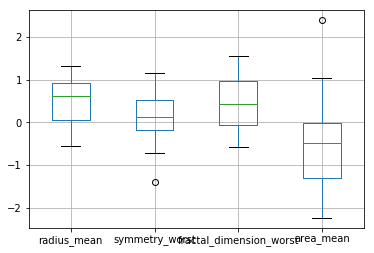

In [13]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,6),
                  columns=['radius_mean','texture_mean','perimeter_mean','area_mean','symmetry_worst',
'fractal_dimension_worst'])
df.boxplot(column=['radius_mean','symmetry_worst',
'fractal_dimension_worst','area_mean'])

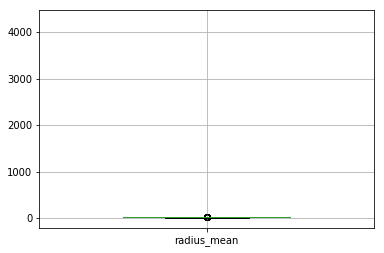

In [14]:
data.boxplot()
data.boxplot(column=['radius_mean'])

Text(0.5,1,'radius mean with diagnosis')

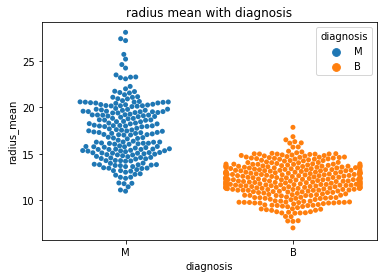

In [18]:

sb.swarmplot(y="radius_mean", x="diagnosis",hue="diagnosis" ,data=data)
py.title("radius mean with diagnosis")


Text(0.5,1,'perimeter mean with diagnosis')

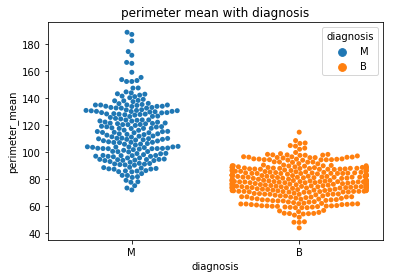

In [19]:

sb.swarmplot(y="perimeter_mean", x="diagnosis",hue="diagnosis" ,data=data)
py.title("perimeter mean with diagnosis")


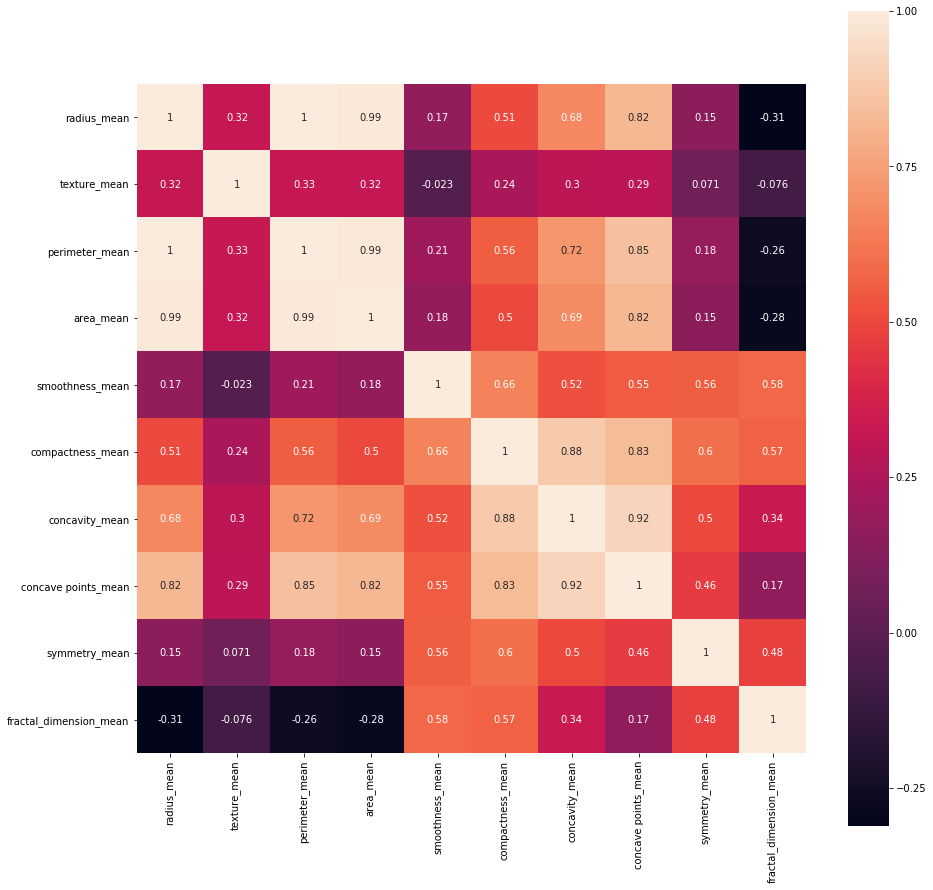

In [15]:
#heatmap between mean features and diagnosis
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
py.figure(figsize=(15,15))
heat = sb.heatmap(data[features_mean].corr(), vmax=1, square=True, annot=True)

In [21]:
data.shape

(569, 31)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [23]:
#checking for null values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
x=data.drop(['diagnosis'],axis=1)
y=data.diagnosis

In [18]:
##splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# logistic regression

In [20]:
##model building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
##prediciton
predict=lr.predict(x_test)

In [22]:
##confusion matrix and classification report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96       185
           M       0.94      0.92      0.93       100

   micro avg       0.95      0.95      0.95       285
   macro avg       0.95      0.94      0.95       285
weighted avg       0.95      0.95      0.95       285



In [24]:
##accuracy score
accuracy_score(y_test,predict)

0.9508771929824561

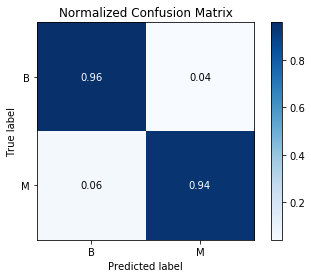

In [31]:
#plot
#!pip install scikit-plot
import matplotlib.pyplot as plt

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=True)
plt.show()


# SGD Classifier

In [25]:
##svm sgd
from sklearn.linear_model import SGDClassifier
sv=SGDClassifier()
sv.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
####svm predicition
predict_sv=sv.predict(x_test)

In [27]:
##classification report
print(classification_report(predict_sv,y_test))
cm=confusion_matrix(predict_sv,y_test)

              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
           M       1.00      0.34      0.51       285

   micro avg       0.34      0.34      0.34       285
   macro avg       0.50      0.17      0.26       285
weighted avg       1.00      0.34      0.51       285



C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
##accuracy score
accuracy_score(y_test,predict_sv)

0.34385964912280703

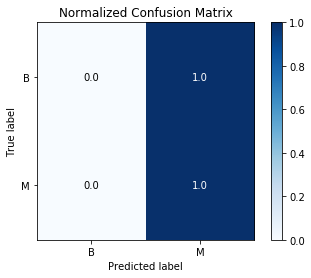

In [29]:
import matplotlib.pyplot as plt

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predict_sv, normalize=True)
plt.show()

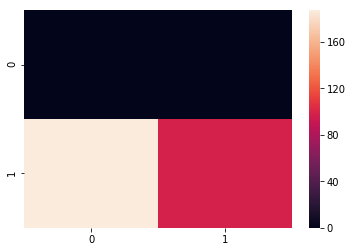

In [30]:
sb.heatmap(cm)

# naive_bayes using multinomial naive_bayes


In [31]:
###naive_bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
##prediction 
predict_nb = nb.predict(x_test)

In [33]:
##classification report
print(classification_report(predict_nb,y_test))


              precision    recall  f1-score   support

           B       0.96      0.89      0.93       202
           M       0.78      0.92      0.84        83

   micro avg       0.90      0.90      0.90       285
   macro avg       0.87      0.90      0.88       285
weighted avg       0.91      0.90      0.90       285



In [34]:
##accuracy score
accuracy_score(y_test,predict_nb)

0.8982456140350877

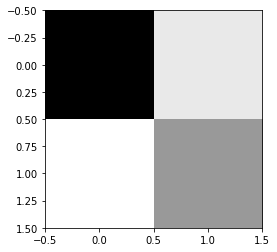

In [35]:
cm_nb=confusion_matrix(predict_nb,y_test)
##
py.imshow(cm_nb,cmap='binary')

# naive_bayes using Gaussian naive_bayes

In [36]:
###naive_bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
##prediction 
predict_gb = nb.predict(x_test)

In [38]:
##classification report
print(classification_report(predict_gb,y_test))

              precision    recall  f1-score   support

           B       0.96      0.95      0.96       189
           M       0.91      0.93      0.92        96

   micro avg       0.94      0.94      0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [39]:
##accuracy score
accuracy_score(y_test,predict_gb)

0.9438596491228071

# Decision_tree

In [40]:
##model building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
##prediction
predict_dt=dt.predict(x_test)

In [42]:
##classification report
print(classification_report(predict_dt,y_test))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96       186
           M       0.93      0.92      0.92        99

   micro avg       0.95      0.95      0.95       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285



In [43]:
##accuracy score
accuracy_score(y_test,predict_dt)

0.9473684210526315

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


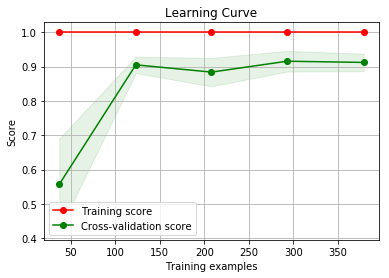

In [44]:
###
skplt.estimators.plot_learning_curve(dt,x, y)

# random_forest

In [52]:
##model building
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
##prediction
predict_rf = rf.predict(x_test)

In [53]:
##classification report
print(classification_report(predict_rf,y_test))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        73
           M       0.93      0.98      0.95        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [54]:
##accuracy score
accuracy_score(y_test,predict_rf)

0.9649122807017544

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


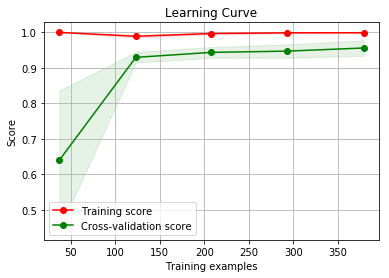

In [55]:
##learning curve
skplt.estimators.plot_learning_curve(rf,x, y)

# extra_trees

In [56]:
##model building
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
##prediction
predict_et = et.predict(x_test)

In [58]:
##classification report
print(classification_report(predict_et,y_test))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        70
           M       0.95      0.93      0.94        44

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [59]:
##accuracy score
accuracy_score(y_test,predict_et)

0.956140350877193

# Gradient boosting classifier

In [60]:
#model 
from sklearn.ensemble import GradientBoostingClassifier
gbo = GradientBoostingClassifier()
gbo.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [61]:
##prediction
predict_gbo = gbo.predict(x_test)

In [62]:
##classification report
print(classification_report(predict_gbo,y_test))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        72
           M       0.93      0.95      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [63]:
##accuracy score
accuracy_score(y_test,predict_gbo)

0.956140350877193

# xgboost

In [45]:
#model 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [46]:
#prediction
predict_xgb=xgb.predict(x_test)

In [47]:
##report
print(classification_report(predict_xgb,y_test))

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       186
           M       0.96      0.95      0.95        99

   micro avg       0.97      0.97      0.97       285
   macro avg       0.97      0.96      0.97       285
weighted avg       0.97      0.97      0.97       285



In [48]:
##accuracy score
accuracy_score(y_test,predict_xgb)

0.968421052631579

# knn

In [68]:
##model building
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
#prediction
predict_knn=kn.predict(x_test)

In [70]:
#classification report
print(classification_report(predict_knn,y_test))

              precision    recall  f1-score   support

           B       1.00      0.93      0.97        76
           M       0.88      1.00      0.94        38

   micro avg       0.96      0.96      0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



In [71]:
##accuracy score
accuracy_score(y_test,predict_knn)

0.956140350877193

# ensemble model

In [72]:
### majority voting
from sklearn.ensemble import VotingClassifier

In [73]:
##model building
model = VotingClassifier(estimators=[('lr', lr), ('dt', dt),('gnb',nb)], voting='hard')

In [74]:
##hard voting
majority_vc=model.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
###prediction
predict_majority_voting=majority_vc.predict(x_test)

In [76]:
###classification report
print(classification_report(predict_majority_voting,y_test))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        74
           M       0.93      1.00      0.96        40

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [77]:
###model building
model_soft = VotingClassifier(estimators=[('lr', lr), ('dt', dt),('gnb',nb)], voting='soft')

In [78]:
##soft voting(average voting)
soft_vc=model_soft.fit(x_train,y_train)

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
###prediction
predict_soft_voting=soft_vc.predict(x_test)

In [80]:
###classification report
print(classification_report(predict_soft_voting,y_test))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        74
           M       0.93      1.00      0.96        40

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


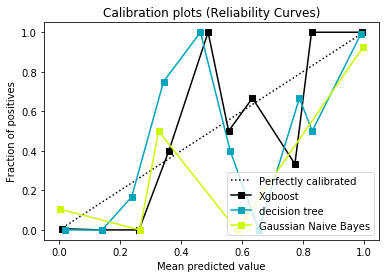

In [49]:
###comparing 3 models 
xgb = XGBClassifier()
lr = LogisticRegression()
nb = MultinomialNB()
rf_probas = xgb.fit(x_train, y_train).predict_proba(x_test)
lr_probas = lr.fit(x_train, y_train).predict_proba(x_test)
nb_probas = nb.fit(x_train, y_train).predict_proba(x_test)
probas_list = [rf_probas, lr_probas, nb_probas]
clf_names = ['Xgboost', 'decision tree','Gaussian Naive Bayes']
skplt.metrics.plot_calibration_curve(y_test,
                                      probas_list,
                                      clf_names)
plt.show()

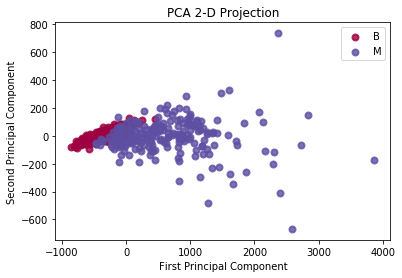

In [82]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=1)
pca.fit(x)
skplt.decomposition.plot_pca_2d_projection(pca, x, y)

In [50]:
##selecting optimal features using RFECV
from sklearn.feature_selection import RFECV

clf = XGBClassifier()
rfecv = RFECV(estimator=clf, step=1 , cv=4 ,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train)
print('optimal number of features:',rfecv.n_features_)
print('Best features:',x_train.columns[rfecv.support_])


optimal number of features: 16
Best features: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


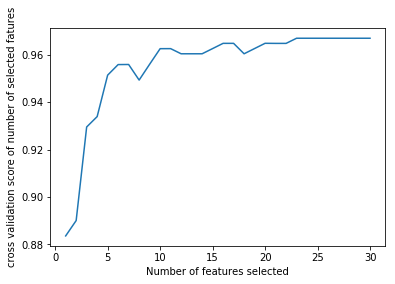

In [84]:
# plotting number of features VS cross- validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("cross validation score of number of selected fatures")
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)

In [52]:
#feature ranking with recursive feature elimination and cross- validated selection of the best number of features.
importances = (xgb.feature_importances_)
indices = np.argsort(importances)[::-1]
print("feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" %(f +1,indices[f],importances[indices[f]]))



feature ranking:
1. feature 7 (0.242068)
2. feature 27 (0.203719)
3. feature 20 (0.124627)
4. feature 6 (0.075705)
5. feature 23 (0.065603)
6. feature 22 (0.041705)
7. feature 21 (0.023216)
8. feature 26 (0.021405)
9. feature 13 (0.017502)
10. feature 12 (0.017114)
11. feature 0 (0.017023)
12. feature 1 (0.015422)
13. feature 9 (0.015104)
14. feature 11 (0.014747)
15. feature 14 (0.011515)
16. feature 10 (0.010840)
17. feature 4 (0.010112)
18. feature 19 (0.010024)
19. feature 28 (0.008961)
20. feature 15 (0.008691)
21. feature 3 (0.008127)
22. feature 18 (0.007275)
23. feature 8 (0.006626)
24. feature 24 (0.006551)
25. feature 29 (0.005768)
26. feature 5 (0.005161)
27. feature 17 (0.003112)
28. feature 16 (0.002277)
29. feature 2 (0.000000)
30. feature 25 (0.000000)


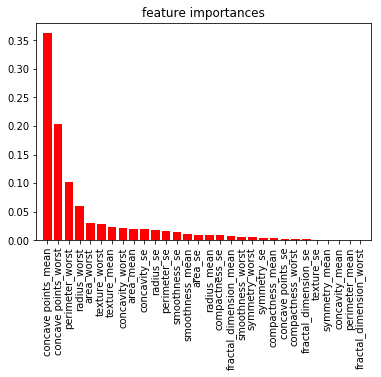

In [86]:
#plot
plt.title("feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="red",align="center")

plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.show()

In [87]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 30 columns):
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave points_se          455 non-null float64
symmetry_se                455

In [53]:
x_train_optimal = x_train[['concave points_mean','concave points_worst',
                           'radius_worst','concavity_mean','area_worst',
                           'concavity_worst','texture_worst','perimeter_worst',
                           'perimeter_se','area_se','radius_mean','texture_mean',
                           'fractal_dimension_mean','smoothness_se','texture_se']]
x_test_optimal =  x_test[['concave points_mean','concave points_worst',
                           'radius_worst','concavity_mean','area_worst',
                           'concavity_worst','texture_worst','perimeter_worst',
                           'perimeter_se','area_se','radius_mean','texture_mean',
                           'fractal_dimension_mean','smoothness_se','texture_se']]
##model
model_optimal = XGBClassifier()
##training model
model_optimal.fit(x_train_optimal,y_train)
##
pred = model_optimal.predict(x_test_optimal)


In [89]:
##accuracy score
accuracy_score(y_test,pred)

0.956140350877193

In [90]:
##splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=42)